In [1]:
import pandas as pd
import numpy as np
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
sklearn.__version__

'0.24.2'

In [7]:
with open('pr_spl_fwd_test.fa', 'r') as f:
    total = []
    for i, line in enumerate(f):
        if i != 0:
            total.append(line[:-1])
            
with open('pr_spl_fwd_test_mod.fa', 'w') as f:
    total_line = ''.join(total)
    print(len(total_line))
    for i in range(0, len(total_line), 2000):
        f.write(total_line[i:i+16000] + '\n')
        

579100


In [ ]:
99. // 5

# CR

In [2]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


In [58]:
num = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
num

3767

## Compute stats

In [81]:
df = pd.read_csv(r"C:\HSE\genotek\NC_graph_rel.csv")
df_selected = df[['node_id1', 'node_id2']]
df_selected.iloc[:, 0] = df_selected.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_selected.iloc[:, 1] = df_selected.iloc[:, 1].apply(lambda n: int(n.split('_')[1]))

df_selected.to_csv('NC_edge_list.edges', index=False, header=False)

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [82]:
G = nx.read_edgelist('NC_edge_list.edges', delimiter=',')

In [83]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Density:', nx.density(G))

Number of nodes: 614
Number of edges: 6297
Density: 0.03346068621772561


In [66]:
nx.is_connected(G)

False

In [67]:
nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

In [68]:
degrees_erg = [d for node, d in G.degree()]
print('Max degree:', np.max(degrees_erg))
print('Mean degree:', np.mean(degrees_erg))
print('Min degree:', np.min(degrees_erg))

Max degree: 80
Mean degree: 20.5114006514658
Min degree: 1


In [69]:
nx.transitivity(G)

0.34439566279084477

In [70]:
nx.global_efficiency(G)

0.3448267716007857

In [71]:
nx.local_efficiency(G)

0.39756542676869083

## Get distribution

{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
{'чеченцы': 95, 'кабардинцы,черкесы,адыгейцы': 148, 'карачаевцы,балкарцы': 86, 'ингуши': 52, 'дагестанские народы': 134, 'осетины': 52, 'кумыки': 18, 'ногайцы': 29}


C:\Users\Alex\AppData\Local\Temp\ipykernel_16212\1842522063.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(types_nc_m, rotation = 90, ha='right')
C:\Users\Alex\AppData\Local\Temp\ipykernel_16212\1842522063.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(types_cr_m, rotation = 90, ha='right')


<Figure size 640x480 with 0 Axes>

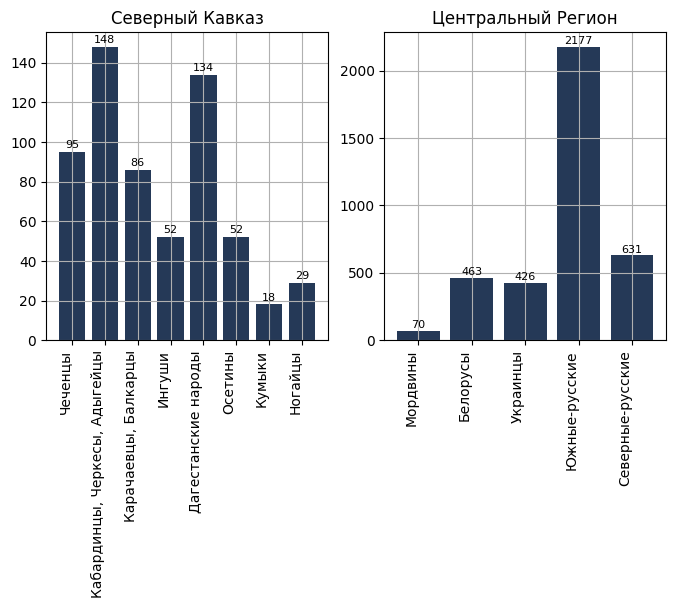

In [4]:
def addlabels(ax, x, y, t):
    for i in range(len(x)):
        ax.text(i, y[i] + 2 if t == 0 else y[i] + 20, y[i], ha = 'center', fontsize=8)

df_cr = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df_nc = pd.read_csv(r"C:\HSE\genotek\NC_graph_rel.csv")

nodes_names_cr = set()
all_types_dict_cr = {}
nodes_names_nc = set()
all_types_dict_nc = {}

types_cr = pd.concat([df_cr['label_id1'], df_cr['label_id2']], axis=0).unique().tolist()
types_nc = pd.concat([df_nc['label_id1'], df_nc['label_id2']], axis=0).unique().tolist()


for t in types_cr:
    all_types_dict_cr[t] = 0
    
for t in types_nc:
    all_types_dict_nc[t] = 0

for i, n in enumerate(df_cr['node_id1']):
    if n not in nodes_names_cr:
        nodes_names_cr.add(n)
        all_types_dict_cr[df_cr['label_id1'][i]] += 1
        
for i, n in enumerate(df_cr['node_id2']):
    if n not in nodes_names_cr:
        nodes_names_cr.add(n)
        all_types_dict_cr[df_cr['label_id2'][i]] += 1
        
for i, n in enumerate(df_nc['node_id1']):
    if n not in nodes_names_nc:
        nodes_names_nc.add(n)
        all_types_dict_nc[df_nc['label_id1'][i]] += 1
        
for i, n in enumerate(df_nc['node_id2']):
    if n not in nodes_names_nc:
        nodes_names_nc.add(n)
        all_types_dict_nc[df_nc['label_id2'][i]] += 1
        
print(all_types_dict_cr)
print(all_types_dict_nc)

# types_nc_m = ['Chechens', 'Kabardians, Circassians, Adyghes', 'Karachays, Balkars', 'Ingush', 'Dagestan peoples', 'Ossetians', 'Kumyks', 'Nogais']
# types_cr_m = ['Mordvins', 'Belarusians', 'Ukranians', 'Southern Russians', 'Northen Russians']

types_nc_m = ['Чеченцы', 'Кабардинцы, Черкесы, Адыгейцы', 'Карачаевцы, Балкарцы', 'Ингуши', 'Дагестанские народы', 'Осетины', 'Кумыки', 'Ногайцы']
types_cr_m = ['Мордвины', 'Белорусы', 'Украинцы', 'Южные-русские', 'Северные-русские']

plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.bar(all_types_dict_nc.keys(), all_types_dict_nc.values(), color='#253957')
ax2.bar(all_types_dict_cr.keys(), all_types_dict_cr.values(), color='#253957')
ax1.set_xticklabels(types_nc_m, rotation = 90, ha='right')
ax2.set_xticklabels(types_cr_m, rotation = 90, ha='right')
addlabels(ax1, list(all_types_dict_nc.keys()), list(all_types_dict_nc.values()), 0)
addlabels(ax2, list(all_types_dict_cr.keys()), list(all_types_dict_cr.values()), 1)
ax1.grid()
ax2.grid()
ax1.set_title('Северный Кавказ')
ax2.set_title('Центральный Регион')
plt.savefig('num_nodes_per_classes_and_dataset.png', bbox_inches='tight')
plt.show()

## Training and results

### New approach

In [6]:
def get_targets(df, cond, names):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    targets_dict = {names[i]: None for i in range(len(names))}
    checked = []

    for i, n in enumerate(df['node_id1']):
        if n in checked:
            pass
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                    id_ = types.index(df['label_id1'][i])
                    current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            targets_dict[n] = id_
            checked.append(n)
            
    ####################################
    
    for i, n in enumerate(df['node_id2']):
        if n in checked:
            pass
        else:
            if (current_types_dict[df['label_id2'][i]] + 1) / all_types_dict[df['label_id2'][i]] < cond:
                    id_ = types.index(df['label_id2'][i])
                    current_types_dict[df['label_id2'][i]] += 1
            else:
                id_ = -1
            targets_dict[n] = id_
            checked.append(n)
        
    return list(targets_dict.values())

In [109]:
# inputs = np.zeros((num, num))
# names = ['?' for i in range(num)]
# adj = pd.DataFrame(inputs)

# node_names = pd.concat([df['node_id1'], df['node_id2']], axis=0).unique()
# node_names = sorted(list(map(lambda n: int(n.split('_')[1]), node_names)))

# adj.index = node_names
# adj

In [18]:
# inputs = np.zeros((num, num))
# names = ['?' for i in range(num)]
# for i, n in enumerate(df['node_id1']):
#     row = int(n.split('_')[1])
#     col = int(df['node_id2'][i].split('_')[1])
#     names[row] = n
#     names[col] = df['node_id2'][i]
#     inputs[row, col] = 1
#     inputs[col, row] = 1

# targets = get_targets(df, 2., names)

# np.save('adjacency_matrix.npy', inputs)
# np.save('classes.npy', np.array(targets))

In [19]:
# inputs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


[3 3 3 ... 3 3 3]
              precision    recall  f1-score   support

           0       0.11      0.12      0.12         8
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        43
           3       0.58      0.98      0.73       218
           4       0.00      0.00      0.00        64

    accuracy                           0.57       380
   macro avg       0.14      0.22      0.17       380
weighted avg       0.33      0.57      0.42       380

[[  1   0   0   7   0]
 [  3   0   0  44   0]
 [  1   0   0  42   0]
 [  4   0   0 214   0]
 [  0   0   0  64   0]]


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\

<Figure size 432x288 with 0 Axes>

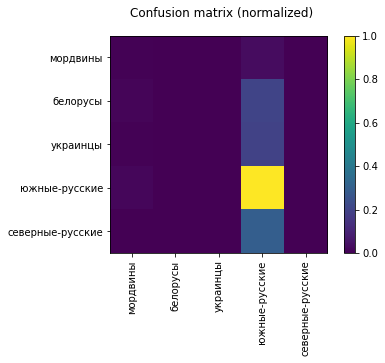

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [112]:
inputs = np.zeros((num, num))
names = ['?' for i in range(num)]
for i, n in enumerate(df['node_id1']):
    row = int(n.split('_')[1])
    col = int(df['node_id2'][i].split('_')[1])
    names[row] = n
    names[col] = df['node_id2'][i]
    inputs[row, col] = df['ibd_sum'][i]
    inputs[col, row] = df['ibd_sum'][i]

targets = get_targets(df, 0.9, names)

label_prop_model = LabelSpreading(kernel='rbf', n_neighbors=10, max_iter=10000, tol=1e-3, n_jobs=-1, gamma=0.0005)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

print(predicted)

##############################

unlabeled_targets = np.array(targets) == -1

targets = np.array(get_targets(df, 2, names)) # second number - whatever number > 1 because we need to select all data

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets[unlabeled_targets], predicted[unlabeled_targets], labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(5)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(5)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_cr.png", bbox_inches="tight")
plt.show()

for i in range(5):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()

### Old approach

{'мордвины': 24, 'белорусы': 162, 'украинцы': 149, 'южные-русские': 761, 'северные-русские': 220}
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
{'мордвины': 70, 'белорусы': 424, 'украинцы': 389, 'южные-русские': 2160, 'северные-русские': 628}
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        46
           1       0.34      0.56      0.42       262
           2       0.21      0.90      0.35       240
           3       0.94      0.51      0.66      1399
           4       0.89      0.31      0.46       408

    accuracy                           0.51      2355
   macro avg       0.68      0.47      0.39      2355
weighted avg       0.79      0.51      0.56      2355

[[   2   12   38    4   14]
 [   0  247  114   59    4]
 [   0   29  320   36    4]
 [   0  182  502 1466   10]
 [  

<Figure size 432x288 with 0 Axes>

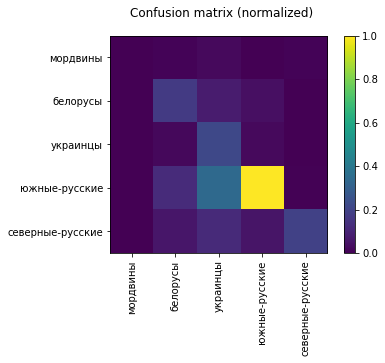

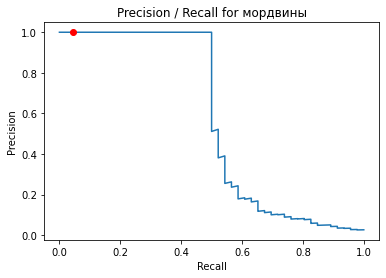

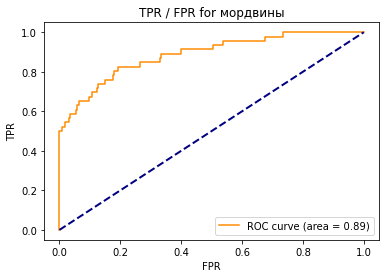

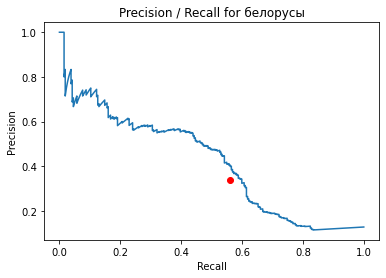

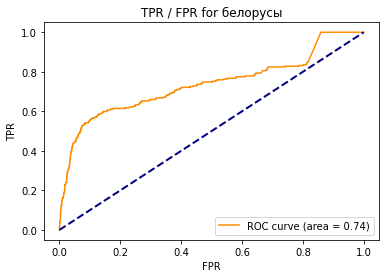

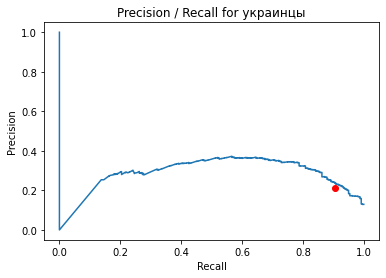

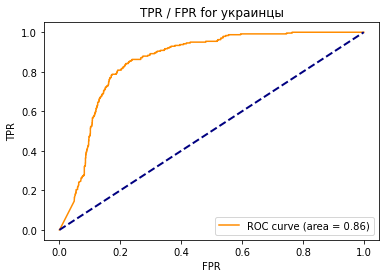

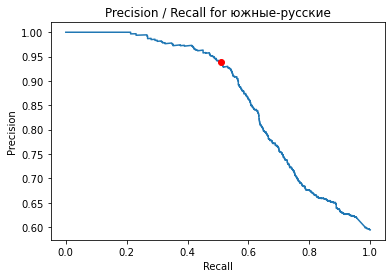

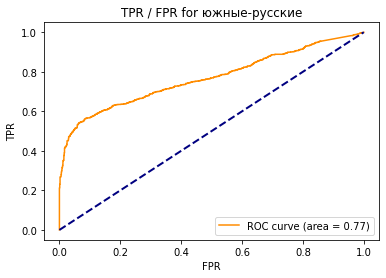

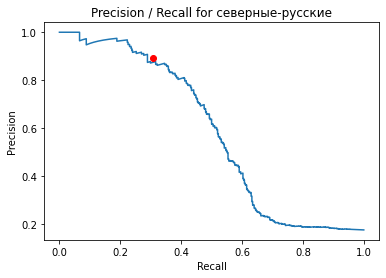

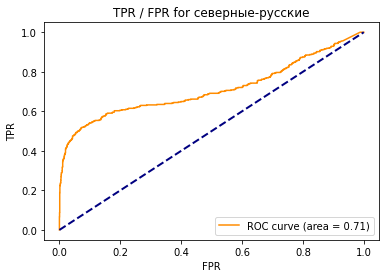

In [35]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            nodes_dict[n] = [types_dict.copy(), id_]
            
    print(current_types_dict)
    print(all_types_dict)
        
    return nodes_dict

data = get_dataset(df, 0.35) # second number - the part of training data

inputs = [list(i[0].values()) for i in list(data.values())]
targets = [i[1] for i in list(data.values())]

def rbf_kernel_safe(X, Y=None, gamma=None): 

    X, Y = sklearn.metrics.pairwise.check_pairwise_arrays(X, Y) 
    if gamma is None: 
        gamma = 1.0 / X.shape[1] 

    K = sklearn.metrics.pairwise.euclidean_distances(X, Y, squared=True) 
    K *= -gamma 
    K -= K.max()
    np.exp(K, K)    # exponentiate K in-place 
    return K 

label_prop_model = LabelSpreading(kernel='knn', n_neighbors=200, max_iter=1000, tol=1e-3, n_jobs=-1, gamma=0.001)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

unlabeled_targets = np.array(targets) == -1

data = get_dataset(df, 2) # second number - whatever number > 1 because we need to select all data

targets = np.array([i[1] for i in list(data.values())])

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets, predicted, labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(5)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(5)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_cr.png", bbox_inches="tight")
plt.show()

for i in range(5):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()

# Tensorflow

In [29]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, Input, Concatenate, Dropout, BatchNormalization
import gc

In [32]:
y_true = [[0, 1], [1, 0]]
y_pred = [[0.05, 0.95], [0.1, 0.9]]
cce(y_true, y_pred).numpy()

1.1769392

In [45]:
cce = tf.keras.losses.CategoricalCrossentropy()
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)

y_true_1 = [[1]]
y_pred_1 = [[0.01]]

y_true_2 = [[1]]
y_pred_2 = [[0.95]]

y_true_3 = [[0, 1]]
y_pred_3 = [[0.05, 0.95]]

cc_1 = cce(y_true_1, y_pred_1).numpy()
cc_2 = cce(y_true_2, y_pred_2).numpy()
cc_3 = cce(y_true_3, y_pred_3).numpy()

bc_1 = bce(y_true_1, y_pred_1).numpy()
bc_2 = bce(y_true_2, y_pred_2).numpy()

print(cc_1==cc_2, cc_1, cc_2)
print(bc_1==bc_2, bc_1, bc_2, cc_3)

True 1.192093e-07 1.192093e-07
False 4.60516 0.051293183 0.051293306


1.192093e-07

In [41]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    selection = []
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
                selection.append(id_)
            else:
                selection.append(-1)
            nodes_dict[n] = [types_dict.copy(), id_]
            
        
    return nodes_dict, np.array(selection)

data, selection = get_dataset(df, 0.7)

inputs = np.array([list(i[0].values()) for i in list(data.values())])
targets = np.array([i[1] for i in list(data.values())])

train_inputs = inputs[selection != -1]
train_targets = targets[selection != -1]

test_inputs = inputs[selection == -1]
test_targets = targets[selection == -1]

train_targets

array([0, 0, 0, ..., 2, 2, 2])

In [69]:
inputs = Input(shape =(5,))

x0 = Dense(1024, activation = 'relu')(inputs)
x1 = Dense(1024, activation = 'relu')(inputs)
x2 = Dense(1024, activation = 'relu')(inputs)
x3 = Dense(1024, activation = 'relu')(inputs)

x = Concatenate()([
                x0, 
                x1, 
                x2,
                x3
               ])

x = Dense(5, activation = 'softmax')(x)

model = Model(inputs, x)

In [70]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                                  
 dense_33 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                                  
 dense_34 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                           

In [71]:
gc.collect()

lr = ReduceLROnPlateau(
                    monitor = "val_loss",
                    factor = 0.9, 
                    patience = 4, 
                    verbose = 0)

es = EarlyStopping(
                    monitor = "val_loss",
                    patience = 40, 
                    verbose = 0,
                    mode = "min", 
                    restore_best_weights = True)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                    filepath = './genotek',
                    save_weights_only = True,
                    monitor = 'val_loss',
                    mode = 'min',
                    save_best_only = True)

callbacks = [
                    lr, 
                    es, 
                    model_checkpoint_callback
                    ]

model.compile(
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = 'acc',
                loss = tf.keras.losses.SparseCategoricalCrossentropy()
                 )

    
model.fit(train_inputs,
                train_targets, 
                validation_data=(test_inputs,
                                test_targets), 
                epochs = 1000,
                verbose = 1,
                batch_size = 16,
                shuffle = True,
                callbacks = callbacks)

model.load_weights('./genotek')

predicted = np.argmax(model.predict(test_inputs), axis=1)

print(classification_report(test_targets, predicted))

Epoch 1/1000
165/165 [==============================] - 1s 5ms/step - loss: 5.6681 - acc: 0.8014 - val_loss: 4.1274 - val_acc: 0.3877 - lr: 0.0100
Epoch 2/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.4504 - acc: 0.8489 - val_loss: 3.3604 - val_acc: 0.3770 - lr: 0.0100
Epoch 3/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.5584 - acc: 0.8421 - val_loss: 4.8949 - val_acc: 0.3703 - lr: 0.0100
Epoch 4/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4622 - acc: 0.8462 - val_loss: 4.8226 - val_acc: 0.3934 - lr: 0.0100
Epoch 5/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4546 - acc: 0.8542 - val_loss: 4.2798 - val_acc: 0.3664 - lr: 0.0100
Epoch 6/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4398 - acc: 0.8622 - val_loss: 3.9673 - val_acc: 0.3838 - lr: 0.0100
Epoch 7/1000
165/165 [==============================] - 1s 3ms/step - loss: 0.4081 - acc: 0.8580 - val_loss: 4.8862 - 

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Torch Geometric

In [2]:
import torch
print(torch.__version__)
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn

1.13.0+cu116


## Vanillia example

In [3]:
import networkx as nx
from torch_geometric.utils.convert import from_networkx

In [4]:
nx.__version__

'3.1'

In [180]:
G = nx.Graph()

# Add some cars (just do 4 for now)
G.add_nodes_from([
      (1, {'y': 0, 'x': [[0.5], [0.8], [0.9]]}),
      (2, {'y': 0, 'x': [[0.2], [0.8], [0.9]]}),
      (3, {'y': 1, 'x': [[0.3], [0.8], [0.9]]}),
      (4, {'y': 1, 'x': [[0.1], [0.8], [0.9]]}),
      (5, {'y': 1, 'x': [[0.2], [0.8], [0.9]]}),
])

# Add some edges
G.add_edges_from([
                  (1, 2), (1, 4), (1, 5),
                  (2, 3), (2, 4),
                  (3, 2), (3, 5),
                  (4, 1), (4, 2),
                  (5, 1), (5, 3)
])

# Convert the graph into PyTorch geometric
pyg_graph = from_networkx(G)

pyg_graph.num_classes = 2

print(pyg_graph.num_features)

print(pyg_graph)
# Data(edge_index=[2, 12], x=[5], y=[5])
print(pyg_graph.x)
# tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
print(pyg_graph.y)
# tensor([1, 2, 3, 4, 5])
print(pyg_graph.edge_index)
# tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
#         [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


# # Split the data 
# train_ratio = 0.2
# num_nodes = pyg_graph.x.shape[0]
# num_train = int(num_nodes * train_ratio)
# idx = [i for i in range(num_nodes)]

# np.random.shuffle(idx)
# train_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
# train_mask[idx[:num_train]] = True
# test_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
# test_mask[idx[num_train:]] = True

# print(train_mask)
# # tensor([ True, False, False, False, False])
# print(test_mask)
# # tensor([False,  True,  True,  True,  True])

1
Data(x=[5, 3, 1], edge_index=[2, 12], y=[5], num_classes=2)
tensor([[[0.5000],
         [0.8000],
         [0.9000]],

        [[0.2000],
         [0.8000],
         [0.9000]],

        [[0.3000],
         [0.8000],
         [0.9000]],

        [[0.1000],
         [0.8000],
         [0.9000]],

        [[0.2000],
         [0.8000],
         [0.9000]]])
tensor([0, 0, 1, 1, 1])
tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


In [184]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features*3, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        print('GOOGLE1')
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        print('GOOGLE2')
        return F.log_softmax(x, dim=1)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
print(device)

data =  pyg_graph.to(device)

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out= model(data)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

for epoch in range(401):
    loss = train(data)
    print(loss)

cpu
GOOGLE1


RuntimeError: index 3 is out of bounds for dimension 0 with size 3

Testing vanilia example on different graph size

In [179]:
model.eval()
model(pyg_graph_big.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (18x1 and 3x16)

## Real example from scratch

In [4]:
from numba import njit, prange
import time
import seaborn as sns

In [5]:
from torch.nn import Linear

class AttnGCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GATConv(in_channels=5,
                             out_channels=15,
                             heads=2, 
                             add_self_loops=False,
                             edge_dim=1)
        self.fc1 = Linear(30, 15)
        self.fc2 = Linear(15, 5)

    def forward(self, data):
        x, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.conv1(x, edge_index, edge_weight)
        h = h.relu()
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        return h



In [6]:
import torch
from torch.nn import Linear, BatchNorm1d
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.norm = BatchNorm1d(5)
        self.conv1 = GCNConv(5, 15, 
                             add_self_loops=False,
                             normalize=True)
        self.conv2 = GCNConv(15, 15, 
                             add_self_loops=False,
                             normalize=True)
        self.fc1 = Linear(15, 15)
        self.fc2 = Linear(15, 15)
        self.fc3 = Linear(15, 5)

    def forward(self, data):
        x, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(x)
        h = self.conv1(h, edge_index, edge_weight)
        h = h.relu()
        h = self.conv2(h, edge_index, edge_weight)
        h = h.relu()
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h

In [77]:
import torch
from torch.nn import Linear, BatchNorm1d
from torch_geometric.nn import GCNConv

class SimpleNN8(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.norm = BatchNorm1d(8)
        self.fc1 = Linear(8, 15)
        self.fc2 = Linear(15, 15)
        self.fc3 = Linear(15, 8)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h
    
    
class SimpleNN5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.norm = BatchNorm1d(5)
        self.fc1 = Linear(5, 15)
        self.fc2 = Linear(15, 15)
        self.fc3 = Linear(15, 5)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h

Raw data

In [8]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


Function for getting train and test nodes

In [53]:
def get_train_test_nodes(df, train_coeff, mask_coeff):
    
    new_labels = None
    
    # get list of all labels
    types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
#     print("TYPES: ", types)
    
    # concatenate all nodes in one column
    n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
    
    # concatenate all labels in one column
    l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
    
    # merge all nodes and all labels column-wise
    df_new = pd.concat([n, l], axis=1)
    
    # get class for every node 
    df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
    df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
    
    df_copied = df.copy()
    if len(df_new.iloc[:, 0].unique()) < df_new.iloc[:, 0].max():
        print('Relabelling!!!')
        new_labels = {i:n for n, i in enumerate(df_new.iloc[:, 0].unique())}
#         print(new_labels)
        for i in range(df.shape[0]):
            df_copied.iloc[i, 0] = 'node_' + str(new_labels[int(df.iloc[i, 0].split('_')[1])])
            df_copied.iloc[i, 1] = 'node_' + str(new_labels[int(df.iloc[i, 1].split('_')[1])])
            
    types = pd.concat([df_copied['label_id1'], df_copied['label_id2']], axis=0).unique().tolist()
#     print("TYPES: ", types)
    n = pd.concat([df_copied['node_id1'], df_copied['node_id2']], axis=0)
    l = pd.concat([df_copied['label_id1'], df_copied['label_id2']], axis=0)
    df_new = pd.concat([n, l], axis=1)
    
    # get class for every node 
    df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
    df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
    
    df_new = df_new.drop_duplicates()
    node_classes_random = df_new.sample(frac=1)
    node_classes_sorted = df_new.sort_values(by=[0])
    
#     if NC:
#         missed_nodes = []
#         for i in range(node_classes_sorted.shape[0]):
#             if i not in node_classes_sorted.iloc[:, 0].to_numpy():
#                 missed_nodes.append([i, -1])
        
#         tmp_df = pd.DataFrame(missed_nodes)
        
#         print(tmp_df)
        
#         node_classes_sorted = pd.concat([node_classes_sorted, tmp_df], axis=0).sort_values(by=[0])
    
    # get number of nodes for every class
    num_nodes_per_class = node_classes_random.iloc[:, 1].value_counts()
    
    train_nodes, test_nodes = [], []
    node_counter = {i:0 for i in range(num_nodes_per_class.shape[0])}
    
    # add masking
    mask_array = []
    
    # split nodes
    for i in range(node_classes_random.shape[0]):
        node_class = node_classes_random.iloc[i, 1]
        if node_counter[node_class] <= int(train_coeff * num_nodes_per_class.loc[node_class]):
            train_nodes.append(node_classes_random.iloc[i, 0])
            
            mask_array.append(True)
            
#             if node_counter[node_class] > int(mask_coeff * train_coeff * num_nodes_per_class.loc[node_class]):
#                 mask_array.append(True)
#             else:
#                 mask_array.append(False)
            
            node_counter[node_class] += 1
        else:
            test_nodes.append(node_classes_random.iloc[i, 0])
    
    return df_copied, train_nodes, test_nodes, node_classes_sorted, mask_array, new_labels

def make_train_test_dataset(df, train_nodes: list, test_nodes: list, node_classes_sorted, mask_array):
    
    train_mask_array = mask_array
    
    # get list of all labels
    types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
#     print("TYPES: ", types)
    
    # preprocess initial data
    df_processed = df.copy()
    df_processed.iloc[:, 0] = df_processed.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
    df_processed.iloc[:, 1] = df_processed.iloc[:, 1].apply(lambda n: int(n.split('_')[1]))
    df_processed.iloc[:, 2] = df_processed.iloc[:, 2].apply(lambda t: types.index(t))
    df_processed.iloc[:, 3] = df_processed.iloc[:, 3].apply(lambda t: types.index(t))
    
    # making dataframe with only training nodes
    df_for_training = df_processed.copy()
    
    drop_rows = drop_rows_for_training_dataset(df_for_training.to_numpy(), np.array(test_nodes))
    
    df_for_training = df_for_training.drop(drop_rows)
    
    sel_n_tr = set(np.unique(df_for_training.iloc[:, :2].to_numpy()))
    real_n_tr = set(train_nodes)
    
    eliminated_nodes = real_n_tr.difference(sel_n_tr)
    print(eliminated_nodes, len(eliminated_nodes))
    
#     if len(eliminated_nodes) != 0:
#         print('Eliminating nodes!')
#         d_rows = []
#         for i in range(df_processed.shape[0]):
#             row = df_processed.iloc[i, :]
#             if int(df_processed.iloc[i, 0]) in eliminated_nodes or int(df_processed.iloc[i, 1]) in eliminated_nodes:
#                 d_rows.append(i)
                
        
                
#         train_nodes = list(set(train_nodes) - eliminated_nodes)
        
#         previous_all_of_nodes = np.unique(df_processed.iloc[:, :2].to_numpy())
        
#         df_processed = df_processed.drop(d_rows)
        
#         print('num test nodes before', len(test_nodes))
#         test_nodes = list(set(test_nodes) - (set(test_nodes) - (set(np.unique(df_processed.iloc[:, :2].to_numpy().flatten())) - set(train_nodes))))
#         print('num test nodes after', len(test_nodes))
        
#         # relabeling again
#         new_labels = {i:n for n, i in enumerate(previous_all_of_nodes)}
# #         print(new_labels)
#         for i in range(df_processed.shape[0]):
#             df_processed.iloc[i, 0] = new_labels[int(df_processed.iloc[i, 0])]
#             df_processed.iloc[i, 1] = new_labels[int(df_processed.iloc[i, 1])]
            
#         # relabeling training nodes
#         for i in range(len(train_nodes)):
#             train_nodes[i] = new_labels[int(train_nodes[i])]
            
#         # relabeling test nodes
#         for i in range(len(test_nodes)):
#             test_nodes[i] = new_labels[int(test_nodes[i])]
        
#         df_for_training = df_processed.copy()
        
#         print('GOOOOOOOOOOOOOOGLE_1')
        
#         drop_rows = drop_rows_for_training_dataset(df_for_training.to_numpy(), np.array(test_nodes))
        
#         print('GOOOOOOOOOOOOOOGLE_2')
        
#         df_for_training = df_for_training.reindex([i for i in range(df_for_training.shape[0])])
#         df_for_training = df_for_training.drop(drop_rows)
        
#         n = pd.concat([df_processed['node_id1'], df_processed['node_id2']], axis=0)
#         l = pd.concat([df_processed['label_id1'], df_processed['label_id2']], axis=0)
#         df_new = pd.concat([n, l], axis=1)

#         df_new = df_new.drop_duplicates()
#         node_classes_sorted = df_new.sort_values(by=[0])
        
#         sel_n_tr = set(np.unique(df_for_training.iloc[:, :2].to_numpy()))
#         real_n_tr = set(train_nodes)

#         eliminated_nodes = real_n_tr.difference(sel_n_tr)
#         print(eliminated_nodes, len(eliminated_nodes))
        
#         print('GOOOOOOOOOOOOOOGLE')

#         if len(eliminated_nodes) == 0:
#             print('Now everything is good!')
#         else:
#             print('AAA', len(eliminated_nodes))
            
        
    
#     print(set(np.unique(df_for_training.iloc[:, :2].to_numpy())) == set(train_nodes))
#     print('AAAAA', set(np.unique(df_for_training.iloc[:, :2].to_numpy())))
#     print('BBBBB', set(train_nodes))
    
    # construct training graph ############################# SAME PART BELOW ##############################
    
    # construct hash map for training nodes
    hashmap = np.array([1e6 for i in range(len(node_classes_sorted))]).astype(int)
    for i, node in enumerate(train_nodes):
        hashmap[node] = i
        
#     print(hashmap)
    
    # calculate sum of idb for each training node
    sum_training_idb = np.zeros((len(train_nodes), len(types)))
    
    calculate_sum_of_idb_for_each_train_node(sum_training_idb, df_for_training.to_numpy(), hashmap, np.array(train_mask_array))
        
#     print(node_classes_sorted)
                
    # construct targets
    targets = construct_node_classes(node_classes_sorted.to_numpy(), train_nodes)
        
    # construct edges
    train_graph_weighted_edges = construct_edges(df_for_training.to_numpy(), hashmap)
    
    sort_idx = np.lexsort((train_graph_weighted_edges[:, 1], train_graph_weighted_edges[:, 0]))
    train_graph_weighted_edges = train_graph_weighted_edges[sort_idx]
    
    train_graph_pytorch = Data.from_dict({'y': torch.tensor(targets, dtype=torch.long), 'x': torch.tensor(sum_training_idb), 'weight': torch.tensor(train_graph_weighted_edges[:, 2]), 'edge_index': torch.tensor(train_graph_weighted_edges[:, :2].T, dtype=torch.long)})
    
    train_graph_pytorch.num_classes = len(types)
    
    if len(np.unique(train_graph_pytorch.edge_index.cpu().detach().numpy())) != len(train_nodes):
#         print(len(np.unique(train_graph_pytorch.edge_index.cpu().detach().numpy())))
#         print(len(train_nodes))
        raise Exception("Train graph is not connected!!! Restart assembling!")
    
    ############################# SAME PART UP ##############################
    
    # creating array of graphs for testing
    
#     array_of_graphs_for_testing = [[] for i in range(len(test_nodes))]
    array_of_graphs_for_testing = []
    
    print('Starting selecting lines...')
    
    start = time.time()
    
    rows_for_adding_per_node = select_lines(np.array(train_nodes), np.array(test_nodes), df_processed.to_numpy())
    
    end = time.time()
    
    print(f'Done selecting lines in {end-start} seconds')
    
    warning_counter = 0
    
    for k, test_node in enumerate(test_nodes):
        
        print(f'Processed {k} / {len(test_nodes)} nodes')
        
#         for var_class in range(len(types)):
        
        test_mask_array = train_mask_array + [True]

        rows_for_adding = rows_for_adding_per_node[k]

        df_for_testing = pd.concat([df_for_training, df_processed.iloc[rows_for_adding]], axis=0)

        print(df_for_testing.shape, df_for_training.shape)

        if df_for_testing.shape[0] == df_for_training.shape[0]:
            warning_counter += 1

        current_test_nodes = train_nodes + [test_node]

        # construct testing graph ############################# SAME PART BELOW ##############################

        start = time.time()

        # construct hash map for training nodes
        hashmap = np.array([1e6 for i in range(len(node_classes_sorted))]).astype(int)
        for i, node in enumerate(current_test_nodes):
            hashmap[node] = i

#         print('HASHMAP:', hashmap)

        # calculate sum of idb for each training node
        sum_testing_idb = np.zeros((len(current_test_nodes), len(types)))
#         sum_testing_idb = np.ones((len(current_test_nodes), len(types)))
        

#             calculate_sum_of_idb_for_each_test_node(sum_testing_idb, df_for_testing.to_numpy(), hashmap, np.array(test_mask_array), test_node, var_class)
        calculate_sum_of_idb_for_each_test_node_for_ind_learn(sum_testing_idb, df_for_testing.to_numpy(), hashmap, np.array(test_mask_array), test_node)

        print(f'calculate sum of idb for each training node: {time.time() - start}')

        start = time.time()

        # construct targets
        targets = construct_node_classes(node_classes_sorted.to_numpy(), current_test_nodes)

        print(f'construct targets: {time.time() - start}')

        start = time.time()

        # construct edges
        test_graph_weighted_edges = construct_edges(df_for_testing.to_numpy(), hashmap)

        sort_idx = np.lexsort((test_graph_weighted_edges[:, 1], test_graph_weighted_edges[:, 0]))
        test_graph_weighted_edges = test_graph_weighted_edges[sort_idx]

        print(f'construct edges: {time.time() - start}')

#         start = time.time()

        test_graph_pytorch = Data.from_dict({'y': torch.tensor(targets, dtype=torch.long), 'x': torch.tensor(sum_testing_idb), 'weight': torch.tensor(test_graph_weighted_edges[:, 2]), 'edge_index': torch.tensor(test_graph_weighted_edges[:, :2].T, dtype=torch.long)})

        test_graph_pytorch.num_classes = len(types)

#         array_of_graphs_for_testing[k].append(test_graph_pytorch)
        array_of_graphs_for_testing.append(test_graph_pytorch)

#         print(f'build pytorch geometric dataset: {time.time() - start}')

        ############################# SAME PART UP ##############################
        
    print('WARNING COUNTER:', warning_counter)
    
    return train_graph_pytorch, array_of_graphs_for_testing, types

In [54]:
@njit(cache=True)
def select_lines(train_nodes, test_nodes, df_processed):
    
    rows_for_adding_per_node = []
    
    for i in range(len(test_nodes)):
        tmp = []
        for j in range(df_processed.shape[0]):
            row = df_processed[j]
            if int(row[0]) == test_nodes[i] and int(row[1]) in train_nodes or int(row[1]) == test_nodes[i] and int(row[0]) in train_nodes:
                
                tmp.append(j)
                
        rows_for_adding_per_node.append(tmp)
    
    return rows_for_adding_per_node


@njit(cache=True)
def calculate_sum_of_idb_for_each_train_node(sum_testing_ibd, df_for_testing, hashmap, mask_array):
    
    for i in range(df_for_testing.shape[0]):
        row = df_for_testing[i]
        if mask_array[hashmap[int(row[0])]]:
            sum_testing_ibd[hashmap[int(row[0])], int(row[3])] += row[4]
            sum_testing_ibd[hashmap[int(row[1])], int(row[2])] += row[4]
                
                
@njit(cache=True)
def calculate_sum_of_idb_for_each_test_node(sum_testing_ibd, df_for_testing, hashmap, mask_array, test_node, var_class):
    
    for i in range(df_for_testing.shape[0]):
        row = df_for_testing[i]
        if mask_array[hashmap[int(row[0])]]:
            if int(row[0]) == test_node:
                sum_testing_ibd[hashmap[int(row[0])], int(row[3])] += row[4]
                sum_testing_ibd[hashmap[int(row[1])], var_class] += row[4]
            elif int(row[1]) == test_node:
                sum_testing_ibd[hashmap[int(row[1])], int(row[2])] += row[4]
                sum_testing_ibd[hashmap[int(row[0])], var_class] += row[4]
            else:
                sum_testing_ibd[hashmap[int(row[0])], int(row[3])] += row[4]
                sum_testing_ibd[hashmap[int(row[1])], int(row[2])] += row[4]
                
                
@njit(cache=True)
def calculate_sum_of_idb_for_each_test_node_for_ind_learn(sum_testing_ibd, df_for_testing, hashmap, mask_array, test_node):
    
    for i in range(df_for_testing.shape[0]):
        row = df_for_testing[i]
        if mask_array[hashmap[int(row[0])]]:
            if int(row[0]) == test_node:
                sum_testing_ibd[hashmap[int(row[0])], int(row[3])] += row[4]
            elif int(row[1]) == test_node:
                sum_testing_ibd[hashmap[int(row[1])], int(row[2])] += row[4]
            else:
                sum_testing_ibd[hashmap[int(row[0])], int(row[3])] += row[4]
                sum_testing_ibd[hashmap[int(row[1])], int(row[2])] += row[4]


@njit(cache=True)
def construct_edges(d, hashmap):
    
    test_graph_weighted_edges = []
    
    for i in range(d.shape[0]):
        row = d[i]
        test_graph_weighted_edges.append([hashmap[int(row[0])], hashmap[int(row[1])], row[4]])
        test_graph_weighted_edges.append([hashmap[int(row[1])], hashmap[int(row[0])], row[4]])
        
    return np.array(test_graph_weighted_edges)


@njit(cache=True)
def drop_rows_for_training_dataset(df_for_training, test_nodes):
    drop_rows = []
    for i in range(df_for_training.shape[0]): # speed it up in future
        if i % 1000 == 0:
            print(f'Processed {i} / {df_for_training.shape[0]} lines for training dataset')
        row = df_for_training[i, :]
        if int(row[0]) in test_nodes or int(row[1]) in test_nodes:
            drop_rows.append(i)
            
    return drop_rows


@njit(cache=True)
def construct_node_classes(node_classes_sorted, current_nodes):
    targets = []
    for node in current_nodes:
        targets.append(node_classes_sorted[node, 1])
        
    return targets
    

In [32]:
def aaa(a):
    a = list(set([1, 2]))
    return a

aaa([6, 7, 8])

[1, 2]

Testing data preprocessing

In [289]:
set([8, 1, 2]) == set([2, 1, 8])

True

In [29]:
debugging_df = pd.DataFrame([['node_0', 'node_1', 'a', 'a', 10, 0],
                            ['node_0', 'node_2', 'a', 'b', 10, 0],
                            ['node_0', 'node_4', 'a', 'b', 10, 0],
                            ['node_1', 'node_2', 'a', 'b', 10, 0],
                            ['node_1', 'node_3', 'a', 'b', 10, 0],
                            ['node_0', 'node_3', 'a', 'b', 10, 0],
                            ['node_0', 'node_4', 'a', 'b', 10, 0],
                            ['node_0', 'node_5', 'a', 'a', 10, 0],
                            ['node_1', 'node_4', 'a', 'b', 10, 0],
                            ['node_1', 'node_5', 'a', 'a', 10, 0],
                            ['node_1', 'node_6', 'a', 'a', 10, 0],
                            ['node_1', 'node_7', 'a', 'a', 10, 0],
                            ['node_2', 'node_8', 'b', 'a', 10, 0],
                            ['node_2', 'node_3', 'b', 'b', 10, 0],
                            ['node_2', 'node_4', 'b', 'b', 10, 0],
#                             ['node_2', 'node_9', 'b', 'b', 10, 0],
                            ['node_2', 'node_10', 'b', 'b', 10, 0],
                            ['node_3', 'node_9', 'b', 'b', 10, 0],
                            ['node_3', 'node_6', 'b', 'a', 10, 0],
                            ['node_3', 'node_7', 'b', 'a', 10, 0]], columns=['node_id1', 'node_id2', 'label_id1', 'label_id2', 'ibd_sum', 'ibd_n'])

# a: 0, 1, 5, 6, 7, 8
# b: 2, 3, 4, 9, 10

In [30]:
debugging_df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_1,a,a,10,0
1,node_0,node_2,a,b,10,0
2,node_0,node_4,a,b,10,0
3,node_1,node_2,a,b,10,0
4,node_1,node_3,a,b,10,0
5,node_0,node_3,a,b,10,0
6,node_0,node_4,a,b,10,0
7,node_0,node_5,a,a,10,0
8,node_1,node_4,a,b,10,0
9,node_1,node_5,a,a,10,0


In [75]:
tr, ts, nks, mask_array = get_train_test_nodes(debugging_df, 0.7, mask_coeff=0.0, NC=False) # to-do: 70:30 split ration because kenenbek did it this way
print(tr)
print(ts)
data, test_graphs, types = make_train_test_dataset(debugging_df, tr, ts, nks, mask_array)

TYPES:  ['a', 'b']
[5, 2, 3, 10, 1, 7, 8]
[4, 6, 9, 0]
TYPES:  ['a', 'b']
Processed 0 / 19 lines for training dataset
[1000000       4       1       2 1000000       0 1000000       5       6
 1000000       3]
     0  1
0    0  0
3    1  0
12   2  1
16   3  1
2    4  1
7    5  0
10   6  0
11   7  0
12   8  0
16   9  1
15  10  1
Starting selecting lines...
Done selecting lines in 0.03573727607727051 seconds
Processed 0 / 4 nodes
(10, 6) (8, 6)
HASHMAP: [1000000       4       1       2       7       0 1000000       5       6
 1000000       3]
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0
construct edges: 0.0
Processed 1 / 4 nodes
(10, 6) (8, 6)
HASHMAP: [1000000       4       1       2 1000000       0       7       5       6
 1000000       3]
calculate sum of idb for each training node: 0.0
construct targets: 0.0
construct edges: 0.0
Processed 2 / 4 nodes
(9, 6) (8, 6)
HASHMAP: [1000000       4       1       2 1000000       0 1000000       5    

In [64]:
data

Data(x=[5, 2], edge_index=[2, 2], y=[5], weight=[2], num_classes=2)

In [65]:
data.x

tensor([[10.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0., 10.]], dtype=torch.float64)

In [68]:
test_graphs[0].x

tensor([[20.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0., 10.],
        [ 0., 10.]], dtype=torch.float64)

Special functions for metis

In [67]:
def parse_metis_file_to_dataframe(path):
    
    data = []
    types = ['Central-Russia', 'Jews']
    
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            if i % 10000 == 0:
                print(f"Done {i} / lines")
            tmp = []
            if i != 0:
                items = line.split(',')
                
                node1 = items[0]
                node2 = items[1]
                ibd = float(items[2])
                
                if items[3][0] == "\"":
                    node1_p1 = items[3].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    node1_p2 = items[4].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    
                    if float(node1_p1[1]) > float(node1_p2[1]): #50% / 50% ???
                        node1_type = types.index(node1_p1[0])
                    else:
                        node1_type = types.index(node1_p2[0])
                        
                    if items[5][0] == "\"":
                        node2_p1 = items[5].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                        node2_p2 = items[6].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")

                        if float(node2_p1[1]) > float(node2_p2[1]): #50% / 50% ???
                            node2_type = types.index(node2_p1[0])
                        else:
                            node2_type = types.index(node2_p2[0])
                            
                    else:
                        node2_p1 = items[5].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    
                        node2_type = types.index(node2_p1[0])
                    
                else:
                    node1_p1 = items[3].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    
                    node1_type = types.index(node1_p1[0])
                    
                    if items[4][0] == "\"":
                        node2_p1 = items[4].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                        node2_p2 = items[5].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")

                        if float(node2_p1[1]) > float(node2_p2[1]): #50% / 50% ???
                            node2_type = types.index(node2_p1[0])
                        else:
                            node2_type = types.index(node2_p2[0])
                            
                    else:
                        node2_p1 = items[4].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').split(":")
                    
                        node2_type = types.index(node2_p1[0])
                    
                    
                tmp = [node1, node2, node1_type, node2_type, ibd]
                data.append(tmp)
    
    return pd.DataFrame(data, columns=['node_id1', 'node_id2', 'label_id1', 'label_id2', 'ibd_sum'])

In [252]:
from collections import defaultdict
from typing import Any, Iterable, List, Optional, Tuple, Union
from torch import Tensor
import networkx as nx
from torch_geometric.data import Data

def from_networkx_numba_edition(G, group_node_attrs = None, group_edge_attrs = None):

    start = time.time()
    
    G = nx.convert_node_labels_to_integers(G)
#     print('1' if not nx.is_directed(G) else '2')
#     G = G.to_directed() if not nx.is_directed(G) else G
    
    print(list(G.nodes))
    print(list(G.edges))
    
    print(f'CUSTOM 1_0: {time.time() - start}')
    start = time.time()

    if isinstance(G, (nx.MultiGraph, nx.MultiDiGraph)):
        edges = list(G.edges(keys=False))
    else:
        edges = list(G.edges)
        
    print(f'CUSTOM 1_1: {time.time() - start}')
    start = time.time()

    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    
    print(f'CUSTOM 1_2: {time.time() - start}')
    start = time.time()

    data = defaultdict(list)

    if G.number_of_nodes() > 0:
        node_attrs = list(next(iter(G.nodes(data=True)))[-1].keys())
    else:
        node_attrs = {}
        
    print(f'CUSTOM 1_3: {time.time() - start}')
    start = time.time()

    if G.number_of_edges() > 0:
        edge_attrs = list(next(iter(G.edges(data=True)))[-1].keys())
    else:
        edge_attrs = {}
    
    print(f'CUSTOM 1_4: {time.time() - start}')
    start = time.time()
        
#     print(G.nodes(data=True))

    for i, (_, feat_dict) in enumerate(G.nodes(data=True)): 
        if set(feat_dict.keys()) != set(node_attrs):
            raise ValueError('Not all nodes contain the same attributes')
        for key, value in feat_dict.items():
            data[str(key)].append(value)
            
    print(f'CUSTOM 2: {time.time() - start}')
    start = time.time()
            
#     print('DATA:', data)
#     print('NODE ATTR:', node_attrs)
    
#     print(G.edges(data=True))
    
#     for i, (_, _, feat_dict) in enumerate(G.edges(data=True)): 
#         if set(feat_dict.keys()) != set(edge_attrs):
#             raise ValueError('Not all edges contain the same attributes')
# #         print(feat_dict)
#         data['weight'].append(feat_dict['weight'])
    
    print(f'CUSTOM 3: {time.time() - start}')
    start = time.time()

    for i, (_, _, feat_dict) in enumerate(G.edges(data=True)): 
        if set(feat_dict.keys()) != set(edge_attrs):
            raise ValueError('Not all edges contain the same attributes')
#         print(feat_dict)
        for key, value in feat_dict.items():
            key = f'edge_{key}' if key in node_attrs else key
            data[str(key)].append(value)
            
#     print('DATA:', data)

    for key, value in G.graph.items():
        key = f'graph_{key}' if key in node_attrs else key
        data[str(key)] = value
        
    print(f'CUSTOM 4: {time.time() - start}')
    start = time.time()

    for key, value in data.items():
        if isinstance(value, (tuple, list)) and isinstance(value[0], Tensor):
            data[key] = torch.stack(value, dim=0)
        else:
            try:
                data[key] = torch.tensor(value)
            except (ValueError, TypeError):
                pass
            
    print(f'CUSTOM 5: {time.time() - start}')
    start = time.time()

    data['edge_index'] = edge_index.view(2, -1)
    print(data)
    data = Data.from_dict(data)

    if group_node_attrs is all:
        group_node_attrs = list(node_attrs)
    if group_node_attrs is not None:
        xs = []
        for key in group_node_attrs:
            x = data[key]
            x = x.view(-1, 1) if x.dim() <= 1 else x
            xs.append(x)
            del data[key]
        data.x = torch.cat(xs, dim=-1)
        
    print(f'CUSTOM 6: {time.time() - start}')
    start = time.time()

    if group_edge_attrs is all:
        group_edge_attrs = list(edge_attrs)
    if group_edge_attrs is not None:
        xs = []
        for key in group_edge_attrs:
            key = f'edge_{key}' if key in node_attrs else key
            x = data[key]
            x = x.view(-1, 1) if x.dim() <= 1 else x
            xs.append(x)
            del data[key]
        data.edge_attr = torch.cat(xs, dim=-1)
        
    print(f'CUSTOM 7: {time.time() - start}')

    if data.x is None and data.pos is None:
        data.num_nodes = G.number_of_nodes()

    return data

In [254]:
G = nx.DiGraph()

# Add some cars (just do 4 for now)
# G.add_nodes_from([
#       (1, {'y': 0, 'x': [0.5, 0.8, 0.9]}), # is it possible to get rid of dict as data?
#       (2, {'y': 0, 'x': [0.2, 0.8, 0.9]}),
#       (3, {'y': 1, 'x': [0.3, 0.8, 0.9]}),
#       (4, {'y': 1, 'x': [0.1, 0.8, 0.9]}),
#       (5, {'y': 1, 'x': [0.2, 0.8, 0.9]}),
#       (7, {'y': 0, 'x': [0.7, 0.1, 0.7]}),
#       (800, {'y': 0, 'x': [0.7, 0.1, 0.7]}),
#       (100, {'y': 0, 'x': [0.7, 0.1, 0.7]}),
# ])
n = [(i, {'y': 0, 'x': [0.5, 0.8, 0.9+i]}) for i in range(39, 9, -1)]

start = time.time()
G.add_nodes_from(n)
print(f'add nodes: {time.time() - start}')

# Add some edges
# G.add_weighted_edges_from([
#                   (1, 2, 91), (1, 2, 91), (1, 4, 92), (1, 5, 93),
#                   (2, 3, 94), (2, 4, 95),
#                   (3, 2, 96), (3, 5, 97),
#                   (4, 1, 98), (4, 2, 99),
#                   (5, 1, 100), (5, 3, 101), (5,2, 102), (7, 2, 103), (800, 100, 104), (100, 1, 105)
# ])
e = [(i, i+1, 100+i) for i in range(10, 40 - 1)] + [(i+1, i, 100+i) for i in range(10, 40 - 1)]

start = time.time()
G.add_weighted_edges_from(e)
print(f'add edges: {time.time() - start}')

#G.add_weighted_edges_from

# Convert the graph into PyTorch geometric
pyg_graph_big = from_networkx_numba_edition(G)
pyg_graph_big.edge_index


add nodes: 0.0
add edges: 0.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (6, 7), (7, 6), (7, 8), (8, 7), (8, 9), (9, 8), (9, 10), (10, 9), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (15, 14), (15, 16), (16, 15), (16, 17), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (19, 20), (20, 19), (20, 21), (21, 20), (21, 22), (22, 21), (22, 23), (23, 22), (23, 24), (24, 23), (24, 25), (25, 24), (25, 26), (26, 25), (26, 27), (27, 26), (27, 28), (28, 27), (28, 29), (29, 28)]
CUSTOM 1_0: 0.0
CUSTOM 1_1: 0.0
CUSTOM 1_2: 0.0
CUSTOM 1_3: 0.0
CUSTOM 1_4: 0.00049591064453125
CUSTOM 2: 0.0
CUSTOM 3: 0.0
CUSTOM 4: 0.0
CUSTOM 5: 0.0
defaultdict(<class 'list'>, {'y': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]), 'x': tensor([[ 0.5000,

tensor([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18,
         18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27,
         27, 28, 28, 29],
        [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15, 17, 16, 18, 17,
         19, 18, 20, 19, 21, 20, 22, 21, 23, 22, 24, 23, 25, 24, 26, 25, 27, 26,
         28, 27, 29, 28]])

In [125]:
a = defaultdict(list)
a['b'].append(10)
a

defaultdict(list, {'b': [10]})

In [108]:
@njit
def foo(tmp):
    d = dict()
    a = np.array([1, 2])
    k = {1: a, 2: a}
    # The following tells the compiler what the key type and the
    # value
    # type are for `d`.
    d[3] = np.arange(3)
    d[5] = np.arange(5)
    t = list(k[1])
    t.append(3)
    t = np.array(t)
    k[1] = t
    return d, k

tmp = {'weight': 91}

d, k = foo(tmp)
print(d)    # {3: [0 1 2], 5: [0 1 2 3 4]}
print(k)    # {1: [0], 2: [0 1]}

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at C:\Users\Alex\AppData\Local\Temp\ipykernel_21132\3049721017.py (3)[0m
[1m
File "..\..\AppData\Local\Temp\ipykernel_21132\3049721017.py", line 3:[0m
[1m<source missing, REPL/exec in use?>[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'dict'>[0m


In [200]:
@njit
def foo(tmp):
    tmp[0] = 100

tmp = np.array([0, 0])
foo(tmp)
tmp

array([100,   0])

In [285]:
metis_df = parse_metis_file_to_dataframe('CR_Jews_graph_weights_labels.csv')

Done 0 / lines
Done 10000 / lines
Done 20000 / lines
Done 30000 / lines
Done 40000 / lines
Done 50000 / lines
Done 60000 / lines
Done 70000 / lines
Done 80000 / lines
Done 90000 / lines
Done 100000 / lines
Done 110000 / lines
Done 120000 / lines
Done 130000 / lines
Done 140000 / lines
Done 150000 / lines
Done 160000 / lines
Done 170000 / lines
Done 180000 / lines
Done 190000 / lines
Done 200000 / lines
Done 210000 / lines
Done 220000 / lines
Done 230000 / lines
Done 240000 / lines
Done 250000 / lines
Done 260000 / lines
Done 270000 / lines
Done 280000 / lines
Done 290000 / lines
Done 300000 / lines
Done 310000 / lines
Done 320000 / lines
Done 330000 / lines
Done 340000 / lines
Done 350000 / lines
Done 360000 / lines
Done 370000 / lines
Done 380000 / lines
Done 390000 / lines
Done 400000 / lines
Done 410000 / lines
Done 420000 / lines
Done 430000 / lines
Done 440000 / lines
Done 450000 / lines
Done 460000 / lines
Done 470000 / lines
Done 480000 / lines
Done 490000 / lines
Done 500000 / 

In [286]:
metis_df

,node_id1,node_id2,label_id1,label_id2,ibd_sum
0,node_0,node_119,0,0,12.45480
1,node_0,node_284,0,0,9.51299
2,node_0,node_291,0,0,9.05144
3,node_0,node_306,0,0,16.99570
4,node_0,node_813,0,0,10.10270
...,...,...,...,...,...
1250451,node_10962,node_10984,1,1,25.42430
1250452,node_10963,node_10976,0,1,12.79950
1250453,node_10969,node_10985,0,0,9.86943
1250454,node_10983,node_10985,1,0,8.44684


In [21]:
a = "[{'Central-Russia': 100.0}]".replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').split(": ")
a

['Central-Russia', '100.0']

set seed like Kenenbek

In [81]:
import torch
import numpy as np
import random

def set_global_seed(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_global_seed(42)

In [55]:
df_mod, tr, ts, nks, mask_array, nl = get_train_test_nodes(df, 0.7, mask_coeff=0.0) # to-do: 70:30 split ration because kenenbek did it this way
# tr = list(torch.load('train_nodes_from_kenenbek.pt').numpy().astype(int))
# ts = list(set(np.arange(3767)) - set(tr))
data, test_graphs, types = make_train_test_dataset(df_mod, tr, ts, nks, mask_array)

# catcher_old = 0
# catcher = 1
# run = True
# while run:
#     try:
#         df_mod, tr, ts, nks, mask_array = get_train_test_nodes(df, 0.5, mask_coeff=0.0, NC=False) # to-do: 70:30 split ration because kenenbek did it this way
#         data, test_graphs, types = make_train_test_dataset(df_mod, tr, ts, nks, mask_array)
#     except Exception as e:
#         print(catcher)
#         catcher += 1
#     if catcher_old == catcher:
#         break
#     else:
#         catcher_old += 1

Processed 0 / 67503 lines for training dataset
Processed 1000 / 67503 lines for training dataset
Processed 2000 / 67503 lines for training dataset
Processed 3000 / 67503 lines for training dataset
Processed 4000 / 67503 lines for training dataset
Processed 5000 / 67503 lines for training dataset
Processed 6000 / 67503 lines for training dataset
Processed 7000 / 67503 lines for training dataset
Processed 8000 / 67503 lines for training dataset
Processed 9000 / 67503 lines for training dataset
Processed 10000 / 67503 lines for training dataset
Processed 11000 / 67503 lines for training dataset
Processed 12000 / 67503 lines for training dataset
Processed 13000 / 67503 lines for training dataset
Processed 14000 / 67503 lines for training dataset
Processed 15000 / 67503 lines for training dataset
Processed 16000 / 67503 lines for training dataset
Processed 17000 / 67503 lines for training dataset
Processed 18000 / 67503 lines for training dataset
Processed 19000 / 67503 lines for training d

construct edges: 0.023313283920288086
Processed 30 / 1127 nodes
(33074, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0029754638671875
construct edges: 0.024304628372192383
Processed 31 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003471851348876953
construct edges: 0.022815704345703125
Processed 32 / 1127 nodes
(33090, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.00347137451171875
construct edges: 0.02380824089050293
Processed 33 / 1127 nodes
(33069, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0034723281860351562
construct edges: 0.023312091827392578
Processed 34 / 1127 nodes
(33079, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.002975940704345703
construct edges: 0.023312091827392578
Pr

(33084, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009922981262207031
construct targets: 0.002974987030029297
construct edges: 0.02480030059814453
Processed 76 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.002975940704345703
construct edges: 0.023311853408813477
Processed 77 / 1127 nodes
(33098, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004951953887939453
construct targets: 0.002975940704345703
construct edges: 0.023312091827392578
Processed 78 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003471851348876953
construct edges: 0.022815942764282227
Processed 79 / 1127 nodes
(33089, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0029761791229248047
construct edges: 0.022815942764282227
Processed 80 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of

construct edges: 0.024303913116455078
Processed 121 / 1127 nodes
(33085, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034723281860351562
construct edges: 0.02380847930908203
Processed 122 / 1127 nodes
(33082, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.002975940704345703
construct edges: 0.02382063865661621
Processed 123 / 1127 nodes
(33066, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009925365447998047
construct targets: 0.002975940704345703
construct edges: 0.02480149269104004
Processed 124 / 1127 nodes
(33085, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0029757022857666016
construct edges: 0.02382063865661621
Processed 125 / 1127 nodes
(33064, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0029757022857666016
construct edges: 0.02331185340881347

construct edges: 0.023808956146240234
Processed 165 / 1127 nodes
(33099, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.002975940704345703
construct edges: 0.02430438995361328
Processed 166 / 1127 nodes
(33079, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0029757022857666016
construct edges: 0.02380824089050293
Processed 167 / 1127 nodes
(33064, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0029757022857666016
construct edges: 0.02380847930908203
Processed 168 / 1127 nodes
(33076, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0029757022857666016
construct edges: 0.02281641960144043
Processed 169 / 1127 nodes
(33084, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0029764175415039062
construct edges: 0.0233118534088134

construct edges: 0.024303913116455078
Processed 209 / 1127 nodes
(33078, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0029757022857666016
construct edges: 0.02579331398010254
Processed 210 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0029757022857666016
construct edges: 0.025295734405517578
Processed 211 / 1127 nodes
(33084, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034720897674560547
construct edges: 0.025295734405517578
Processed 212 / 1127 nodes
(33077, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004949569702148438
construct targets: 0.0034723281860351562
construct edges: 0.02628803253173828
Processed 213 / 1127 nodes
(33071, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009911060333251953
construct targets: 0.002975940704345703
construct edges: 0.02529597282

construct edges: 0.023821353912353516
Processed 252 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0029761791229248047
construct edges: 0.024799823760986328
Processed 253 / 1127 nodes
(33076, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034720897674560547
construct edges: 0.024303913116455078
Processed 254 / 1127 nodes
(33073, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004971027374267578
construct targets: 0.0034720897674560547
construct edges: 0.023325443267822266
Processed 255 / 1127 nodes
(33085, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.002975940704345703
construct edges: 0.02332448959350586
Processed 256 / 1127 nodes
(33077, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.003471851348876953
construct edges: 0.0233120918273925

construct edges: 0.024303674697875977
Processed 301 / 1127 nodes
(33071, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003968000411987305
construct edges: 0.02529597282409668
Processed 302 / 1127 nodes
(33079, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0034728050231933594
construct edges: 0.026287555694580078
Processed 303 / 1127 nodes
(33091, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0034720897674560547
construct edges: 0.027280569076538086
Processed 304 / 1127 nodes
(33084, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.002975940704345703
construct edges: 0.026783466339111328
Processed 305 / 1127 nodes
(33073, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0034720897674560547
construct edges: 0.026784658

construct edges: 0.02628779411315918
Processed 350 / 1127 nodes
(33074, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003471851348876953
construct edges: 0.02480006217956543
Processed 351 / 1127 nodes
(33074, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009922981262207031
construct targets: 0.0029757022857666016
construct edges: 0.02579188346862793
Processed 352 / 1127 nodes
(33078, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.002975940704345703
construct edges: 0.026288270950317383
Processed 353 / 1127 nodes
(33076, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.00347137451171875
construct edges: 0.026288509368896484
Processed 354 / 1127 nodes
(33080, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034716129302978516
construct edges: 0.02529644966125488

(33080, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0034711360931396484
construct edges: 0.024304628372192383
Processed 399 / 1127 nodes
(33063, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003471851348876953
construct edges: 0.02480006217956543
Processed 400 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0034720897674560547
construct edges: 0.024303913116455078
Processed 401 / 1127 nodes
(33071, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.002975940704345703
construct edges: 0.023808002471923828
Processed 402 / 1127 nodes
(33090, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.003471851348876953
construct edges: 0.022815942764282227
Processed 403 / 1127 nodes
(33075, 6) (33052, 6)
calcula

(33084, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034723281860351562
construct edges: 0.02530980110168457
Processed 442 / 1127 nodes
(33080, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034720897674560547
construct edges: 0.024303913116455078
Processed 443 / 1127 nodes
(33084, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0029757022857666016
construct edges: 0.02481675148010254
Processed 444 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004904270172119141
construct targets: 0.003471851348876953
construct edges: 0.024317264556884766
Processed 445 / 1127 nodes
(33091, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0034720897674560547
construct edges: 0.024303913116455078
Processed 446 / 1127 nodes
(33097, 6) (33052, 6)
calculate 

construct edges: 0.02678394317626953
Processed 489 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0029752254486083984
construct edges: 0.026784896850585938
Processed 490 / 1127 nodes
(33091, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.003472566604614258
construct edges: 0.026783466339111328
Processed 491 / 1127 nodes
(33081, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0029761791229248047
construct edges: 0.02727985382080078
Processed 492 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.003471851348876953
construct edges: 0.02678394317626953
Processed 493 / 1127 nodes
(33067, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034720897674560547
construct edges: 0.026288270950317383
P

construct edges: 0.02628946304321289
Processed 536 / 1127 nodes
(33073, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034720897674560547
construct edges: 0.026301860809326172
Processed 537 / 1127 nodes
(33077, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003473043441772461
construct edges: 0.028271198272705078
Processed 538 / 1127 nodes
(33073, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.003967761993408203
construct edges: 0.02678537368774414
Processed 539 / 1127 nodes
(33084, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003967761993408203
construct edges: 0.02878260612487793
Processed 540 / 1127 nodes
(33079, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004947185516357422
construct targets: 0.0034720897674560547
construct edges: 0.0267844200134277

construct edges: 0.024799585342407227
Processed 584 / 1127 nodes
(33058, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009911060333251953
construct targets: 0.003471851348876953
construct edges: 0.02480006217956543
Processed 585 / 1127 nodes
(33081, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0029764175415039062
construct edges: 0.024799346923828125
Processed 586 / 1127 nodes
(33069, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0029757022857666016
construct edges: 0.026288270950317383
Processed 587 / 1127 nodes
(33073, 6) (33052, 6)
calculate sum of idb for each training node: 0.0005071163177490234
construct targets: 0.003461122512817383
construct edges: 0.026287555694580078
Processed 588 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0034711360931396484
construct edges: 0.025792360

calculate sum of idb for each training node: 0.0009922981262207031
construct targets: 0.003968238830566406
construct edges: 0.025791645050048828
Processed 633 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003473043441772461
construct edges: 0.026287317276000977
Processed 634 / 1127 nodes
(33083, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003471851348876953
construct edges: 0.026288270950317383
Processed 635 / 1127 nodes
(33081, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003968000411987305
construct edges: 0.025791645050048828
Processed 636 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003968238830566406
construct edges: 0.026784181594848633
Processed 637 / 1127 nodes
(33081, 6) (33052, 6)
calculate sum of idb for each 

construct edges: 0.024303913116455078
Processed 681 / 1127 nodes
(33073, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004949569702148438
construct targets: 0.0034723281860351562
construct edges: 0.025295495986938477
Processed 682 / 1127 nodes
(33080, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0034720897674560547
construct edges: 0.02480030059814453
Processed 683 / 1127 nodes
(33085, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034720897674560547
construct edges: 0.024303913116455078
Processed 684 / 1127 nodes
(33073, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.003471851348876953
construct edges: 0.02430415153503418
Processed 685 / 1127 nodes
(33079, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.003471851348876953
construct edges: 0.0233125686645507

construct edges: 0.02480030059814453
Processed 730 / 1127 nodes
(33080, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0034723281860351562
construct edges: 0.024799585342407227
Processed 731 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034720897674560547
construct edges: 0.023808002471923828
Processed 732 / 1127 nodes
(33067, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003471851348876953
construct edges: 0.02430438995361328
Processed 733 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0034716129302978516
construct edges: 0.023808002471923828
Processed 734 / 1127 nodes
(33080, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0029761791229248047
construct edges: 0.02430438995361328

(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.003968477249145508
construct edges: 0.02727961540222168
Processed 779 / 1127 nodes
(33078, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009922981262207031
construct targets: 0.0034720897674560547
construct edges: 0.05108761787414551
Processed 780 / 1127 nodes
(33062, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009925365447998047
construct targets: 0.0039675235748291016
construct edges: 0.02727985382080078
Processed 781 / 1127 nodes
(33072, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0034723281860351562
construct edges: 0.02678394317626953
Processed 782 / 1127 nodes
(33061, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0034716129302978516
construct edges: 0.02580857276916504
Processed 783 / 1127 nodes
(33061, 6) (33052, 6)
calculate

construct edges: 0.02580714225769043
Processed 824 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003471851348876953
construct edges: 0.025792598724365234
Processed 825 / 1127 nodes
(33062, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.003472566604614258
construct edges: 0.02579188346862793
Processed 826 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003967761993408203
construct edges: 0.02579212188720703
Processed 827 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0029761791229248047
construct edges: 0.026784181594848633
Processed 828 / 1127 nodes
(33076, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0034716129302978516
construct edges: 0.026784420013

construct edges: 0.024303913116455078
Processed 872 / 1127 nodes
(33080, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.003471851348876953
construct edges: 0.025295734405517578
Processed 873 / 1127 nodes
(33066, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003968715667724609
construct edges: 0.023823261260986328
Processed 874 / 1127 nodes
(33074, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0039675235748291016
construct edges: 0.02480006217956543
Processed 875 / 1127 nodes
(33087, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003471851348876953
construct edges: 0.024303913116455078
Processed 876 / 1127 nodes
(33093, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009922981262207031
construct targets: 0.0029757022857666016
construct edges: 0.024318933486

construct edges: 0.025792360305786133
Processed 920 / 1127 nodes
(33072, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0034711360931396484
construct edges: 0.026784420013427734
Processed 921 / 1127 nodes
(33085, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009911060333251953
construct targets: 0.002975940704345703
construct edges: 0.02678394317626953
Processed 922 / 1127 nodes
(33079, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034711360931396484
construct edges: 0.026288270950317383
Processed 923 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0029761791229248047
construct edges: 0.02678394317626953
Processed 924 / 1127 nodes
(33074, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034720897674560547
construct edges: 0.0257921218872070

construct edges: 0.02777576446533203
Processed 967 / 1127 nodes
(33076, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003471851348876953
construct edges: 0.026784181594848633
Processed 968 / 1127 nodes
(33088, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0034720897674560547
construct edges: 0.02777576446533203
Processed 969 / 1127 nodes
(33083, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0034716129302978516
construct edges: 0.02678394317626953
Processed 970 / 1127 nodes
(33086, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.00347137451171875
construct edges: 0.026784420013427734
Processed 971 / 1127 nodes
(33061, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0029754638671875
construct edges: 0.026784420013427734
P

construct edges: 0.02579188346862793
Processed 1014 / 1127 nodes
(33064, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.002975940704345703
construct edges: 0.026288270950317383
Processed 1015 / 1127 nodes
(33071, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.003471851348876953
construct edges: 0.026288270950317383
Processed 1016 / 1127 nodes
(33079, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0034723281860351562
construct edges: 0.025807619094848633
Processed 1017 / 1127 nodes
(33076, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.003471851348876953
construct edges: 0.026784181594848633
Processed 1018 / 1127 nodes
(33077, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0034716129302978516
construct edges: 0.0252959728

construct edges: 0.02628803253173828
Processed 1061 / 1127 nodes
(33086, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0034720897674560547
construct edges: 0.02678394317626953
Processed 1062 / 1127 nodes
(33072, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003968000411987305
construct edges: 0.025296449661254883
Processed 1063 / 1127 nodes
(33079, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0029757022857666016
construct edges: 0.02480006217956543
Processed 1064 / 1127 nodes
(33070, 6) (33052, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.003471851348876953
construct edges: 0.02430415153503418
Processed 1065 / 1127 nodes
(33058, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.003471851348876953
construct edges: 0.0238084793090

construct edges: 0.02579188346862793
Processed 1109 / 1127 nodes
(33082, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0034720897674560547
construct edges: 0.02678370475769043
Processed 1110 / 1127 nodes
(33082, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0034728050231933594
construct edges: 0.026287078857421875
Processed 1111 / 1127 nodes
(33089, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003968000411987305
construct edges: 0.02579188346862793
Processed 1112 / 1127 nodes
(33075, 6) (33052, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.003471851348876953
construct edges: 0.02579188346862793
Processed 1113 / 1127 nodes
(33074, 6) (33052, 6)
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.003472566604614258
construct edges: 0.02678394317

In [62]:
# torch.save(data, 'train_graph_CR_kenenbek_edition.pth')
torch.save(tr, 'train_nodes_CR_for_new_embeddings.pth')

In [95]:
print(ts.index(1))
print(ts.index(8))
print(ts.index(3764))
print(tr.index(3760))
###
print(ts.index(26)) # real id = 26
print(tr.index(348)) # real id = 348

1
6
1007
2632
16
261


In [57]:
test_graphs[16].x[-2]

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [97]:
data.x[261]

tensor([  8.2551,   9.9391,  19.1087, 278.2931,  17.6871], dtype=torch.float64)

In [83]:
test_graphs[1].x[-1]

tensor([89.3529,  9.4642,  8.1425, 51.1006, 51.2356], dtype=torch.float64)

In [86]:
test_graphs[6].x[-1]

tensor([152.1713,  17.5821,   8.4712,  81.0625,  36.2689], dtype=torch.float64)

In [87]:
test_graphs[1007].x[-1]

tensor([  0.0000,  30.7421,   8.1096, 107.5754,  20.7048], dtype=torch.float64)

In [123]:
mask_array

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [14]:
nl

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [78]:
types

['мордвины', 'белорусы', 'украинцы', 'южные-русские', 'северные-русские']

In [80]:
global_sum = {i:0 for i in types}

for i in range(df.shape[0]):
    global_sum[df.iloc[i, 2]] += df.iloc[i, 4]
    global_sum[df.iloc[i, 3]] += df.iloc[i, 4]
    
global_sum

{'мордвины': 18564.17077999998,
 'белорусы': 197551.06595000025,
 'украинцы': 161324.250669999,
 'южные-русские': 1189955.977030009,
 'северные-русские': 232609.03700999988}

In [15]:
df[(df.iloc[:, 0] == 'node_190') + (df.iloc[:, 1] == 'node_190')]

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
3089,node_187,node_190,дагестанские народы,дагестанские народы,10.1346,1


In [116]:
tr = list(torch.load('train_nodes_from_kenenbek.pt').numpy().astype(int))
ts = list(set(np.arange(3767)) - set(tr))

In [118]:
len(ts)

1132

In [124]:
data.x

tensor([[ 98.3491,   8.8588,   0.0000,  55.4966,   8.6797],
        [ 65.0462,   9.3018,   0.0000,  39.0471,   9.5751],
        [105.5621,   0.0000,   8.8365,   8.9024,  16.6518],
        ...,
        [  0.0000,   0.0000,  44.0911, 129.2837,  16.8466],
        [  0.0000,   8.5139,  85.3388,  81.2021,  16.6301],
        [  0.0000,  99.2738,  34.2213, 102.7685,  58.0232]],
       dtype=torch.float64)

In [111]:
df[(df.iloc[:, 0] == 'node_0') + (df.iloc[:, 1] == 'node_0')]

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
5,node_0,node_22,мордвины,мордвины,8.83162,1
6,node_0,node_23,мордвины,мордвины,8.68091,1
7,node_0,node_357,мордвины,южные-русские,8.06633,1
8,node_0,node_663,мордвины,северные-русские,9.49832,1
9,node_0,node_791,мордвины,белорусы,8.85877,1


In [29]:
np.array([True + True]).astype(bool)

array([ True])

In [31]:
df[(df.iloc[:, 0] == 'node_267') + (df.iloc[:, 1] == 'node_267')]

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
3090,node_188,node_267,дагестанские народы,дагестанские народы,9.2512,1


In [32]:
df[(df.iloc[:, 0] == 'node_553') + (df.iloc[:, 1] == 'node_553')]

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
4340,node_391,node_553,чеченцы,дагестанские народы,8.33001,1
5965,node_553,node_571,дагестанские народы,"кабардинцы,черкесы,адыгейцы",8.34976,1


In [125]:
torch.save(data, 'train_data.pt')

In [15]:
data.y.shape

torch.Size([2640])

In [92]:
len(np.array(mask_array)[np.array(mask_array) == True])

1978

In [93]:
data.x.shape[0]

2635

In [271]:
df_mod

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_1,чеченцы,чеченцы,9.76537,1
1,node_0,node_13,чеченцы,чеченцы,26.49970,3
2,node_0,node_15,чеченцы,чеченцы,8.31678,1
3,node_0,node_528,чеченцы,чеченцы,8.64458,1
4,node_1,node_8,чеченцы,чеченцы,8.14209,1
...,...,...,...,...,...,...
6292,node_557,node_566,ингуши,осетины,11.24220,1
6293,node_557,node_574,ингуши,чеченцы,14.70900,2
6294,node_558,node_559,осетины,осетины,8.26460,1
6295,node_558,node_566,осетины,осетины,8.91348,1


In [17]:
import pickle

In [122]:
with open('train_graph_CR_masking_0.75.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [123]:
with open('test_graphs_CR_masking_0.75.pickle', 'wb') as handle:
    pickle.dump(test_graphs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [124]:
with open('train_nodes_CR_masking_0.75.pickle', 'wb') as handle:
    pickle.dump(tr, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [125]:
with open('test_nodes_CR_masking_0.75.pickle', 'wb') as handle:
    pickle.dump(ts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [126]:
with open('node_classes_sorted_CR_masking_0.75.pickle', 'wb') as handle:
    pickle.dump(nks, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [127]:
with open('types_CR_masking_0.75.pickle', 'wb') as handle:
    pickle.dump(types, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [128]:
with open('mask_CR_masking_0.75.pickle', 'wb') as handle:
    pickle.dump(mask_array, handle, protocol=pickle.HIGHEST_PROTOCOL)

# NC specifically

In [445]:
tr, ts, nks, mask_array = get_train_test_nodes(df, 0.7, mask_coeff=0.0, NC=True) # to-do: 70:30 split ration because kenenbek did it this way
data, test_graphs, types = make_train_test_dataset(df, tr, ts, nks, mask_array)

TYPES:  ['чеченцы', 'кабардинцы,черкесы,адыгейцы', 'карачаевцы,балкарцы', 'ингуши', 'дагестанские народы', 'осетины', 'кумыки', 'ногайцы']
      0  1
0   160 -1
1   171 -1
2   189 -1
3   220 -1
4   225 -1
5   236 -1
6   238 -1
7   431 -1
8   458 -1
9   464 -1
10  466 -1
11  472 -1
12  473 -1
13  474 -1
14  511 -1
15  563 -1
16  591 -1
TYPES:  ['чеченцы', 'кабардинцы,черкесы,адыгейцы', 'карачаевцы,балкарцы', 'ингуши', 'дагестанские народы', 'осетины', 'кумыки', 'ногайцы']
Processed 0 / 6297 lines for training dataset
Processed 1000 / 6297 lines for training dataset
Processed 2000 / 6297 lines for training dataset
Processed 3000 / 6297 lines for training dataset
Processed 4000 / 6297 lines for training dataset
Processed 5000 / 6297 lines for training dataset
Processed 6000 / 6297 lines for training dataset
[    121     257     422     310 1000000 1000000 1000000     230 1000000
     339 1000000      26     383      39     216     417     301     124
     157     323     273 1000000     1

construct edges: 0.0014576911926269531
Processed 28 / 188 nodes
(2945, 6) (2943, 6)
calculate sum of idb for each training node: 0.0005238056182861328
construct targets: 0.0004961490631103516
construct edges: 0.0019559860229492188
Processed 29 / 188 nodes
(2964, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.00049591064453125
construct edges: 0.0014882087707519531
Processed 30 / 188 nodes
(2977, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004966259002685547
construct targets: 0.0004954338073730469
construct edges: 0.0014882087707519531
Processed 31 / 188 nodes
(2967, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.00049591064453125
construct edges: 0.0014879703521728516
Processed 32 / 188 nodes
(2950, 6) (2943, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.00049591064453125
construct edges: 0.0014882087707519531
Processed

construct edges: 0.0014889240264892578
Processed 90 / 188 nodes
(2955, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0004971027374267578
construct edges: 0.0015010833740234375
Processed 91 / 188 nodes
(2945, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004971027374267578
construct targets: 0.0005230903625488281
construct edges: 0.00148773193359375
Processed 92 / 188 nodes
(2971, 6) (2943, 6)
calculate sum of idb for each training node: 0.00046062469482421875
construct targets: 0.0005240440368652344
construct edges: 0.0014886856079101562
Processed 93 / 188 nodes
(2945, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0004963874816894531
construct edges: 0.0014607906341552734
Processed 94 / 188 nodes
(2991, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004661083221435547
construct targets: 0.00049591064453125
construct edges: 0.0015158653259277344
Proc

construct edges: 0.0014879703521728516
Processed 153 / 188 nodes
(2952, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0004961490631103516
construct edges: 0.00148773193359375
Processed 154 / 188 nodes
(2988, 6) (2943, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0004961490631103516
construct edges: 0.0014879703521728516
Processed 155 / 188 nodes
(2956, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0004961490631103516
construct edges: 0.0014882087707519531
Processed 156 / 188 nodes
(2965, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0004961490631103516
construct edges: 0.0014882087707519531
Processed 157 / 188 nodes
(2971, 6) (2943, 6)
calculate sum of idb for each training node: 0.0
construct targets: 0.00049591064453125
construct edges: 0.0015151500701904297
Processed 158 / 188 

In [451]:
with open('train_graph_NC.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [452]:
with open('test_graphs_NC.pickle', 'wb') as handle:
    pickle.dump(test_graphs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [453]:
with open('train_nodes_NC.pickle', 'wb') as handle:
    pickle.dump(tr, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [454]:
with open('test_nodes_NC.pickle', 'wb') as handle:
    pickle.dump(ts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [455]:
with open('node_classes_sorted_NC.pickle', 'wb') as handle:
    pickle.dump(nks, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [456]:
with open('types_NC.pickle', 'wb') as handle:
    pickle.dump(types, handle, protocol=pickle.HIGHEST_PROTOCOL)

Loading NC

In [42]:
with open('train_graph_NC_0.85.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [43]:
with open('test_graphs_NC_0.85.pickle', 'rb') as handle:
    test_graphs = pickle.load(handle)

In [44]:
with open('train_nodes_NC_0.85.pickle', 'rb') as handle:
    tr = pickle.load(handle)

In [45]:
with open('test_nodes_NC_0.85.pickle', 'rb') as handle:
    ts = pickle.load(handle)

In [46]:
with open('node_classes_sorted_NC_0.85.pickle', 'rb') as handle:
    nks = pickle.load(handle)

In [47]:
with open('types_NC_0.85.pickle', 'rb') as handle:
    types = pickle.load(handle)

Loading CR

In [6]:
with open('train_graph_CR.pickle', 'rb') as handle:
    data_old = pickle.load(handle)

In [7]:
with open('test_graphs_CR.pickle', 'rb') as handle:
    test_graphs = pickle.load(handle)

In [8]:
with open('train_nodes_CR.pickle', 'rb') as handle:
    tr = pickle.load(handle)

In [9]:
with open('test_nodes_CR.pickle', 'rb') as handle:
    ts = pickle.load(handle)

In [10]:
with open('node_classes_sorted_CR.pickle', 'rb') as handle:
    nks = pickle.load(handle)

In [11]:
with open('types_CR.pickle', 'rb') as handle:
    types = pickle.load(handle)

In [137]:
torch.all(data.x.sum(axis=1) == 0)

tensor(False, device='cuda:0')

In [143]:
torch.all(data_old.x.cpu() == data.x.cpu())

tensor(True)

# Check isomorphism (september 2023)

In [12]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


In [13]:
if len(np.unique(df.iloc[:, :2].to_numpy())) < np.array(list(map(lambda x: int(x.split('_')[1]), list(np.unique(df.iloc[:, :2].to_numpy()))))).max():
        n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
    
        # concatenate all labels in one column
        l = pd.concat([df['label_id1'], df['label_id2']], axis=0)

        # merge all nodes and all labels column-wise
        df_new = pd.concat([n, l], axis=1)

        # get class for every node 
        df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
        df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))

        if len(df_new.iloc[:, 0].unique()) < df_new.iloc[:, 0].max():
            print('Relabelling!!!')
            new_labels = {i:n for n, i in enumerate(df_new.iloc[:, 0].unique())}
    #         print(new_labels)
            for i in range(df.shape[0]):
                df.iloc[i, 0] = 'node_' + str(new_labels[int(df.iloc[i, 0].split('_')[1])])
                df.iloc[i, 1] = 'node_' + str(new_labels[int(df.iloc[i, 1].split('_')[1])])
df.iloc[:, 0] = df.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df.iloc[:, 1] = df.iloc[:, 1].apply(lambda n: int(n.split('_')[1]))
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,0,5,мордвины,мордвины,29.81720,4
1,0,10,мордвины,мордвины,11.63220,1
2,0,11,мордвины,мордвины,23.90440,2
3,0,18,мордвины,мордвины,11.25290,1
4,0,20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,3741,3752,белорусы,белорусы,9.51327,1
67499,3745,3755,белорусы,белорусы,9.23221,1
67500,3749,3764,белорусы,белорусы,10.63310,1
67501,3754,3755,украинцы,белорусы,8.04722,1


In [15]:
G_networkx = nx.Graph()
G_torch_geometric_subgraph = nx.Graph()

G_networkx.add_edges_from(list(map(tuple, df.iloc[:, :2].to_numpy())))

G_torch_geometric_subgraph.add_edges_from(list(map(tuple, data_old.edge_index.cpu().numpy().T)))
G_networkx_subgraph = G_networkx.subgraph(tr)

In [75]:
data.x.sum(axis=0)

tensor([  8985.4217,  96878.7714,  67846.1944, 602433.4686, 108476.0053],
       dtype=torch.float64)

In [66]:
data_old.edge_index

tensor([[   0,    0,    0,  ..., 2634, 2634, 2634],
        [1956,  857, 1174,  ..., 2584, 1241,  451]], device='cuda:0')

In [47]:
np.array(tr)

array([2643, 1942,  835, ...,   32,   64, 2271], dtype=int64)

In [22]:
types

['Mordvins',
 'Belarusians',
 'Ukranians',
 'Southern Russians',
 'Northen Russians']

In [65]:
sel_node = 1942

df_only_for_debug = df[(df.iloc[:, 0] == sel_node) + (df.iloc[:, 1] == sel_node)]
df_only_for_debug = df_only_for_debug[(df_only_for_debug.iloc[:, 2] == 'южные-русские') * (df_only_for_debug.iloc[:, 3] == 'южные-русские')]
# df_only_for_debug.iloc[:, 4].sum()
training_mask = []
for row in df_only_for_debug.iloc[:, :2].to_numpy():
    if (row[0] not in tr) or (row[1] not in tr):
        training_mask.append(False)
    else:
        training_mask.append(True)
        
print(df_only_for_debug.shape)
print(df_only_for_debug[training_mask].shape)
        
print(df_only_for_debug[training_mask].iloc[:, 4].sum())
df_only_for_debug[training_mask]
# df_only_for_debug

(15, 6)
(13, 6)
135.73895000000002


C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
866,138,1942,южные-русские,южные-русские,17.36170,1
4949,253,1942,южные-русские,южные-русские,11.86460,1
8809,362,1942,южные-русские,южные-русские,9.06332,1
11776,451,1942,южные-русские,южные-русские,8.56560,1
22378,776,1942,южные-русские,южные-русские,8.26935,1
23763,822,1942,южные-русские,южные-русские,11.38780,1
24627,852,1942,южные-русские,южные-русские,12.07400,1
25676,886,1942,южные-русские,южные-русские,11.74970,1
39613,1430,1942,южные-русские,южные-русские,9.32861,1
50208,1942,2280,южные-русские,южные-русские,10.10050,1


In [16]:
nx.could_be_isomorphic(G_torch_geometric_subgraph, G_networkx_subgraph)

True

In [17]:
nx.vf2pp_is_isomorphic(G_torch_geometric_subgraph, G_networkx_subgraph, node_label=None)

True

In [72]:
len(data.edge_index.cpu().T)

9092

In [73]:
len(G_torch_geometric_subgraph.edges())

4546

In [74]:
len(G_networkx_subgraph.edges())

4523

In [28]:
G = nx.path_graph(5000)
G.add_edge(2, 5)

H = nx.path_graph(5000)
H.add_edge(3, 5)

nx.vf2pp_is_isomorphic(G, H, node_label=None)

False

# More tests

In [447]:
data

Data(x=[426, 8], edge_index=[2, 5886], y=[426], weight=[5886], num_classes=8)

In [446]:
test_graphs[-1]

Data(x=[427, 8], edge_index=[2, 5894], y=[427], weight=[5894], num_classes=8)

In [17]:
np.array(mask_array)

array([False, False, False, ...,  True,  True,  True])

In [281]:
test_graphs[0].weight

tensor([10.1470, 15.2814,  8.3013,  ..., 16.0841, 10.5904,  9.1950],
       dtype=torch.float64)

In [27]:
test_graphs[0].edge_index

tensor([[   0,    0,    0,  ..., 2635, 2635, 2635],
        [ 880, 2328,  208,  ..., 2366, 2496, 2606]], device='cuda:0')

In [101]:
# import pickle

# with open('data_genotek.pickle', 'wb') as handle:
#     pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('test_graphs_genotek.pickle', 'wb') as handle:
#     pickle.dump(test_graphs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
import numba
numba.__version__

'0.55.1'

In [39]:
from numba import njit

@njit
def foo(x):
    a = []
    for i in x:
        a.append((i, 1))
        
#     a = list(np.array(a))
#     a[0] = a.index(5)
    return a

foo(np.array([3, 4, 5]))

[(3, 1), (4, 1), (5, 1)]

In [9]:
df.iloc[[1, 2]]

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
1,node_0,node_10,мордвины,мордвины,11.6322,1
2,node_0,node_11,мордвины,мордвины,23.9044,2


In [42]:
print(a := 5)
a

5


5

Training

In [39]:
test_graphs[1]

Data(x=[427, 8], edge_index=[2, 5906], y=[427], weight=[5906], num_classes=8)

In [40]:
for tg in test_graphs:
    print(tg.x.shape[0])

427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427


# Training all net classes

In [9]:
import torch
from torch.nn import Linear, BatchNorm1d
import gc

In [12]:
from torch_geometric.nn.models import GIN

class GATConv_3l_32h(torch.nn.Module):
    def __init__(self):
        super(GATConv_3l_32h, self).__init__()
        self.conv1 = GATConv(data.num_features, 32, heads=2, aggr='mean', add_self_loops=False, edge_dim=1)
#         self.conv2 = GATConv(32, 32, heads=2, aggr='mean')
#         self.conv3 = GATConv(32, int(data.num_classes), heads=2, aggr='mean')
        self.fc1 = Linear(64, 32)
        self.fc2 = Linear(32, data.num_features)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
#         x = F.elu(self.conv2(x, edge_index, edge_attr))
#         x = self.conv3(x, edge_index, edge_attr)
        x = F.elu(self.fc1(x))
        x = self.fc2(x)

        return x

class MLP_3l_32h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(5)
        self.fc1 = Linear(5, 128)
        self.fc2 = Linear(128, 128)
        self.fc3 = Linear(128, 5)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h

class MLP_3l_128h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(5)
        self.fc1 = Linear(5, 128)
        self.fc2 = Linear(128, 128)
        self.fc3 = Linear(128, 5)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h
    
class MLP_3l_512h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(8)
        self.fc1 = Linear(8, 512)
        self.fc2 = Linear(512, 512)
        self.fc3 = Linear(512, 8)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h
    
class MLP_9l_128h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(8)
        self.fc1 = Linear(8, 128)
        self.fc2 = Linear(128, 128)
        self.fc3 = Linear(128, 128)
        self.fc4 = Linear(128, 128)
        self.fc5 = Linear(128, 128)
        self.fc6 = Linear(128, 128)
        self.fc7 = Linear(128, 128)
        self.fc8 = Linear(128, 128)
        self.fc9 = Linear(128, 8)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        h = h.relu()
        h = self.fc4(h)
        h = h.relu()
        h = self.fc5(h)
        h = h.relu()
        h = self.fc6(h)
        h = h.relu()
        h = self.fc7(h)
        h = h.relu()
        h = self.fc8(h)
        h = h.relu()
        h = self.fc9(h)
        return h
    
class MLP_9l_512h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(8)
        self.fc1 = Linear(8, 512)
        self.fc2 = Linear(512, 512)
        self.fc3 = Linear(512, 512)
        self.fc4 = Linear(512, 512)
        self.fc5 = Linear(512, 512)
        self.fc6 = Linear(512, 512)
        self.fc7 = Linear(512, 512)
        self.fc8 = Linear(512, 512)
        self.fc9 = Linear(512, 8)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        h = h.relu()
        h = self.fc4(h)
        h = h.relu()
        h = self.fc5(h)
        h = h.relu()
        h = self.fc6(h)
        h = h.relu()
        h = self.fc7(h)
        h = h.relu()
        h = self.fc8(h)
        h = h.relu()
        h = self.fc9(h)
        return h

class TAGConv_3l_128h_w_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_128h_w_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class TAGConv_3l_128h_w_k5(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_128h_w_k5, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128, K=5)
        self.conv2 = TAGConv(128, 128, K=5)
        self.conv3 = TAGConv(128, int(data.num_classes), K=5)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class TAGConv_3l_512h_w_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_512h_w_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 512)
        self.conv2 = TAGConv(512, 512)
        self.conv3 = TAGConv(512, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class TAGConv_3l_512h_nw_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_512h_nw_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 512)
        self.conv2 = TAGConv(512, 512)
        self.conv3 = TAGConv(512, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x
    
class TAGConv_3l_128h_nw_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_128h_nw_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x
    
class TAGConv_9l_128h_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_9l_128h_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, 128)
        self.conv4 = TAGConv(128, 128)
        self.conv5 = TAGConv(128, 128)
        self.conv6 = TAGConv(128, 128)
        self.conv7 = TAGConv(128, 128)
        self.conv8 = TAGConv(128, 128)
        self.conv9 = TAGConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.conv3(x, edge_index))
        x = F.elu(self.conv4(x, edge_index))
        x = F.elu(self.conv5(x, edge_index))
        x = F.elu(self.conv6(x, edge_index))
        x = F.elu(self.conv7(x, edge_index))
        x = F.elu(self.conv8(x, edge_index))
        x = self.conv9(x, edge_index)
        return x
    
class TAGConv_9l_512h_nw_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_9l_512h_nw_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 512)
        self.conv2 = TAGConv(512, 512)
        self.conv3 = TAGConv(512, 512)
        self.conv4 = TAGConv(512, 512)
        self.conv5 = TAGConv(512, 512)
        self.conv6 = TAGConv(512, 512)
        self.conv7 = TAGConv(512, 512)
        self.conv8 = TAGConv(512, 512)
        self.conv9 = TAGConv(512, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.conv3(x, edge_index))
        x = F.elu(self.conv4(x, edge_index))
        x = F.elu(self.conv5(x, edge_index))
        x = F.elu(self.conv6(x, edge_index))
        x = F.elu(self.conv7(x, edge_index))
        x = F.elu(self.conv8(x, edge_index))
        x = self.conv9(x, edge_index)
        return x
    
class GCNConv_3l_32h(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_32h, self).__init__()
        self.conv1 = GCNConv(data.num_features, 32)
        self.conv2 = GCNConv(32, 32)
        self.conv3 = GCNConv(32, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x
    
class GCNConv_3l_128h_w(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_128h_w, self).__init__()
        self.conv1 = GCNConv(data.num_features, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x    

class GCNConv_3l_128h(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_128h, self).__init__()
        self.conv1 = GCNConv(data.num_features, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x
    
class GCNConv_9l_128h(torch.nn.Module):
    def __init__(self):
        super(GCNConv_9l_128h, self).__init__()
        self.conv1 = GCNConv(data.num_features, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, 128)
        self.conv4 = GCNConv(128, 128)
        self.conv5 = GCNConv(128, 128)
        self.conv6 = GCNConv(128, 128)
        self.conv7 = GCNConv(128, 128)
        self.conv8 = GCNConv(128, 128)
        self.conv9 = GCNConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.conv3(x, edge_index))
        x = F.elu(self.conv4(x, edge_index))
        x = F.elu(self.conv5(x, edge_index))
        x = F.elu(self.conv6(x, edge_index))
        x = F.elu(self.conv7(x, edge_index))
        x = F.elu(self.conv8(x, edge_index))
        x = self.conv9(x, edge_index)
        return x
    
class GCNConv_3l_512h(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_512h, self).__init__()
        self.conv1 = GCNConv(data.num_features, 512)
        self.conv2 = GCNConv(512, 512)
        self.conv3 = GCNConv(512, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x
    
class SSGConv_3l_128h_w_a05_k1(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_128h_w_a05_k1, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, alpha=0.5)
        self.conv2 = SSGConv(128, 128, alpha=0.5)
        self.conv3 = SSGConv(128, int(data.num_classes), alpha=0.5)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class SSGConv_3l_128h_w_a09_k1(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_128h_w_a09_k1, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, alpha=0.9)
        self.conv2 = SSGConv(128, 128, alpha=0.9)
        self.conv3 = SSGConv(128, int(data.num_classes), alpha=0.9)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class GINnn(torch.nn.Module):
    def __init__(self):
        super(GINnn, self).__init__()
        self.gin = GIN(in_channels=data.num_features, hidden_channels=32, num_layers=3, out_channels=data.num_classes)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        output = self.gin(x, edge_index)
        return output
    
class SAGEConv_3l_128h(torch.nn.Module):
    def __init__(self):
        super(SAGEConv_3l_128h, self).__init__()
        self.conv1 = SAGEConv(data.num_features, 128)
        self.conv2 = SAGEConv(128, 128)
        self.conv3 = SAGEConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x

class ChebConv_3l_128h_w_k3(torch.nn.Module):
    def __init__(self):
        super(ChebConv_3l_128h_w_k3, self).__init__()
        self.conv1 = ChebConv(data.num_features, 128, K=3)
        self.conv2 = ChebConv(128, 128, K=3)
        self.conv3 = ChebConv(128, int(data.num_classes), K=3)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class AttnGCN(torch.nn.Module):
    def __init__(self):
        super(AttnGCN, self).__init__()
        torch.manual_seed(1234)

        self.emb1 = GCNConv(in_channels=5,
                          out_channels=5,
                          add_self_loops=False,
                          normalize=False,
                          aggr="mean"
                          )

        # self.emb2 = GCNConv(in_channels=5,
        #                   out_channels=5,
        #                   add_self_loops=False,
        #                   normalize=False,
        #                   aggr="mean"
        #                   )
        
        self.att_conv1 = GATConv(in_channels=5,
                             out_channels=64,
                             heads=2, 
                             edge_dim=1, 
                             aggr="add")
        self.att_conv2 = GATConv(in_channels=128,
                             out_channels=64,
                             heads=2, 
                             edge_dim=1)
        # self.conv3 = GATConv(in_channels=128,
        #                      out_channels=128,
        #                      heads=1, 
        #                      edge_dim=1)
        self.fc1 = Linear(128, 20)
        self.fc2 = Linear(20, 20)
        self.fc3 = Linear(20, 5)


    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.emb1(h, edge_index, edge_weight)#.relu()
        #h = self.emb2(h, edge_index, edge_weight).relu()
        h = self.att_conv1(h, edge_index, edge_weight).relu()
        #h = F.dropout(h, p=0.3, training=self.training)
        
        #h = self.att_conv2(h, edge_index, edge_weight).relu()
        #h = F.dropout(h, p=0.3, training=self.training)
        
        #h = self.conv3(h, edge_index, edge_weight).relu()
        #h = F.dropout(h, p=0.5, training=self.training)
        
        h = self.fc1(h).relu()
        #h = F.dropout(h, p=0.1, training=self.training)
        
        h = self.fc2(h).relu()
        #h = F.dropout(h, p=0.1, training=self.training)
        
        h = self.fc3(h)
    
        return h

In [34]:
import gc
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score
from torch_geometric.nn import GCNConv, GATConv, TransformerConv, NNConv, SGConv, ARMAConv, TAGConv, ChebConv, DNAConv, \
EdgeConv, FiLMConv, FastRGCNConv, SSGConv, SAGEConv, GATv2Conv
from torch.nn import Linear, LayerNorm

In [14]:
model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

Step 0
Time elapsed in min:  0.003964972496032715


C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.02      0.90      0.03        20
           1       0.00      0.00      0.00       138
           2       0.00      0.00      0.00       127
           3       0.89      0.03      0.05       653
           4       0.14      0.01      0.02       189

    accuracy                           0.03      1127
   macro avg       0.21      0.19      0.02      1127
weighted avg       0.54      0.03      0.03      1127

Current f1 score weighted: 0.03319459664739437
Current f1 score macro: 0.0205347544624399
Max f1 score weighted: 0.03319459664739437
Max f1 score macro: 0.0205347544624399


<Figure size 640x480 with 0 Axes>

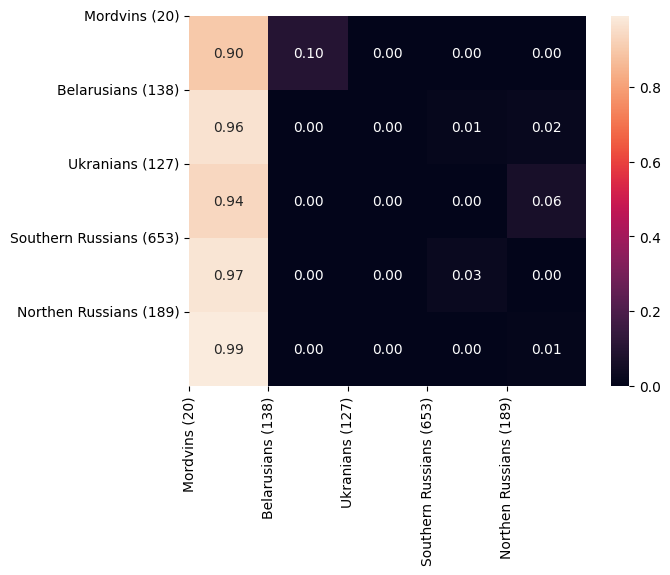

Step 1000
Time elapsed in min:  0.4756403644879659
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.68      0.63      0.65       138
           2       0.79      0.57      0.66       127
           3       0.89      0.96      0.92       653
           4       0.85      0.79      0.82       189

    accuracy                           0.85      1127
   macro avg       0.81      0.77      0.79      1127
weighted avg       0.84      0.85      0.84      1127

Current f1 score weighted: 0.8423559165247452
Current f1 score macro: 0.7870741517173511
Max f1 score weighted: 0.8423559165247452
Max f1 score macro: 0.7870741517173511


<Figure size 640x480 with 0 Axes>

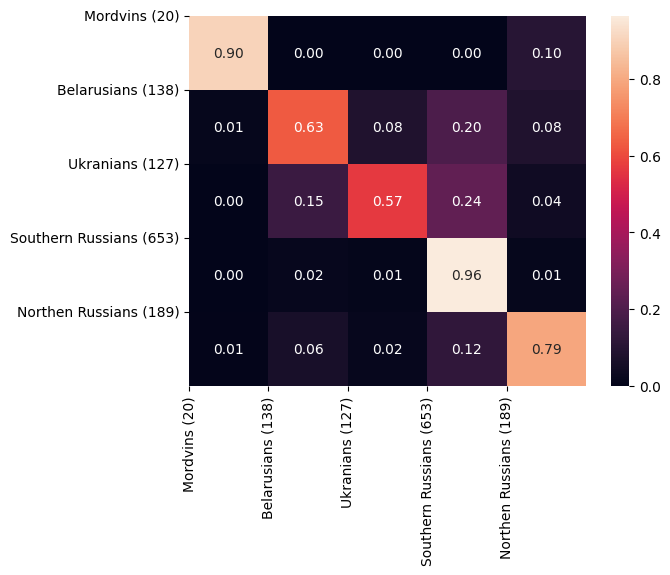

Step 2000
Time elapsed in min:  0.5776709198951722
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.67      0.49      0.56       138
           2       0.77      0.56      0.65       127
           3       0.85      0.98      0.91       653
           4       0.86      0.76      0.80       189

    accuracy                           0.83      1127
   macro avg       0.81      0.74      0.76      1127
weighted avg       0.82      0.83      0.82      1127

Current f1 score weighted: 0.8195984406112885
Current f1 score macro: 0.7648296574078449
Max f1 score weighted: 0.8423559165247452
Max f1 score macro: 0.7870741517173511


<Figure size 640x480 with 0 Axes>

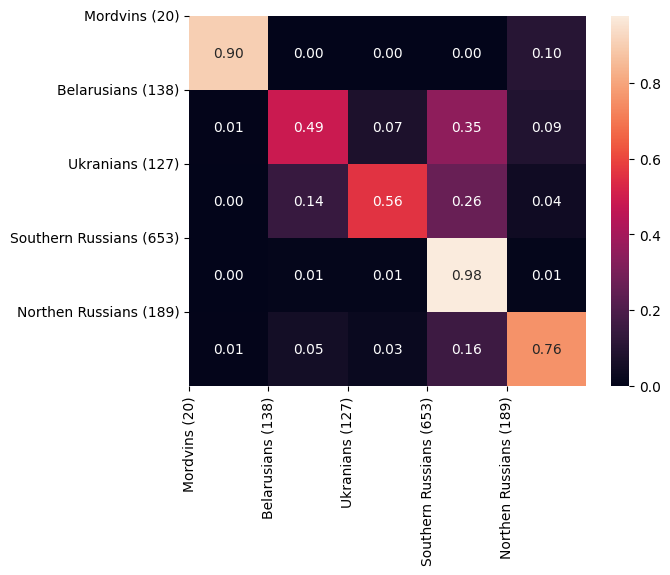

Step 3000
Time elapsed in min:  0.6773726542790731
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.66      0.46      0.54       138
           2       0.77      0.55      0.64       127
           3       0.85      0.98      0.91       653
           4       0.85      0.75      0.80       189

    accuracy                           0.83      1127
   macro avg       0.82      0.73      0.76      1127
weighted avg       0.82      0.83      0.81      1127

Current f1 score weighted: 0.8141328313840002
Current f1 score macro: 0.7625639556989328
Max f1 score weighted: 0.8423559165247452
Max f1 score macro: 0.7870741517173511


<Figure size 640x480 with 0 Axes>

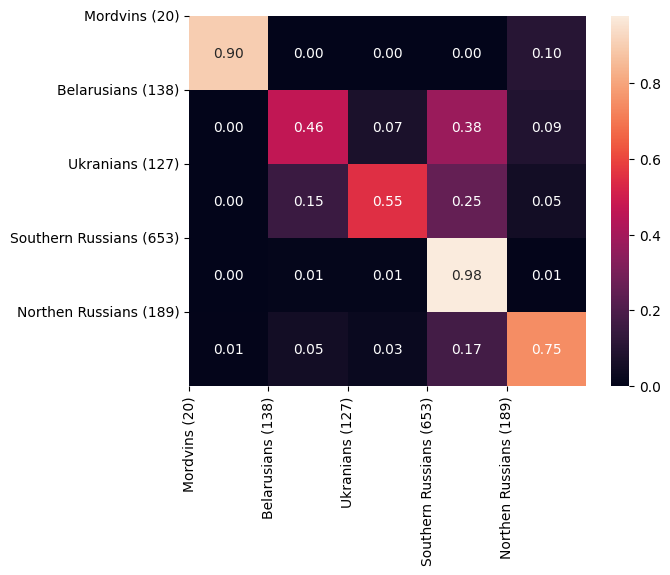

Step 4000
Time elapsed in min:  0.7768057227134705
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.67      0.47      0.55       138
           2       0.78      0.54      0.64       127
           3       0.84      0.97      0.90       653
           4       0.83      0.73      0.78       189

    accuracy                           0.82      1127
   macro avg       0.81      0.72      0.76      1127
weighted avg       0.81      0.82      0.81      1127

Current f1 score weighted: 0.8095733363322523
Current f1 score macro: 0.7590780021141817
Max f1 score weighted: 0.8423559165247452
Max f1 score macro: 0.7870741517173511


<Figure size 640x480 with 0 Axes>

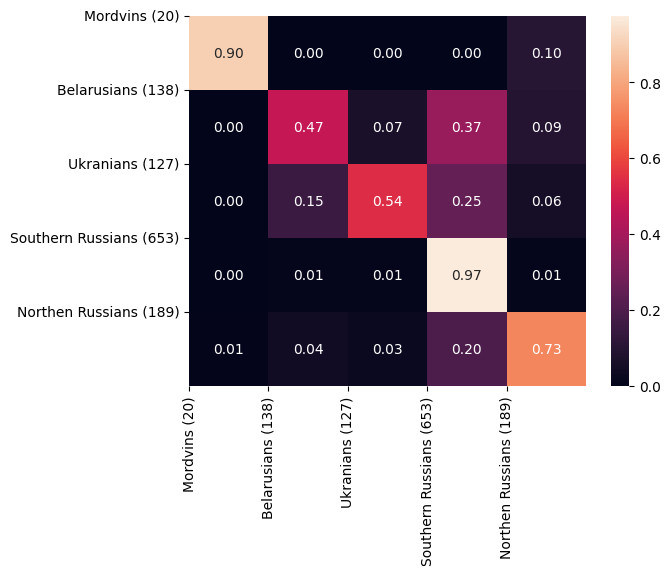

Step 5000
Time elapsed in min:  0.8756460746129354
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.64      0.46      0.53       138
           2       0.74      0.54      0.62       127
           3       0.83      0.96      0.89       653
           4       0.82      0.71      0.76       189

    accuracy                           0.81      1127
   macro avg       0.80      0.71      0.75      1127
weighted avg       0.80      0.81      0.80      1127

Current f1 score weighted: 0.7980620180372056
Current f1 score macro: 0.7473906479139687
Max f1 score weighted: 0.8423559165247452
Max f1 score macro: 0.7870741517173511


<Figure size 640x480 with 0 Axes>

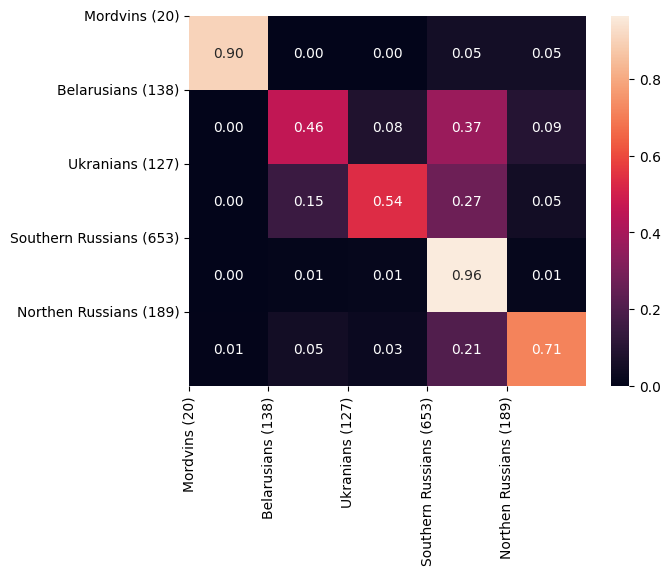

Step 6000
Time elapsed in min:  0.9752548257509868
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.62      0.46      0.53       138
           2       0.76      0.53      0.62       127
           3       0.83      0.96      0.89       653
           4       0.82      0.71      0.76       189

    accuracy                           0.81      1127
   macro avg       0.80      0.71      0.75      1127
weighted avg       0.80      0.81      0.80      1127

Current f1 score weighted: 0.7971271606573999
Current f1 score macro: 0.746373564017489
Max f1 score weighted: 0.8423559165247452
Max f1 score macro: 0.7870741517173511


<Figure size 640x480 with 0 Axes>

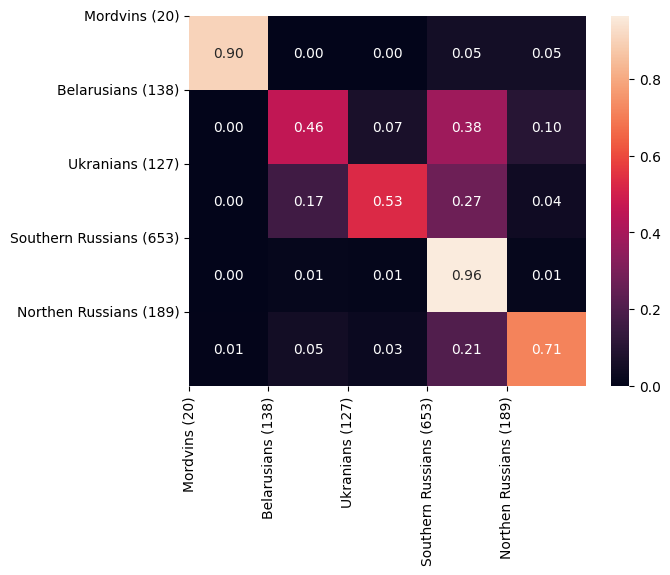

Step 7000
Time elapsed in min:  1.0746869007746378
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.63      0.45      0.53       138
           2       0.76      0.53      0.62       127
           3       0.83      0.96      0.89       653
           4       0.81      0.71      0.76       189

    accuracy                           0.81      1127
   macro avg       0.80      0.70      0.74      1127
weighted avg       0.80      0.81      0.79      1127

Current f1 score weighted: 0.794950179611867
Current f1 score macro: 0.7392356693428569
Max f1 score weighted: 0.8423559165247452
Max f1 score macro: 0.7870741517173511


<Figure size 640x480 with 0 Axes>

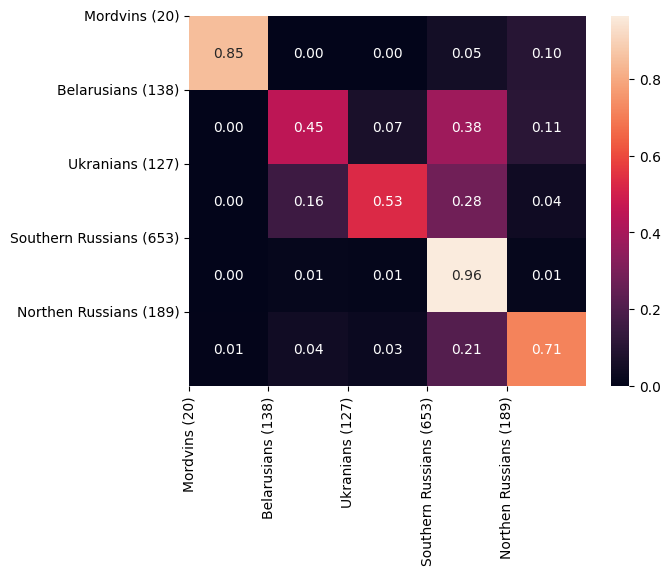

KeyboardInterrupt: 

In [15]:
# types = ['Chechens', 'Kabardians, Circassians, Adyghes', 'Karachays, Balkars', 'Ingush', 'Dagestan peoples', 'Ossetians', 'Kumyks', 'Nogais']
types = ['Mordvins', 'Belarusians', 'Ukranians', 'Southern Russians', 'Northen Russians']

start = time.time()
 

    
# class Net3(torch.nn.Module):
#     def __init__(self):
#         super(Net3, self).__init__()
#         self.net = Net()
#         self.conv1 = FastRGCNConv(data.num_features, 128)
#         self.conv2 = FastRGCNConv(128, 128)
#         self.conv3 = FastRGCNConv(128, int(data.num_classes))

#     def forward(self, data):
#         x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
#         x = F.elu(self.conv1(x, edge_index))
#         x = F.elu(self.conv2(x, edge_index))
#         x = self.conv3(x, edge_index)
#         return x
    
# class Net4(torch.nn.Module):
#     def __init__(self):
#         super(Net4, self).__init__()
#         self.net = Net()
#         self.conv1 = EdgeConv(self.net)

#     def forward(self, data):
#         x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
#         x = self.conv1(x, edge_index)
#         return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SAGEConv_3l_128h().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Define optimizer.

max_f1_score = 0
max_f1_score_macro = 0

def evaluation(model, test_graphs, step):
    
    global start
    
    print('Time elapsed in min: ', (time.time() - start) / 60)
    
    model.eval()
    y_true = []
    y_pred = []
    
    global max_f1_score, max_f1_score_macro

    for i in range(len(test_graphs)):
        p = F.softmax(model(test_graphs[i].to(device))[-1], dim=0).cpu().detach().numpy()
        y_pred.append(np.argmax(p))
        y_true.append(test_graphs[i].y[-1].cpu().detach())
    
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    y_true = np.array(y_true)
    
    plt.clf()
    fig, ax = plt.subplots(1, 1)
    sns.heatmap(cm, annot=True, fmt=".2f", ax=ax)
    ax.set_xticks([i for i in range(len(types))])
    ax.set_xticklabels([f'{t} ({len(y_true[y_true == n])})' for n, t in enumerate(types)])
    ax.set_yticks([i for i in range(len(types))])
    ax.set_yticklabels([f'{t} ({len(y_true[y_true == n])})' for n, t in enumerate(types)])
#     fig.suptitle("Confusion matrix")
    plt.yticks(rotation=0)
    plt.xticks(rotation=90) 
#     plt.savefig(rf"C:\HSE\genotek\cm_cr_{step}.png", bbox_inches="tight")
    
    current_f1_score = f1_score(y_true, y_pred, average='weighted')
    current_f1_score_macro = f1_score(y_true, y_pred, average='macro')
    
    print(f"Current f1 score weighted: {current_f1_score}")
    print(f"Current f1 score macro: {current_f1_score_macro}")
    if current_f1_score > max_f1_score:
        max_f1_score = current_f1_score
#         max_f1_score_macro = current_f1_score_macro
#         plt.savefig(rf"C:\HSE\genotek\cm_nc_best.png", bbox_inches="tight")
        
    if current_f1_score_macro > max_f1_score_macro:
        max_f1_score_macro = current_f1_score_macro
        plt.savefig(rf"C:\HSE\genotek\cm_nc_best.png", bbox_inches="tight")
        
    print(f"Max f1 score weighted: {max_f1_score}")
    print(f"Max f1 score macro: {max_f1_score_macro}")
    
    plt.show()
        
    model.train()
    

def train(data, log_step, num_epochs, test_graphs, mask_array):
    model.train()
    data =  data.to(device)
    for i in range(num_epochs):
        if i % log_step == 0:
            print(f'Step {i}')
            evaluation(model, test_graphs, i)
        optimizer.zero_grad()  # Clear gradients.
        out = model(data)  # Perform a single forward pass.
#         loss = criterion(out[mask_array], data.y[mask_array])  # Compute the loss solely based on the training nodes.
        loss = criterion(out, data.y)
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.

train(data, 1000, 35000, test_graphs, mask_array)

# model = None
# gc.collect() # Python thing
# torch.cuda.empty_cache() # PyTorch thing

In [16]:
torch.save(model, 'model_for_kenenbek_TAGConv_3l_512h_w_k3.pth')

In [ ]:
0.9653819121575911

In [195]:
np.all(np.unique(data.edge_index.cpu().detach().numpy()) == np.arange(2635))

True

In [196]:
np.arange(2635)

array([   0,    1,    2, ..., 2632, 2633, 2634])

# Train on test graphs

In [20]:
model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

In [51]:
class SSGConv_3l_xh_w_a09_k1(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_xh_w_a09_k1, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, alpha=0.5, add_self_loops=False, K=2)
        self.conv2 = SSGConv(128, 128, alpha=0.5, add_self_loops=False, K=2)
        self.conv3 = SSGConv(128, int(data.num_classes), alpha=0.5, add_self_loops=False, K=2)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class TAGConv_3l_xh_w_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_xh_w_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 64)
        self.conv2 = TAGConv(64, 64)
        self.conv3 = TAGConv(64, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class GATv2Conv_3l_xh(torch.nn.Module):
    def __init__(self):
        super(GATv2Conv_3l_xh, self).__init__()
        self.conv1 = GATConv(data.num_features, 128, add_self_loops=False)
        self.conv2 = GATConv(128, 128, add_self_loops=False)
        self.conv3 = GATConv(128, int(data.num_classes), add_self_loops=False)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x

In [59]:
# types = ['Chechens', 'Kabardians, Circassians, Adyghes', 'Karachays, Balkars', 'Ingush', 'Dagestan peoples', 'Ossetians', 'Kumyks', 'Nogais']
types = ['Mordvins', 'Belarusians', 'Ukranians', 'Southern Russians', 'Northen Russians']

start = time.time()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

max_f1_score = 0
max_f1_score_macro = 0

def evaluation_x(model, data, step, all_steps, device):
    
    global start
    
    tmp_t = (time.time() - start) / 60
    one_epoch_time = tmp_t / (step+1)
    print(f'Time elapsed in min: {tmp_t}, step: {step}/{all_steps}, estimated (min): {one_epoch_time*all_steps - tmp_t}')

    p = F.softmax(model(data.to(device))[-1], dim=0).cpu().detach().numpy()
    y_pred = np.argmax(p)
    y_true = data.y[-1].cpu().detach()
    
    return y_pred, y_true
    

def train_x(num_epochs, test_graphs, device):
    
    all_predictions = []
    all_ground_truth = []
    
    for j in range(len(test_graphs)):
    
        model = SSGConv_3l_xh_w_a09_k1().to(device)

        criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Define optimizer.

        model.train()
        data =  test_graphs[j].to(device)
        for i in range(num_epochs):
            optimizer.zero_grad()  # Clear gradients.
            out = model(data)  # Perform a single forward pass.
            loss = criterion(out[:-1], data.y[:-1])
            loss.backward()  # Derive gradients.
            optimizer.step()  # Update parameters based on gradients.
        
        print(f'LOSS: {loss}')
        model.eval()
        pred_val, true_val = evaluation_x(model, data, j, len(test_graphs), device)
        test_graphs[j].cpu()
        
        all_predictions.append(pred_val)
        all_ground_truth.append(true_val)
        f1_score_weighted = f1_score(all_ground_truth, all_predictions, average='weighted')
        f1_score_macro = f1_score(all_ground_truth, all_predictions, average='macro')
        print(f"TMP weighted/macro: {f1_score_weighted}/{f1_score_macro}")
        
    f1_score_weighted = f1_score(all_ground_truth, all_predictions, average='weighted')
    f1_score_macro = f1_score(all_ground_truth, all_predictions, average='macro')
    print(f"Final f1 score weighted: {f1_score_weighted}")
    print(f"Final f1 score macro: {f1_score_macro}")
        

train_x(1000, test_graphs, device)

# model = None
# gc.collect() # Python thing
# torch.cuda.empty_cache() # PyTorch thing

LOSS: 1.1287968158721924
Time elapsed in min: 0.10051737229029338, step: 0/1127, estimated (min): 113.18256119887035
TMP weighted/macro: 0.0/0.0
LOSS: 1.1060547828674316
Time elapsed in min: 0.1948114315668742, step: 1/1127, estimated (min): 109.58143025636673
TMP weighted/macro: 0.0/0.0
LOSS: 1.1286169290542603
Time elapsed in min: 0.28917473554611206, step: 2/1127, estimated (min): 108.34413425127664
TMP weighted/macro: 0.0/0.0


KeyboardInterrupt: 

In [16]:
np.array([1, 2, 3,4, 5, 6])[:-1]

array([1, 2, 3, 4, 5])

# Check generated graphs (my method) vs networkx

In [198]:
import torch_geometric

In [199]:
train_graph_my_method_to_network_x = torch_geometric.utils.to_networkx(data)

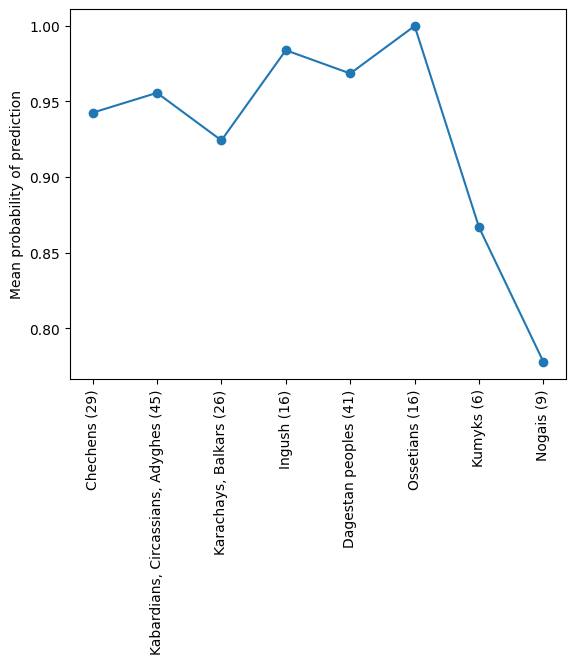

In [52]:
p_answers_sel = np.zeros(len(types))
for i in range(len(types)):
    p_true = np.array(p_true)
    p_true_idx = p_true == i

    p_answers_sel[i] = (np.sum(np.array(p_answers)[p_true_idx], axis=0) / len(p_true[p_true_idx]))[i]

plt.clf()
plt.plot(p_answers_sel, marker='o')
plt.ylabel('Mean probability of prediction')
plt.xticks([i for i in range(len(types))], [f'{t} ({len(p_true[p_true == n])})' for n, t in enumerate(types)], rotation=90)
plt.savefig(rf"C:\HSE\genotek\robust_cr.png", bbox_inches="tight")
plt.show()

In [36]:
p_answers

[]

# TripletLoss GNN

In [57]:
def _masked_minimum_torch(data, mask, dim=1):
    """Computes the axis wise minimum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the minimum.

    Returns:
      masked_minimums: N-D `Tensor`.
        The minimized dimension is of size 1 after the operation.
    """
    axis_maximums = torch.max(data, dim, keepdims=True)[0]
    masked_minimums = (
        torch.min(
            torch.multiply(data - axis_maximums, mask), dim, keepdims=True
        )[0]
        + axis_maximums
    )
    return masked_minimums


def _masked_maximum_torch(data, mask, dim=1):
    """Computes the axis wise maximum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the maximum.

    Returns:
      masked_maximums: N-D `Tensor`.
        The maximized dimension is of size 1 after the operation.
    """
    axis_minimums = torch.min(data, dim, keepdims=True)[0]
    masked_maximums = (
        torch.max(
            torch.multiply(data - axis_minimums, mask), dim, keepdims=True
        )[0]
        + axis_minimums
    )
    return masked_maximums

In [58]:
class TripletSemiHardLoss(nn.Module):
    def __init__(self, margin=0.2):
        super(TripletSemiHardLoss, self).__init__()
        
        self.margin = margin

    def forward(self, y_pred, y_true):
        labels = y_true
        embeddings = y_pred

        convert_to_float32 = (
            embeddings.dtype == torch.float16 or embeddings.dtype == torch.bfloat16
        )
        precise_embeddings = (
            embeddings.type(torch.float32) if convert_to_float32 else embeddings
        )

        # Reshape label tensor to [batch_size, 1].
        lshape = labels.shape
        labels = labels.view(lshape[0], 1)

        # Build pairwise squared distance matrix

        pdist_matrix = torch.cdist(precise_embeddings, precise_embeddings)
        
#         print(pdist_matrix)

        # Build pairwise binary adjacency matrix.
        adjacency = torch.eq(labels, labels.T).long()
#         print(adjacency)
        # Invert so we can select negatives only.
        adjacency_not = torch.logical_not(adjacency).long()
#         print(adjacency_not)

        batch_size = labels.shape[0]

        # Compute the mask.
        pdist_matrix_tile = torch.tile(pdist_matrix, (batch_size, 1))
#         print(pdist_matrix_tile)
        
        mask = torch.logical_and(
            torch.tile(adjacency_not, (batch_size, 1)),
            torch.gt(
                pdist_matrix_tile, pdist_matrix.T.reshape(-1, 1))
            ).long()
#         tf.print(mask)
        
        mask_final = torch.gt(
                torch.sum(
                    mask.type(torch.float32), axis=1, keepdims=True
                ),
                0.0,
            ).view((batch_size, batch_size))
        
#         print(mask_final)
        
        mask_final = mask_final.T

        adjacency_not = adjacency_not.type(torch.float32)
        mask = mask.type(torch.float32)

        # negatives_outside: smallest D_an where D_an > D_ap.
        negatives_outside = _masked_minimum_torch(pdist_matrix_tile, mask).view(batch_size, batch_size)
        
#         print(negatives_outside)
        
        negatives_outside = negatives_outside.T

        # negatives_inside: largest D_an.
        negatives_inside = torch.tile(
            _masked_maximum_torch(pdist_matrix, adjacency_not), (1, batch_size)
        )
#         print(negatives_inside)
        
        semi_hard_negatives = torch.where(mask_final, negatives_outside, negatives_inside)
        
#         print(semi_hard_negatives)

        loss_mat = torch.add(self.margin, pdist_matrix - semi_hard_negatives)
    
#         print(loss_mat)

        mask_positives = adjacency.type(torch.float32) - torch.diag(
            torch.ones(batch_size).to('cuda')
        )
    
#         print(mask_positives)

        # In lifted-struct, the authors multiply 0.5 for upper triangular
        #   in semihard, they take all positive pairs except the diagonal.
        num_positives = torch.sum(mask_positives)
        
#         print(num_positives)

        triplet_loss = torch.true_divide(
            torch.sum(
                torch.maximum(tmp := torch.multiply(loss_mat, mask_positives), torch.zeros(tmp.shape).to('cuda'))
            ),
            num_positives,
        )
    
#         print(
#                 torch.max(tmp := torch.multiply(loss_mat, mask_positives), torch.zeros(tmp.shape).to('cuda'))[0]
#             )
    ################################TF###############################
#         triplet_loss = tf.math.truediv(
#             tf.math.reduce_sum(
#                 tf.math.maximum(tf.math.multiply(loss_mat, mask_positives), 0.0)
#             ),
#             num_positives,
#         )
    ###############################TF#######################################
    
#         print(triplet_loss)

        if convert_to_float32:
            return triplet_loss.type(embeddings.dtype)
        else:
            return triplet_loss

In [86]:
class SSGConv_3l_128h_w_k1_l128(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_128h_w_k1_l128, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, alpha=0.5)
        self.conv2 = SSGConv(128, 128, alpha=0.5)
        self.conv3 = SSGConv(128, 128, alpha=0.5)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x
    
class SSGConv_3l_128h_w_k3_l128(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_128h_w_k3_l128, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, K=3, alpha=1.)
        self.conv2 = SSGConv(128, 128, K=3, alpha=1.)
        self.conv3 = SSGConv(128, 128, K=3, alpha=1.)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x

class TAGConv_3l_128h_w_k3_l128(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_128h_w_k3_l128, self).__init__()
        self.norm = LayerNorm(data.num_features)
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, 128)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = self.norm(x)
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x
    
class TAGConv_9l_128h_w_k3_l128(torch.nn.Module):
    def __init__(self):
        super(TAGConv_9l_128h_w_k3_l128, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, 128)
        self.conv4 = TAGConv(128, 128)
        self.conv5 = TAGConv(128, 128)
        self.conv6 = TAGConv(128, 128)
        self.conv7 = TAGConv(128, 128)
        self.conv8 = TAGConv(128, 128)
        self.conv9 = TAGConv(128, 128)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = F.elu(self.conv3(x, edge_index, edge_attr))
        x = F.elu(self.conv4(x, edge_index, edge_attr))
        x = F.elu(self.conv5(x, edge_index, edge_attr))
        x = F.elu(self.conv6(x, edge_index, edge_attr))
        x = F.elu(self.conv7(x, edge_index, edge_attr))
        x = F.elu(self.conv8(x, edge_index, edge_attr))
        x = self.conv9(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x
    
class TAGConv_3l_512h_w_k3_l128(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_512h_w_k3_l128, self).__init__()
        self.conv1 = TAGConv(data.num_features, 512)
        self.conv2 = TAGConv(512, 512)
        self.conv3 = TAGConv(512, 128)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x
    
class GCNConv_3l_128h_w_l128(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_128h_w_l128, self).__init__()
        self.conv1 = GCNConv(data.num_features, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, 128)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x
    
class ChebConv_3l_128h_w_k3(torch.nn.Module):
    def __init__(self):
        super(ChebConv_3l_128h_w_k3, self).__init__()
        self.conv1 = ChebConv(data.num_features, 128, K=3)
        self.conv2 = ChebConv(128, 128, K=3)
        self.conv3 = ChebConv(128, 128, K=3)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x
    
class GINnn(torch.nn.Module):
    def __init__(self):
        super(GINnn, self).__init__()
        self.gin = GIN(in_channels=data.num_features, hidden_channels=32, num_layers=3, out_channels=data.num_classes)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = self.gin(x, edge_index)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x

In [49]:
torch.nn.functional.normalize(torch.tensor(np.arange(12).reshape(3, -1).astype(float)), p=2, dim=1)

tensor([[0.0000, 0.2673, 0.5345, 0.8018],
        [0.3563, 0.4454, 0.5345, 0.6236],
        [0.4182, 0.4704, 0.5227, 0.5750]], dtype=torch.float64)

In [60]:
np.sort([7, 8, 2, 5, 1])

array([1, 2, 5, 7, 8])

In [87]:
model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

Step 0
LOSS: 0, 0/50000
              precision    recall  f1-score   support

           0       0.33      0.10      0.15        20
           1       0.22      0.06      0.09       138
           2       0.43      0.44      0.44       127
           3       0.68      0.87      0.77       653
           4       0.24      0.15      0.19       189

    accuracy                           0.59      1127
   macro avg       0.38      0.33      0.33      1127
weighted avg       0.52      0.59      0.54      1127

Final f1 score weighted: 0.5388784877019107
Final f1 score macro: 0.32705063611211727
Max f1 score weighted: 0.5388784877019107
Max f1 score macro: 0.32705063611211727


<Figure size 640x480 with 0 Axes>

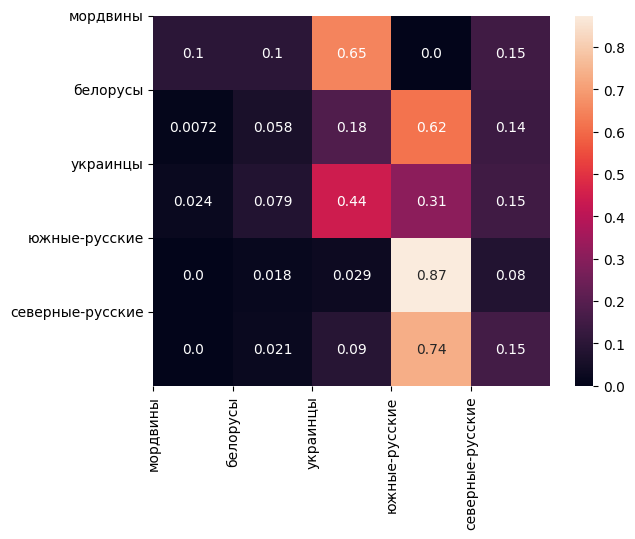

Step 2000
LOSS: 0.20000003278255463, 2000/50000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00       138
           2       0.00      0.00      0.00       127
           3       0.58      1.00      0.73       653
           4       0.00      0.00      0.00       189

    accuracy                           0.58      1127
   macro avg       0.12      0.20      0.15      1127
weighted avg       0.34      0.58      0.43      1127

Final f1 score weighted: 0.4251208837223213
Final f1 score macro: 0.14674157303370786
Max f1 score weighted: 0.5388784877019107
Max f1 score macro: 0.32705063611211727


C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<Figure size 640x480 with 0 Axes>

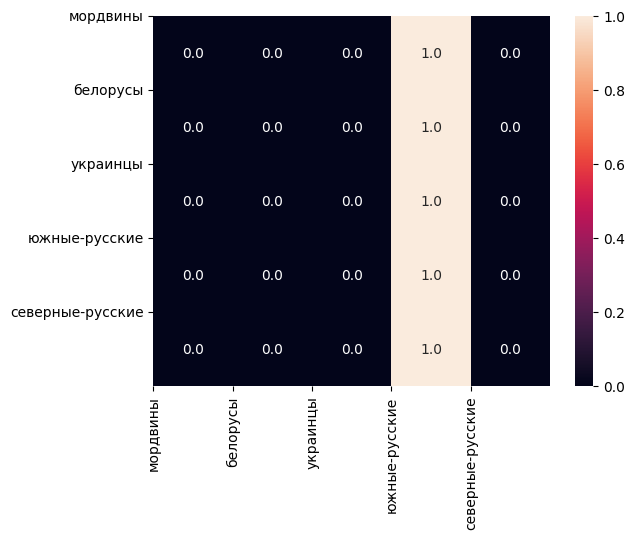

Step 4000
LOSS: 0.20000004768371582, 4000/50000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00       138
           2       0.00      0.00      0.00       127
           3       0.58      1.00      0.73       653
           4       0.00      0.00      0.00       189

    accuracy                           0.58      1127
   macro avg       0.12      0.20      0.15      1127
weighted avg       0.34      0.58      0.43      1127

Final f1 score weighted: 0.4251208837223213
Final f1 score macro: 0.14674157303370786
Max f1 score weighted: 0.5388784877019107
Max f1 score macro: 0.32705063611211727


C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<Figure size 640x480 with 0 Axes>

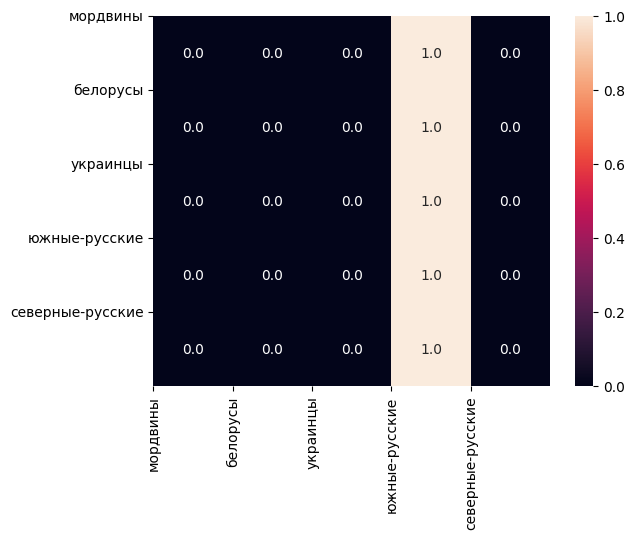

KeyboardInterrupt: 

In [88]:
# Implementation with TripletLoss

# import gc
# import torch
# import torch.nn as nn
import torch.nn.functional as F
# from sklearn.metrics import f1_score
from torch_geometric.nn import GCNConv, GATConv, TransformerConv, NNConv, SGConv, ARMAConv, TAGConv, ChebConv, DNAConv, SSGConv
import time
# from torch.nn import Linear
from torch.optim.lr_scheduler import StepLR

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GINnn().to(device)

criterion = TripletSemiHardLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Define optimizer.
# scheduler = StepLR(optimizer, step_size=1000, gamma=0.9)

max_f1_score = 0
max_f1_score_macro = 0

def evaluation(model, test_graphs, i, types):
    
    model.eval()
    
    global max_f1_score, max_f1_score_macro
    
    target_train = np.zeros((len(data.y), len(types)))
    for i in range(len(data.y)):
        target_train[i, data.y[i]] = 1
    
    results_train = model(data).cpu().detach().numpy()
        
    target_test = []
    for i in range(len(test_graphs)):
        tmparray = np.zeros(len(types))
        tmparray[test_graphs[i][0].y[-1]] = 1
        target_test.append(tmparray)

    target_test = np.array(target_test)

    results_test = []
    for i in range(len(test_graphs)):
        tmp_test_results = []
        min_distances = []
        for j in range(len(types)):
            tmp_test_results.append(model(test_graphs[i][j].to(device))[-1].cpu().detach().numpy())
            test_graphs[i][j].cpu()
            min_distances.append(np.min(np.linalg.norm(tmp_test_results[-1] - results_train, axis=1)))
        results_test.append(tmp_test_results[np.argmin(min_distances)])
        

    results_test = np.array(results_test)
    
    # actually calculating labels
    
    ground_truth = []
    predicted_labels = []
    for i in range(len(results_test)):
        vec = results_test[i]
        real = target_test[i]
        
        class_list = np.argmax(target_train[np.argsort(np.linalg.norm(vec - results_train, axis=1))[:10]],
                               axis=-1).squeeze()

        ground_truth.append(np.argmax(real.squeeze()))

        uniq, cnts = np.unique(class_list, return_counts=True)
        u_l = np.asarray((uniq, cnts)).T
        u_l_as = np.argsort(u_l[:, 1])
        predicted_labels.append(u_l[u_l_as[::-1]][0, 0])

    print(classification_report(ground_truth, predicted_labels))
    cm = confusion_matrix(ground_truth, predicted_labels, normalize='true')

    final_f1_weighted_score = f1_score(ground_truth, predicted_labels, average='weighted')
    final_f1_macro_score = f1_score(ground_truth, predicted_labels, average='macro')

    print(f"Final f1 score weighted: {final_f1_weighted_score}")
    print(f"Final f1 score macro: {final_f1_macro_score}")
    
    if final_f1_weighted_score > max_f1_score:
        max_f1_score = final_f1_weighted_score
        
    if final_f1_macro_score > max_f1_score_macro:
        max_f1_score_macro = final_f1_macro_score
        
    print(f"Max f1 score weighted: {max_f1_score}")
    print(f"Max f1 score macro: {max_f1_score_macro}")

    plt.clf()

    px = 1 / plt.rcParams['figure.dpi']

    fig, ax = plt.subplots(1, 1)#figsize=(4000 * px, 4000 * px))
    sns.heatmap(cm, annot=True, ax=ax, annot_kws={'size': 10}, fmt='.2')
    ax.set_xticks([i for i in range(len(types))])
    ax.set_xticklabels([f'{types[i]}' for i in range(0, len(types))])
    ax.set_yticks([i for i in range(len(types))])
    ax.set_yticklabels([f'{types[i]}' for i in range(0, len(types))])
    plt.yticks(rotation=0)
    plt.xticks(rotation=90) 
    plt.show()
    
    model.train()
    

def train(data, log_step, num_epochs, test_graphs, types):
    model.train()
    data =  data.to(device)
    loss = 0
    for i in range(num_epochs):
        
        if i % log_step == 0:
            print(f'Step {i}')
            print(f'LOSS: {loss}, {i}/{num_epochs}')
#             print(scheduler.get_lr())
            evaluation(model, test_graphs, i, types)
        
        optimizer.zero_grad()  # Clear gradients.
        out = model(data)  # Perform a single forward pass.
        
        selector = np.array([True if i < 256 else False for i in range(out.shape[0])]) # 256 for CR, 1024 for NC !!!!!!!!!
        randomize = np.arange(out.shape[0])
        np.random.shuffle(randomize)
        selector = selector[randomize]
        
        loss = criterion(out[selector], data.y[selector])  # Compute the loss solely based on the training nodes.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
#         scheduler.step()

start = time.time()
train(data, 2000, 50000, test_graphs, types)
end = time.time()

print(f'RUNTIME (min): {(end-start) / 60}')

# model = None
# gc.collect() # Python thing
# torch.cuda.empty_cache() # PyTorch thing

In [18]:
for i in range(len(test_graphs)):
    test_graphs[i] = test_graphs[i].cpu()

# Testing TripletLoss (clustering algorithms) - new approach

In [35]:
model.eval()

SSGConv_3l_128h_w_k3_l128(
  (conv1): SSGConv(8, 128, K=1, alpha=0.9)
  (conv2): SSGConv(128, 128, K=1, alpha=0.9)
  (conv3): SSGConv(128, 128, K=1, alpha=0.9)
)

In [36]:
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import v_measure_score

In [38]:
target_train = np.zeros((len(data.y), len(types)))
for i in range(len(data.y)):
    target_train[i, data.y[i]] = 1
    
results_train = model(data).cpu().detach().numpy()

In [39]:
target_test = []
for i in range(len(test_graphs)):
    tmparray = np.zeros(len(types))
    tmparray[test_graphs[i].y[-1]] = 1
    target_test.append(tmparray)
    
target_test = np.argmax(np.array(target_test), axis=1)

In [40]:
results_test = []
for i in range(len(test_graphs)):
    print(f'{i} / {len(test_graphs)} node')
    results_test.append(model(test_graphs[i].to(device))[-1].cpu().detach().numpy())
    test_graphs[i].cpu()
    
results_test = np.array(results_test)

0 / 188 node
1 / 188 node
2 / 188 node
3 / 188 node
4 / 188 node
5 / 188 node
6 / 188 node
7 / 188 node
8 / 188 node
9 / 188 node
10 / 188 node
11 / 188 node
12 / 188 node
13 / 188 node
14 / 188 node
15 / 188 node
16 / 188 node
17 / 188 node
18 / 188 node
19 / 188 node
20 / 188 node
21 / 188 node
22 / 188 node
23 / 188 node
24 / 188 node
25 / 188 node
26 / 188 node
27 / 188 node
28 / 188 node
29 / 188 node
30 / 188 node
31 / 188 node
32 / 188 node
33 / 188 node
34 / 188 node
35 / 188 node
36 / 188 node
37 / 188 node
38 / 188 node
39 / 188 node
40 / 188 node
41 / 188 node
42 / 188 node
43 / 188 node
44 / 188 node
45 / 188 node
46 / 188 node
47 / 188 node
48 / 188 node
49 / 188 node
50 / 188 node
51 / 188 node
52 / 188 node
53 / 188 node
54 / 188 node
55 / 188 node
56 / 188 node
57 / 188 node
58 / 188 node
59 / 188 node
60 / 188 node
61 / 188 node
62 / 188 node
63 / 188 node
64 / 188 node
65 / 188 node
66 / 188 node
67 / 188 node
68 / 188 node
69 / 188 node
70 / 188 node
71 / 188 node
72

In [42]:
raw_preds = []

# neigh = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
# neigh.fit(results_train, np.argmax(np.array(target_train), axis=1))

for k, res in enumerate(results_test):
    print(f'{k}/{len(results_test)}')
    current_results_test = np.concatenate([results_train, np.expand_dims(res, axis=0)])
    current_sk = SpectralClustering(n_clusters=len(types), n_init=100, assign_labels='discretize', gamma=5, random_state=0).fit(current_results_test)
    raw_preds.append(current_sk.labels_[-1])
#     raw_preds.append(neigh.predict(current_results_test)[-1])
raw_preds = np.array(raw_preds)

ars = adjusted_rand_score(target_test, raw_preds)
vms = v_measure_score(target_test, raw_preds)
print(ars, vms)

0/188
1/188
2/188
3/188
4/188
5/188
6/188
7/188
8/188
9/188
10/188
11/188
12/188
13/188
14/188
15/188
16/188
17/188
18/188
19/188
20/188
21/188
22/188
23/188
24/188
25/188
26/188
27/188
28/188
29/188
30/188
31/188
32/188
33/188
34/188
35/188
36/188
37/188
38/188
39/188
40/188
41/188
42/188
43/188
44/188
45/188
46/188
47/188
48/188
49/188
50/188
51/188
52/188
53/188
54/188
55/188
56/188
57/188
58/188
59/188
60/188
61/188
62/188
63/188
64/188
65/188
66/188
67/188
68/188
69/188
70/188
71/188
72/188
73/188
74/188
75/188
76/188
77/188
78/188
79/188
80/188
81/188
82/188
83/188
84/188
85/188
86/188
87/188
88/188
89/188
90/188
91/188
92/188
93/188
94/188
95/188
96/188
97/188
98/188
99/188
100/188
101/188
102/188
103/188
104/188
105/188
106/188
107/188
108/188
109/188
110/188
111/188
112/188
113/188
114/188
115/188
116/188
117/188
118/188
119/188
120/188
121/188
122/188
123/188
124/188
125/188
126/188
127/188
128/188
129/188
130/188
131/188
132/188
133/188
134/188
135/188
136/188
137/188
138/18

In [202]:
np.argmax([[0, 0, 0, 1], [0, 0, 1, 0]], axis=1)

array([3, 2], dtype=int64)

In [139]:
np.mean([0, 0, 0, 1, 1])

0.4

In [141]:
np.mean([1, 1, 1, 0, 0])

4.6

In [143]:
v_measure_score([1, 1, 1, 0, 0], [0, 0, 0, 1, 1])

1.0

In [29]:
raw_preds

array([4, 4, 4, ..., 0, 0, 4], dtype=int64)

In [129]:
target_test

array([3, 5, 3, 3, 5, 7, 3, 4, 5, 3, 4, 4, 3, 7, 4, 5, 5, 4, 4, 4, 4, 5,
       4, 3, 1, 2, 7, 1, 1, 1, 3, 5, 5, 0, 7, 2, 5, 1, 4, 4, 4, 2, 3, 0,
       7, 4, 3, 1, 2, 1, 2, 2, 2, 5, 1, 0, 5, 0, 7, 4, 4, 5, 1, 0, 4, 0,
       1, 1, 1, 2, 7, 0, 0, 1, 1, 1, 4, 3, 4, 4, 0, 3, 5, 1, 4, 4, 1, 4,
       0, 3, 1, 4, 0, 6, 2, 4, 4, 4, 2, 1, 1, 4, 0, 2, 3, 2, 0, 6, 5, 0,
       4, 2, 0, 1, 1, 1, 4, 1, 4, 2, 2, 4, 0, 2, 5, 6, 1, 2, 1, 1, 4, 0,
       1, 0, 4, 2, 1, 1, 1, 1, 2, 1, 1, 6, 7, 7, 2, 0, 1, 4, 2, 0, 4, 1,
       0, 1, 5, 2, 6, 3, 2, 1, 4, 4, 0, 0, 0, 4, 3, 4, 1, 1, 2, 0, 1, 2,
       0, 2, 0, 0, 0, 1, 1, 6, 1, 1, 4, 4], dtype=int64)

In [30]:
results_train.shape

(2635, 128)

In [31]:
results_test.shape

(1132, 128)

In [37]:
target_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Spektral Clustering

In [107]:
# clustering_sk = SpectralClustering(n_clusters=len(types), assign_labels='discretize', random_state=0).fit(all_results)
# clustering_sk.labels_

array([3, 2, 7, 7, 0, 1, 7, 2, 3, 1, 1, 1, 7, 3, 1, 3, 1, 3, 1, 3, 2, 1,
       6, 3, 2, 5, 0, 4, 5, 7, 3, 3, 7, 3, 3, 3, 2, 6, 5, 0, 3, 5, 2, 7,
       2, 3, 0, 2, 2, 0, 5, 3, 7, 7, 1, 2, 2, 7, 3, 3, 1, 7, 3, 7, 7, 3,
       0, 1, 1, 0, 5, 7, 2, 1, 3, 0, 1, 7, 0, 3, 1, 0, 3, 7, 6, 5, 7, 7,
       0, 3, 3, 5, 6, 7, 3, 3, 5, 7, 4, 7, 7, 7, 7, 7, 0, 7, 6, 3, 5, 7,
       1, 3, 7, 6, 0, 5, 7, 0, 1, 2, 6, 0, 1, 3, 3, 0, 0, 4, 7, 2, 1, 0,
       3, 7, 5, 3, 3, 6, 5, 3, 0, 3, 5, 3, 3, 6, 7, 7, 0, 7, 2, 0, 5, 3,
       7, 1, 3, 3, 3, 0, 3, 7, 2, 3, 3, 1, 0, 7, 7, 7, 5, 0, 7, 1, 7, 7,
       1, 1, 7, 3, 1, 2, 3, 1, 1, 0, 0, 1, 5, 3, 7, 3, 1, 3, 3, 7, 7, 7,
       5, 6, 0, 7, 5, 7, 5, 1, 2, 6, 3, 0, 3, 7, 3, 2, 3, 2, 0, 7, 2, 4,
       2, 7, 5, 0, 0, 3, 3, 3, 2, 1, 0, 3, 2, 7, 6, 6, 0, 3, 3, 1, 7, 5,
       7, 3, 4, 5, 2, 5, 5, 6, 7, 7, 3, 3, 2, 1, 2, 0, 0, 0, 3, 1, 1, 3,
       7, 1, 1, 2, 5, 2, 1, 7, 1, 3, 7, 0, 7, 5, 7, 6, 7, 7, 1, 0, 7, 2,
       7, 7, 1, 3, 7, 7, 0, 7, 2, 7, 7, 3, 7, 7, 0,

In [229]:
ars = adjusted_rand_score(target_test, raw_preds)
vms = v_measure_score(target_test, raw_preds)
print(ars, vms)

0.8745293452801638 0.8988048283222152


In [43]:
all_classes_unique_ids = np.unique(target_test)
mapping = dict()
for u_id in all_classes_unique_ids:
    selected_pred = raw_preds[target_test == u_id]
    mapping[u_id] = np.bincount(selected_pred).argmax()

print(mapping)
mapping = dict((v,k) for k,v in mapping.items())
if len(mapping) < len(types):
    print('Same label for different classes!!!')
else:
    predicted_labels = []
    for l in raw_preds:
        predicted_labels.append(mapping[l])

{0: 5, 1: 4, 2: 6, 3: 1, 4: 7, 5: 0, 6: 2, 7: 3}


In [44]:
all_results = np.concatenate([results_train, results_test], axis=0)
all_results.shape

(614, 128)

In [45]:
all_targets = np.concatenate([np.argmax(target_train, axis=1), target_test], axis=0)
all_targets.shape

(614,)

In [46]:
predicted_targets = np.concatenate([np.argmax(target_train, axis=1), predicted_labels], axis=0)
predicted_targets.shape

(614,)

In [27]:
f1_score(target_test, predicted_labels, average='weighted')

0.9467994552264216

In [28]:
f1_score(target_test, predicted_labels, average='macro')

0.9455418008186363

<Figure size 640x480 with 0 Axes>

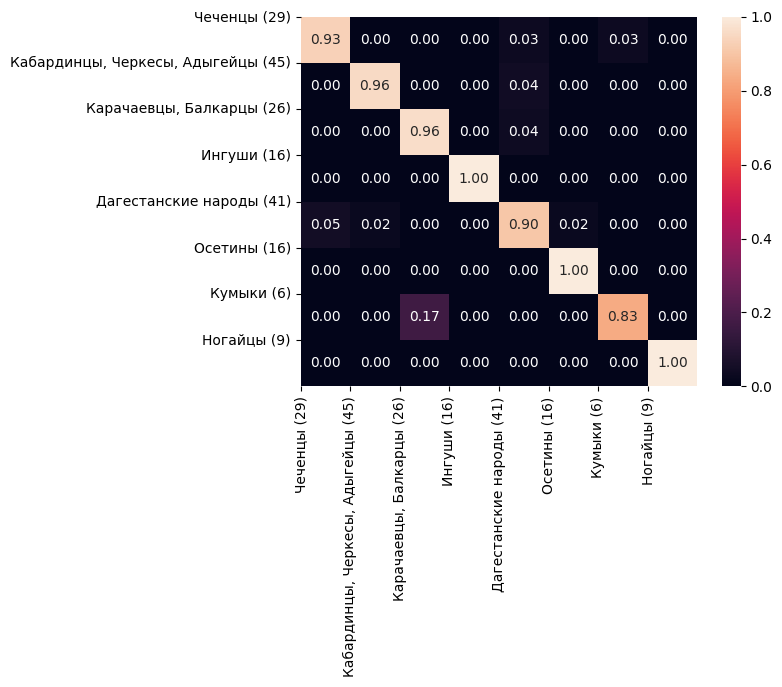

In [34]:
types = ['Чеченцы (29)', 'Кабардинцы, Черкесы, Адыгейцы (45)', 'Карачаевцы, Балкарцы (26)', 'Ингуши (16)', 'Дагестанские народы (41)', 'Осетины (16)', 'Кумыки (6)', 'Ногайцы (9)']

cm = confusion_matrix(target_test, predicted_labels, normalize='true')

plt.clf()
    
px = 1 / plt.rcParams['figure.dpi']

fig, ax = plt.subplots(1, 1)#figsize=(4000 * px, 4000 * px))
sns.heatmap(cm, annot=True, ax=ax, annot_kws={'size': 10}, fmt=".2f")
ax.set_xticks([i for i in range(len(types))])
ax.set_xticklabels([f'{types[i]}' for i in range(0, len(types))])
ax.set_yticks([i for i in range(len(types))])
ax.set_yticklabels([f'{types[i]}' for i in range(0, len(types))])
# fig.suptitle(f"Confusion matrix, F1: {round(f1_score(ground_truth, predicted_labels, average='weighted'), 4)}")
plt.yticks(rotation=0)
plt.xticks(rotation=90) 
plt.savefig(f"nc_tripletloss_grant_ii.png", bbox_inches="tight")
plt.show()

In [288]:
from sklearn.metrics import classification_report
print(classification_report(target_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.96      0.98      0.97        45
           2       1.00      0.96      0.98        26
           3       1.00      1.00      1.00        16
           4       0.97      0.90      0.94        41
           5       0.94      1.00      0.97        16
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         9

    accuracy                           0.96       188
   macro avg       0.96      0.98      0.97       188
weighted avg       0.96      0.96      0.96       188



In [47]:
all_results_2d = TSNE(n_components=2, learning_rate=1, init='random', perplexity=40).fit_transform(all_results)

In [50]:
alpha_mask = [0.2 if i < len(results_train) else 1 for i in range(len(all_results))]

C:\Users\Alex\AppData\Local\Temp\ipykernel_29140\939482645.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', len(types))


<Figure size 640x480 with 0 Axes>

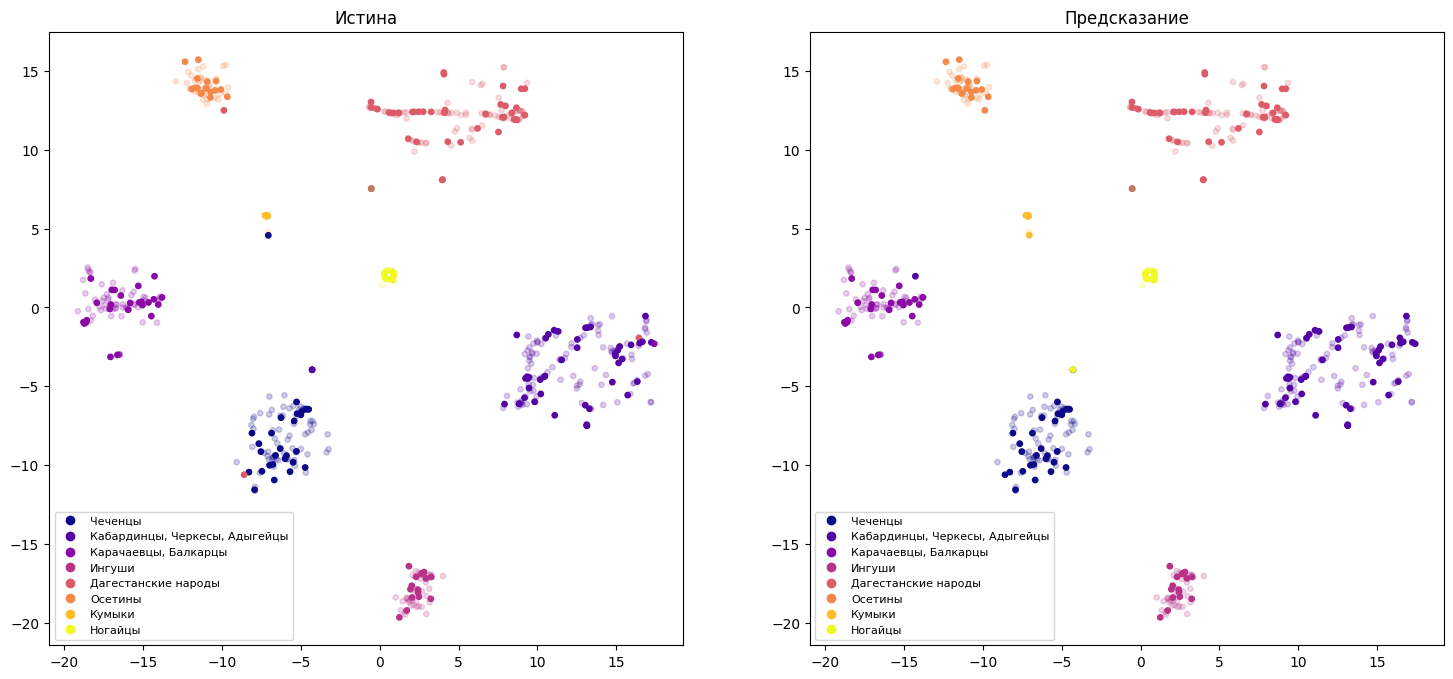

In [52]:
types = ['Чеченцы', 'Кабардинцы, Черкесы, Адыгейцы', 'Карачаевцы, Балкарцы', 'Ингуши', 'Дагестанские народы', 'Осетины', 'Кумыки', 'Ногайцы']


from pylab import *
import matplotlib.pylab as pplt

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

pplt.clf()
fig, (ax1, ax2) = pplt.subplots(1, 2, figsize=(18, 18))
# fig.suptitle('Horizontally stacked subplots')
ax1.set_title('Истина')
ax2.set_title('Предсказание')
ax1.set_aspect(1)
ax2.set_aspect(1)
a1s = ax1.scatter(*all_results_2d.T, c=all_targets, s=15, cmap='plasma', alpha=alpha_mask)
a2s = ax2.scatter(*all_results_2d.T, c=predicted_targets, s=15, cmap='plasma', alpha=alpha_mask)
# ax1.legend(handles=a1s.legend_elements()[0], labels=types, fontsize=8)
# ax2.legend(handles=a2s.legend_elements()[0], labels=types, fontsize=8)

cmap = cm.get_cmap('plasma', len(types))
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
legend_pics = []
for i in range(len(color_list)):
    lp = Line2D([0], [0], label=types[i], color=color_list[i], marker='o', ls="")
    legend_pics.append(lp)
    
ax1.legend(handles=legend_pics, fontsize=8)
ax2.legend(handles=legend_pics, fontsize=8)

plt.savefig(f"nc_clusterization_comparison_grant_ii.png", bbox_inches="tight")
plt.show()

### DBSCAN

In [33]:
clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=2).fit(all_results)
clustering_DBSCAN.labels_

array([ 0,  1,  2,  2,  3,  4,  2,  1,  0,  4,  4,  4,  2,  0,  4,  0,  4,
        0,  4,  0,  1,  4,  5,  0,  1,  6,  3,  7,  6,  2,  0,  0,  2,  0,
        0,  0,  1,  5,  6,  3,  0,  6,  1,  2,  1,  0,  3,  1,  1,  3,  6,
        0,  2,  2,  4,  1,  1,  2,  0,  0,  4,  2,  0,  8,  2,  0,  3,  4,
        4,  3,  6,  2,  1,  4,  0,  3,  4,  2,  3,  0,  4,  3,  0,  2,  5,
        6,  2,  2,  3,  0,  0,  6,  5,  2,  0,  0,  6,  2,  7,  2,  2,  2,
        2,  2,  3,  2,  5,  0,  6,  2,  4,  0,  2,  5,  3,  6,  8,  3,  4,
        1,  5,  3,  4,  0,  0,  3,  3,  7,  2,  1, -1,  3,  0,  2,  6,  0,
        0,  5,  6,  0,  3,  0,  6,  0,  0,  5,  2,  2,  3,  2,  1,  3,  6,
        0,  8,  4,  0,  0,  0,  3,  0,  2,  1,  0,  0,  4,  3,  2,  2,  2,
        6,  3,  2,  4,  2,  2,  4,  4,  2,  0,  4,  1,  0,  4,  4,  3,  3,
        4,  6,  0,  2,  0,  4,  0,  0,  2,  2,  2,  6,  5,  3,  2,  6,  2,
        6,  4,  1,  5,  0,  3,  0,  2,  0,  1,  0,  1,  3,  2,  1,  7,  1,
        2,  6,  3,  3, -1

In [55]:
ars = adjusted_rand_score(all_targets, clustering_DBSCAN.labels_)
vms = v_measure_score(all_targets, clustering_DBSCAN.labels_)
print(ars, vms)

0.9354953206435681 0.9191928672806021


In [68]:
print(f'Num ground truth unique labels: {len(np.unique(all_targets))}')
print(f'Num predicted unique labels: {len(np.unique(clustering_DBSCAN.labels_))}')

all_classes_unique_ids = np.unique(all_targets)
mapping = dict()
for u_id in all_classes_unique_ids:
    selected_pred = (clustering_DBSCAN.labels_ + 1)[all_targets == u_id] # +1 to avoid -1 for np.bincount, -1 became 0
    mapping[u_id] = np.bincount(selected_pred).argmax()

print(mapping)
if 0 in mapping.values():
    print('WARNING!!! Outliers == class!!!')
else:
    mapping = dict((v,k) for k,v in mapping.items())
    if len(mapping) < len(types):
        print('Same label for different classes!!!')
    else:
        mapping[0] = -1
        predicted_labels = []
        for l in (clustering.labels_ + 1):
            if l in mapping.keys():
                predicted_labels.append(mapping[l])
            else:
                predicted_labels.append(l + len(mapping))
                
print(f'Num new predicted unique labels: {len(np.unique(predicted_labels))}')

Num ground truth unique labels: 8
Num predicted unique labels: 10
{0: 4, 1: 1, 2: 5, 3: 2, 4: 3, 5: 7, 6: 8, 7: 6}
Num new predicted unique labels: 10


In [76]:
np.sum(all_targets == predicted_labels) / len(all_targets)

0.9592833876221498

In [74]:
f1_score(all_targets, predicted_labels, average='weighted')

0.971867370073251

In [75]:
f1_score(all_targets, predicted_labels, average='macro')

0.7728029498701816

# Model explainer

In [150]:
! pip install captum

     ---------------------------------------- 1.3/1.3 MB 3.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
from torch_geometric.explain.algorithm import CaptumExplainer
from captum.attr import IntegratedGradients
from torch_geometric.data import Data
from torch_geometric.explain import Explainer, GNNExplainer

In [245]:
def model_forward(edge_mask, data):
    out = model(data)
    return out

In [246]:
ig = IntegratedGradients(model_forward)

In [247]:
data.y.shape

torch.Size([2635])

In [114]:
torch.save(model.state_dict(), 'TAGConv_3l_128h_w_k3_for_Explainer.bin')

In [115]:
class SSGConv_3l_128h_w_a05_k1_Explainer(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_128h_w_a05_k1_Explainer, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, alpha=0.5)
        self.conv2 = SSGConv(128, 128, alpha=0.5)
        self.conv3 = SSGConv(128, int(data.num_classes), alpha=0.5)

    def forward(self, x, edge_index, edge_attr):
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class TAGConv_3l_128h_w_k3_Explainer(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_128h_w_k3_Explainer, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, int(data.num_classes))

    def forward(self, x, edge_index, edge_attr):
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x

In [116]:
model = TAGConv_3l_128h_w_k3_Explainer()

In [117]:
model.load_state_dict(torch.load('TAGConv_3l_128h_w_k3_for_Explainer.bin'))
model.eval()

TAGConv_3l_128h_w_k3_Explainer(
  (conv1): TAGConv(8, 128, K=3)
  (conv2): TAGConv(128, 128, K=3)
  (conv3): TAGConv(128, 8, K=3)
)

In [118]:
data = data.to('cuda')
model = model.to('cuda')

In [119]:
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='log_probs',  # Model returns log probabilities.
    ),
)

kwargs = {'edge_attr': data.weight.float()}
# Generate explanation for the node at index `10`:
explanation = explainer(x=data.x.float(), edge_index=data.edge_index, index=10, **kwargs)
print(explanation.edge_mask)
print(explanation.node_mask)

tensor([0.1504, 0.1815, 0.1460,  ..., 0.1540, 0.1529, 0.0000], device='cuda:0')
tensor([[0.1513, 0.1583, 0.0000,  ..., 0.1490, 0.0000, 0.0000],
        [0.2500, 0.0000, 0.1844,  ..., 0.1724, 0.0000, 0.0000],
        [0.1409, 0.0000, 0.0000,  ..., 0.0000, 0.1428, 0.0000],
        ...,
        [0.2490, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')


In [197]:
len(np.unique(data.edge_index.detach().cpu().numpy()))

2635

In [198]:
data.x.shape

torch.Size([2635, 5])

In [186]:
all_data_analysis_to = {i:[] for i in range(torch.max(data.edge_index))}
all_data_analysis_from = {i:[] for i in range(torch.max(data.edge_index))}

em = explanation.edge_mask
em = em - em.min()
em = em / em.max()

for i in range(len(all_data_analysis)):
    mask_to = data.edge_index[1, :] == i # direction TO node under analysis
    if not (True in mask_to.detach().cpu().numpy()):
        print('WARNING')
    deg_to = torch.sum(mask_to) # check later
    att_to = torch.sum(em[mask_to])
    
    all_data_analysis_to[i].append(deg_to.detach().cpu().item())
    all_data_analysis_to[i].append(att_to.detach().cpu().item())
    
    mask_from = data.edge_index[0, :] == i # direction TO node under analysis
    deg_from = torch.sum(mask_from) # check later
    att_from = torch.sum(em[mask_from])
    
    all_data_analysis_from[i].append(deg_from.detach().cpu().item())
    all_data_analysis_from[i].append(att_from.detach().cpu().item())

WARNING
WARNING
WARNING
WARNING
WARNING
WARNING
WARNING
WARNING
WARNING
WARNING
WARNING


(0.9598884073829815, 1.0109267116599752e-235)
(0.9675277174531417, 8.95370177077688e-255)


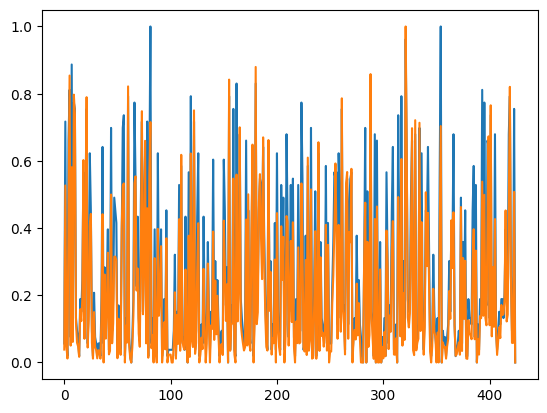

In [178]:
from scipy.stats import pearsonr

all_data_analysis_to_array = np.array(list(all_data_analysis_to.values()))
all_data_analysis_from_array = np.array(list(all_data_analysis_from.values()))

print(pearsonr(all_data_analysis_to_array[:, 0], all_data_analysis_to_array[:, 1]))
print(pearsonr(all_data_analysis_from_array[:, 0], all_data_analysis_from_array[:, 1]))

all_data_analysis_to_array[:, 0] = all_data_analysis_to_array[:, 0] - all_data_analysis_to_array[:, 0].min()
all_data_analysis_to_array[:, 0] = all_data_analysis_to_array[:, 0] / all_data_analysis_to_array[:, 0].max()

all_data_analysis_to_array[:, 1] = all_data_analysis_to_array[:, 1] - all_data_analysis_to_array[:, 1].min()
all_data_analysis_to_array[:, 1] = all_data_analysis_to_array[:, 1] / all_data_analysis_to_array[:, 1].max()

plt.clf()
plt.plot(all_data_analysis_to_array)
plt.show()

In [179]:
all_data_analysis_to_array[:, 1] > all_data_analysis_to_array[:, 0]

array([False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [172]:
np.array(list(all_data_analysis_to.values()))

array([[ 3.        ,  0.48462987],
       [38.        ,  6.64917278],
       [ 4.        ,  0.60449398],
       [ 1.        ,  0.14895606],
       [35.        ,  5.41808891],
       [43.        , 10.77825546],
       [ 4.        ,  0.63310778],
       [47.        ,  7.3359499 ],
       [ 5.        ,  0.77178454],
       [41.        , 10.06155872],
       [40.        ,  9.32278252],
       [ 7.        ,  1.49711823],
       [ 5.        ,  0.74184102],
       [ 4.        ,  0.60476577],
       [ 1.        ,  0.21311516],
       [10.        ,  1.99909699],
       [ 8.        ,  1.55310452],
       [13.        ,  2.40612602],
       [30.        ,  7.60414028],
       [ 6.        ,  0.89006239],
       [27.        ,  4.39569902],
       [40.        ,  9.96658707],
       [ 3.        ,  0.56109333],
       [10.        ,  1.59410727],
       [33.        ,  5.13226891],
       [24.        ,  5.58172464],
       [ 5.        ,  0.74321109],
       [ 1.        ,  0.14397751],
       [11.        ,

In [135]:
data.x.shape

torch.Size([426, 8])

In [126]:
explanation.edge_mask.shape

torch.Size([5886])

In [137]:
print(torch.max(explanation.edge_mask))

tensor(0.3075, device='cuda:0')


In [125]:
explanation.node_mask.shape

torch.Size([426, 8])

In [131]:
explanation.edge_index.shape

torch.Size([2, 5886])

In [132]:
explanation.edge_index

tensor([[  0,   0,   0,  ..., 423, 423, 425],
        [ 81, 315,  33,  ..., 126,  48, 127]], device='cuda:0')

In [141]:
data.y[4]

tensor(0, device='cuda:0')

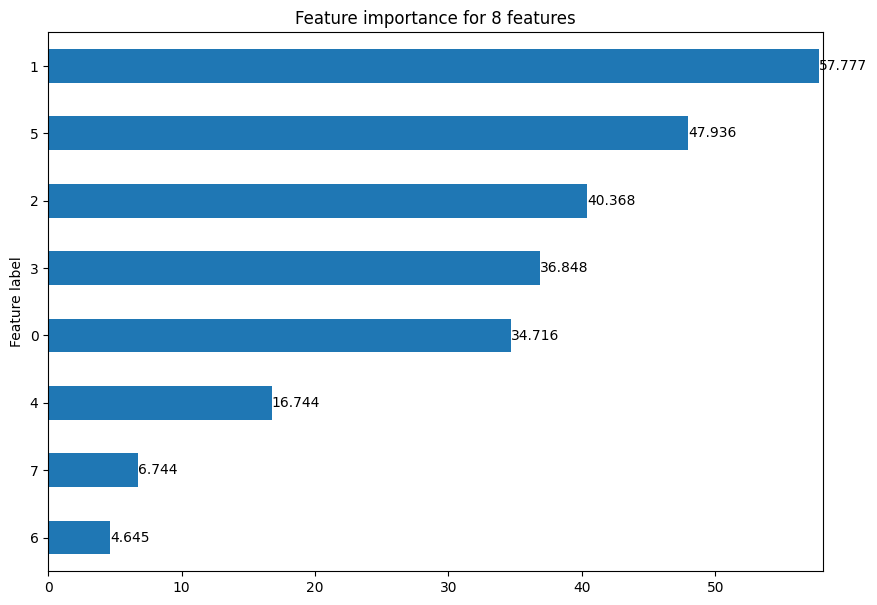

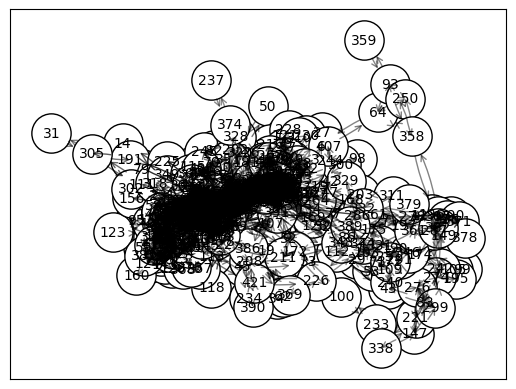

In [130]:
explanation.visualize_feature_importance()

# explanation.visualize_graph()

In [136]:
explanation.get_explanation_subgraph()

Explanation(node_mask=[388, 8], edge_mask=[5842], prediction=[388, 8], target=[388], index=10, x=[388, 8], edge_index=[2, 5842], edge_attr=[5842])

In [121]:
def offset(d, pos, dist = .1):
    for (u,v),obj in d.items():
        par = dist*(pos[v] - pos[u])
        dx,dy = par[1],-par[0]
        x,y = obj.get_position()
        const = 0.4
        obj.set_position((x+const*dx,y+const*dy))

In [148]:
from math import sqrt
def _visualize_graph_via_networkx(
    edge_index,
    edge_weight,
    index,
    path = None,
):
    import matplotlib.pyplot as plt
    import networkx as nx
    
    mask_array = []
    for i in range(edge_weight.shape[0]):
        if edge_index[0, i] == index or edge_index[1, i] == index:
            mask_array.append(True)
        else:
            mask_array.append(False)
            
    edge_index = edge_index[:, mask_array]
    edge_weight = edge_weight[mask_array]
    
    print(edge_weight)
    print(edge_index)
    
    print(edge_index.shape)
    print(edge_weight.shape)

    g = nx.DiGraph()
    node_size = 800

    for node in edge_index.view(-1).unique().tolist():
        g.add_node(node)

    for (src, dst), w in zip(edge_index.t().tolist(), edge_weight.tolist()):
        g.add_edge(src, dst, alpha=w, weight=round(w, 2))
        
    print(g.nodes)

    px = 1 / plt.rcParams['figure.dpi']

    fig, ax = plt.subplots(1, 1, figsize=(4000 * px, 5000 * px))
        
#     ax = plt.gca()
    pos = nx.spring_layout(g)
#     for src, dst, data in g.edges(data=True):
#         ax.annotate(
#             '',
#             xy=pos[src],
#             xytext=pos[dst],
#             arrowprops=dict(
#                 arrowstyle="->",
#                 alpha=data['alpha'],
#                 shrinkA=sqrt(node_size) / 2.0,
#                 shrinkB=sqrt(node_size) / 2.0,
#                 connectionstyle='arc3,rad=0.2',
#             ),
#         )

    for u,v,d in g.edges(data=True):
        d['weight'] = round(d['alpha'], 2)
        
    _,weights = zip(*nx.get_edge_attributes(g,'weight').items())

#     nodes = nx.draw_networkx_nodes(g, pos, node_size=node_size, node_color='orange', margins=0.1)
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx(g, pos, with_labels=True, edgelist=g.edges, edge_color=weights, width=1.0, connectionstyle = 'arc3,rad=0.1', node_color='orange', edge_cmap=plt.cm.Greys, node_size=600,  font_size=10)
    d = nx.draw_networkx_edge_labels(g,pos,edge_labels=labels, label_pos=0.5)
    offset(d,pos)
#     nodes.set_edgecolor('black')
#     nx.draw_networkx_labels(g, pos, font_size=10)

    if path is not None:
        plt.savefig(path)
    else:
        plt.show()

    plt.close()

In [149]:
def visualize_graph(
    edge_index,
    index,
    edge_weight = None,
    path = None,
    backend = None,
):
    
    print('WEIGHT!', edge_weight)
    if edge_weight is not None:  # Normalize edge weights.
        edge_weight = edge_weight - edge_weight.min()
        edge_weight = edge_weight / edge_weight.max()

    if edge_weight is not None:  # Discard any edges with zero edge weight:
        mask = edge_weight > 1e-7
        edge_index = edge_index[:, mask]
        edge_weight = edge_weight[mask]

    if edge_weight is None:
        edge_weight = torch.ones(edge_index.size(1))

    if backend is None:
        backend = 'graphviz' if has_graphviz() else 'networkx'

    if backend.lower() == 'networkx':
        return _visualize_graph_via_networkx(edge_index, edge_weight, index, path)
    elif backend.lower() == 'graphviz':
        return _visualize_graph_via_graphviz(edge_index, edge_weight, path)

    raise ValueError(f"Expected graph drawing backend to be in "
                     f"{BACKENDS} (got '{backend}')")

In [150]:
edge_mask = explanation.get('edge_mask')
if edge_mask is None:
    raise ValueError(f"The attribute 'edge_mask' is not available "
                     f"in '{explanation.__class__.__name__}' "
                     f"(got {explanation.available_explanations})")
visualize_graph(explanation.edge_index, 4, edge_mask, 'graph_explanation.png', 'networkx')

WEIGHT! tensor([0.1504, 0.1815, 0.1460,  ..., 0.1540, 0.1529, 0.0000], device='cuda:0')
tensor([0.5234, 0.5259, 0.5556, 0.4857, 0.4768, 0.6103, 0.6129, 0.4776, 0.5211,
        0.4771, 0.5064, 0.5136, 0.5127, 0.5634, 0.5419, 0.6475, 0.5270, 0.4705,
        0.6198, 0.5042, 0.5470, 0.4691, 0.5021, 0.5464, 0.4686, 0.5812, 0.5383,
        0.4595, 0.5762, 0.4979, 0.5096, 0.4845, 0.5372, 0.5292, 0.5372, 0.4945,
        0.5152, 0.4537, 0.4802, 0.5373, 0.5365, 0.4659, 0.5074, 0.4842, 0.5228,
        0.4819, 0.5314, 0.5534, 0.4936, 0.4825, 0.4996, 0.5423, 0.4899, 0.5395,
        0.4733, 0.5393, 0.5212, 0.4797, 0.4699, 0.5064, 0.5356, 0.4862, 0.5164,
        0.4642, 0.4814, 0.4809, 0.5006, 0.4656, 0.5237, 0.5334],
       device='cuda:0')
tensor([[  1,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
           4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
           4,   4,   4,   4,   4,   4,   4,   4,  24,  48,  78,  81,  88, 119,
         125, 131, 159, 16

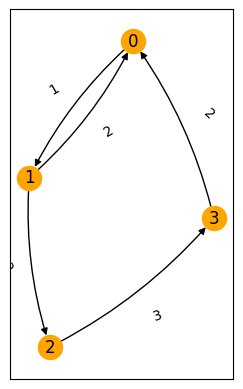

In [187]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_nodes_from(range(4))

G.add_edge(0,1,edge_count = 1)
G.add_edge(1,0,edge_count = 2)
G.add_edge(1,2,edge_count = 2)
G.add_edge(2,3,edge_count = 3)
G.add_edge(3,0,edge_count = 2)

def offset(d, pos, dist = .1):
    for (u,v),obj in d.items():
        par = dist*(pos[v] - pos[u])
        dx,dy = par[1],-par[0]
        x,y = obj.get_position()
        const = 2
        obj.set_position((x+const*dx,y+const*dy))

edge_labels = nx.get_edge_attributes(G,'edge_count')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = pos, with_labels=True, connectionstyle = 'arc3,rad=0.05', node_color = 'orange')
d = nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels)
offset(d,pos)
plt.gca().set_aspect('equal')
plt.show()

# Testing TripletLoss (old approach)

In [58]:
model.eval()

TAGConv_3l_128h_w_k3_l128(
  (conv1): TAGConv(8, 128, K=3)
  (conv2): TAGConv(128, 128, K=3)
  (conv3): TAGConv(128, 128, K=3)
)

In [59]:
data = data.to(device)

In [60]:
target_train = np.zeros((len(data.y), len(types)))
for i in range(len(data.y)):
    target_train[i, data.y[i]] = 1
    
results_train = model(data).cpu().detach().numpy()

In [61]:
target_test = []
for i in range(len(test_graphs)):
    tmparray = np.zeros(len(types))
    tmparray[test_graphs[i].y[-1]] = 1
    target_test.append(tmparray)
    
target_test = np.array(target_test)

In [62]:
results_test = []
for i in range(len(test_graphs)):
    print(f'{i} / {len(test_graphs)} node')
    results_test.append(model(test_graphs[i].to(device))[-1].cpu().detach().numpy())
    test_graphs[i].cpu()
    
results_test = np.array(results_test)

0 / 188 node
1 / 188 node
2 / 188 node
3 / 188 node
4 / 188 node
5 / 188 node
6 / 188 node
7 / 188 node
8 / 188 node
9 / 188 node
10 / 188 node
11 / 188 node
12 / 188 node
13 / 188 node
14 / 188 node
15 / 188 node
16 / 188 node
17 / 188 node
18 / 188 node
19 / 188 node
20 / 188 node
21 / 188 node
22 / 188 node
23 / 188 node
24 / 188 node
25 / 188 node
26 / 188 node
27 / 188 node
28 / 188 node
29 / 188 node
30 / 188 node
31 / 188 node
32 / 188 node
33 / 188 node
34 / 188 node
35 / 188 node
36 / 188 node
37 / 188 node
38 / 188 node
39 / 188 node
40 / 188 node
41 / 188 node
42 / 188 node
43 / 188 node
44 / 188 node
45 / 188 node
46 / 188 node
47 / 188 node
48 / 188 node
49 / 188 node
50 / 188 node
51 / 188 node
52 / 188 node
53 / 188 node
54 / 188 node
55 / 188 node
56 / 188 node
57 / 188 node
58 / 188 node
59 / 188 node
60 / 188 node
61 / 188 node
62 / 188 node
63 / 188 node
64 / 188 node
65 / 188 node
66 / 188 node
67 / 188 node
68 / 188 node
69 / 188 node
70 / 188 node
71 / 188 node
72

[[ 0.09257422 -0.00573273  0.04702277 ...  0.06505466 -0.01043144
   0.02985239]
 [ 0.04141474  0.03202569 -0.00601608 ... -0.07559782 -0.01515797
   0.0363787 ]
 [ 0.10974932 -0.16554883 -0.07763545 ...  0.07867602  0.12493781
  -0.03591006]
 ...
 [-0.06076564  0.07258675  0.10717341 ...  0.00209325  0.01275725
  -0.05041738]
 [-0.03978806 -0.12614445  0.05379133 ...  0.01919    -0.03401702
   0.0602495 ]
 [-0.09377437 -0.03540614  0.15231177 ... -0.0160213   0.02073011
  -0.12454766]]
Distance between clusters 0 and 1 = 1.5090577714729816
Distance between clusters 0 and 2 = 1.3727789766796705
Distance between clusters 0 and 3 = 1.491275982733925
Distance between clusters 0 and 4 = 1.1749894259139464
Distance between clusters 0 and 5 = 1.4413290067539641
Distance between clusters 0 and 6 = 1.3118265488953624
Distance between clusters 0 and 7 = 1.4164778304476322
Distance between clusters 1 and 2 = 1.652293187136543
Distance between clusters 1 and 3 = 0.9380128026397622
Distance betwee

<Figure size 640x480 with 0 Axes>

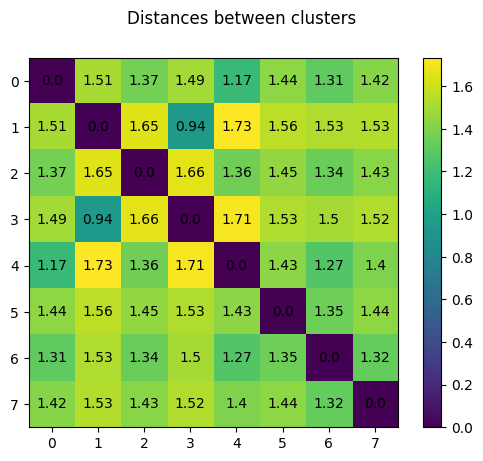

0
0.021884432
1
0.004432561
2
0.022827175
3
0.019013211
4
0.0051648626
5
0.02305474
6
0.10172812
7
0.0038121485
8
0.0101831425
9
0.019858658
10
0.0018206231
11
0.0028105553
12
0.027107166
13
0.018883647
14
0.0074602123
15
0.0043347017
16
0.0024291875
17
0.0011652743
18
0.018935814
19
0.00445794
20
0.0013589975
21
0.0077392617
22
0.006882584
23
0.016546104
24
0.036035486
25
0.008109367
26
0.045930315
27
0.11513009
28
0.05181504
29
GT: 1 Pred: 5
0.7252631
[5 5 5 5 5] Mean class:  5.0
5.0
[[5 5]]
30
0.106060885
31
0.0035721238
32
0.009516483
33
GT: 0 Pred: 6
0.052106284
[6 6 6 6 6] Mean class:  6.0
6.0
[[6 5]]
34
GT: 7 Pred: 1
0.115383595
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
35
0.10470908
36
0.38906607
37
0.021387348
38
0.005237002
39
GT: 4 Pred: 1
0.62070376
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
40
0.00031649697
41
0.008246303
42
0.10132439
43
0.0086602075
44
0.01442595
45
0.0046304446
46
0.032990016
47
0.035942324
48
0.0025723635
49
0.033308156
50
0.0036459318
51
0.004186478
52
0

<Figure size 640x480 with 0 Axes>

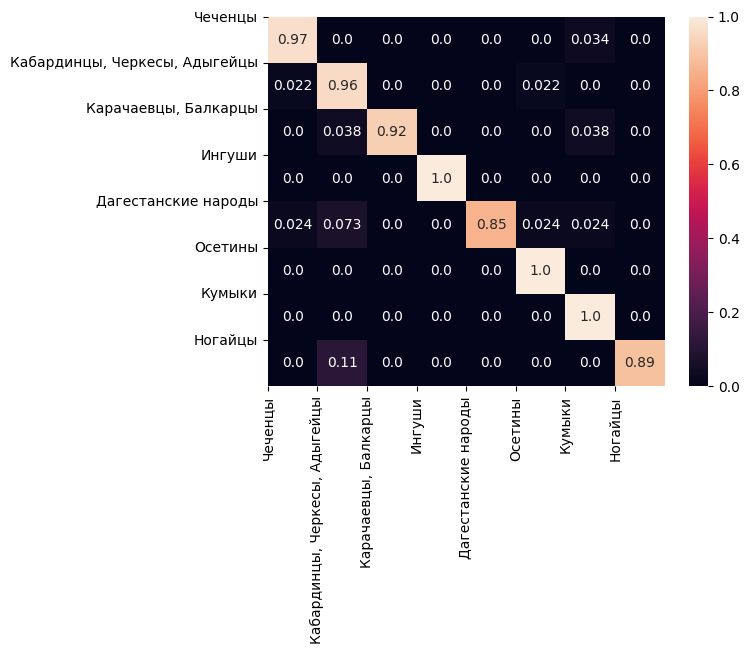

Accuracy: 179/188, exactly: 0.9521
MMD:  0.8044832


In [63]:
types = ['Чеченцы', 'Кабардинцы, Черкесы, Адыгейцы', 'Карачаевцы, Балкарцы', 'Ингуши', 'Дагестанские народы', 'Осетины', 'Кумыки', 'Ногайцы']
# types = ['Мордвины (21)', 'Белорусы (139)', 'Украинцы (128)', 'Южные-русские (654)', 'Северные-русские (190)']


# axis1 = 1
# axis2 = 120

# px = 1 / plt.rcParams['figure.dpi']
# plt.clf()
# fig, ax = plt.subplots(6, 2, figsize=(6400 * px, 6400 * px))

# tmp_train = []
# tmp_test = []
# for i in range(7):
#     for j, vec in enumerate(results_train):
#         if np.argmax(target_train[j]) == i:
#             tmp_train.append(vec)
#     tmp_train = np.array(tmp_train)
#     print(tmp_train.shape)
#     projection_train = np.stack((tmp_train[:, axis1], tmp_train[:, axis2]), axis=-1)
#     dots1 = ax[i % 6][i // 6].scatter(projection_train[:, 0], projection_train[:, 1], s=10, label='Train data')
#     tmp_train = []

#     for j, vec in enumerate(results_test):
#         if np.argmax(target_test[j]) == i:
#             tmp_test.append(vec)
#     tmp_test = np.array(tmp_test)
#     projection_test = np.stack((tmp_test[:, axis1], tmp_test[:, axis2]), axis=-1)
#     dots2 = ax[i % 6][i // 6].scatter(projection_test[:, 0], projection_test[:, 1], s=10, label='Test data')
#     tmp_test = []

#     ax[i % 6][i // 6].legend(handles=[dots1, dots2], fontsize=40)

# for i in range(7):
#     ax[i % 6][i // 6].set_title(f"Class {i + 1}", fontsize=40)

# fig.suptitle(f"Projection for axes {axis1} and {axis2}", fontsize=80)
# fig.savefig("projection.png")

# # projection = np.stack((results_train[:, 128], results_train[:, 988]), axis=-1)
# # print(projection.shape)
# # plt.clf()
# # plt.scatter(projection[:, 0], projection[:, 1], s=0.1)
# # plt.show()

clusters = np.zeros((len(types), 128))
tmp = []
for i in range(len(types)):
    for j, vec in enumerate(results_train):
        if np.argmax(target_train[j].squeeze()) == i:
            tmp.append(vec)
    tmp = np.array(tmp)
    clusters[i, :] = tmp.mean(axis=0)
    tmp = []

print(clusters)

dist = np.zeros((len(types), len(types)))
for i in range(11):
    for j in range(i + 1, len(types)):
        print(f"Distance between clusters {i} and {j} = {np.linalg.norm(clusters[i] - clusters[j])}")
        dist[i, j] = np.linalg.norm(clusters[i] - clusters[j])
        dist[j, i] = np.linalg.norm(clusters[i] - clusters[j])

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(dist)
for (j, i), label in np.ndenumerate(dist):
    ax.text(i, j, round(label, 2), ha='center', va='center')
fig.colorbar(img)
fig.suptitle("Distances between clusters")
plt.show()
# plt.savefig("cluster_distances.png")

# tsne = TSNE(learning_rate=10, perplexity=10)
# embedded = tsne.fit_transform(results_train)
# print('New Shape of X: ', embedded.shape)
# print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
# print('No. of iterations: ', tsne.n_iter_)
#
# plt.clf()
# fig, ax = plt.subplots(5, 2, figsize=(6400 * px, 6400 * px))
# for i in range(10):
#     for j, vec in enumerate(embedded):
#         if np.argmax(target_train[j].squeeze()) == i:
#             tmp_train.append(vec)
#     tmp_train = np.array(tmp_train)
#     dots = ax[i % 5][i // 5].scatter(tmp_train[:, 0], tmp_train[:, 1], s=10, label=f'Class {i}')
#     tmp_train = []
#     ax[i % 5][i // 5].legend(handles=[dots], fontsize=40)
#
# plt.savefig("New_clusters.png")

# print(target_test[0])
mmd = 0
ground_truth = []
predicted_labels = []
counter = 0
for i in range(len(results_test)):
    # for i, vec in enumerate(results_test):
    # if i % 100 == 0:
    print(i)
    vec = results_test[i]
    real = target_test[i]
    norm_arg = np.argmin(np.linalg.norm(vec - results_train, axis=1))
    # print(np.min(np.linalg.norm(vec - results_train, axis=1)))
    # norm_arg = np.argmin(np.linalg.norm(vec - clusters, axis=1))
    answer = target_train[norm_arg]
    if np.argmax(real.squeeze()) != np.argmax(answer.squeeze()):
        print(f'GT: {np.argmax(real.squeeze())}', f'Pred: {np.argmax(answer.squeeze())}')
        flagg = True
    else:
        flagg = False
    md = np.sort(np.linalg.norm(vec - results_train, axis=1))[0]
    print(md)
    class_list = np.argmax(target_train[np.argsort(np.linalg.norm(vec - results_train, axis=1))[:5]],
                           axis=-1).squeeze()
    if md > mmd:
        mmd = md
    if flagg:
        print(class_list, "Mean class: ", np.mean(class_list))
        print(np.round(np.mean(class_list)))
    # if np.abs(np.argmax(real.squeeze()) - np.argmax(answer.squeeze())) <= 1:
    ground_truth.append(np.argmax(real.squeeze()))
#     predicted_labels.append(int(np.round(np.mean(class_list))))

    uniq, cnts = np.unique(class_list, return_counts=True)
    u_l = np.asarray((uniq, cnts)).T
    u_l_as = np.argsort(u_l[:, 1])
    if flagg:
        print(u_l[u_l_as[::-1]])
    predicted_labels.append(u_l[u_l_as[::-1]][0, 0])
    
    if np.abs(np.argmax(real.squeeze()) - np.round(np.mean(class_list))) <= 1:
        counter += 1
        
print(classification_report(ground_truth, predicted_labels))
cm = confusion_matrix(ground_truth, predicted_labels, normalize='true')

final_f1_weighted_score = f1_score(ground_truth, predicted_labels, average='weighted')
final_f1_macro_score = f1_score(ground_truth, predicted_labels, average='macro')

print(f"Final f1 score weighted: {final_f1_weighted_score}")
print(f"Final f1 score macro: {final_f1_macro_score}")

plt.clf()
    
px = 1 / plt.rcParams['figure.dpi']

fig, ax = plt.subplots(1, 1)#figsize=(4000 * px, 4000 * px))
sns.heatmap(cm, annot=True, ax=ax, annot_kws={'size': 10}, fmt='.2')
ax.set_xticks([i for i in range(len(types))])
ax.set_xticklabels([f'{types[i]}' for i in range(0, len(types))])
ax.set_yticks([i for i in range(len(types))])
ax.set_yticklabels([f'{types[i]}' for i in range(0, len(types))])
# fig.suptitle(f"Confusion matrix, F1: {round(f1_score(ground_truth, predicted_labels, average='weighted'), 4)}")
plt.yticks(rotation=0)
plt.xticks(rotation=90) 
plt.savefig(f"cr_tripletloss_grant_ii.png", bbox_inches="tight")
plt.show()

print(f"Accuracy: {counter}/{len(results_test)}, exactly: {round(counter / len(results_test), 4)}")
# norm_arg = np.argmin(np.linalg.norm(results_test[0] - results_train, axis=1))
# print(target_train[norm_arg])
print('MMD: ', mmd)

# Making clusters (new)

In [97]:
all_results = np.concatenate([results_train, results_test], axis=0)
all_targets = np.argmax(np.concatenate([target_train, target_test], axis=0), axis=1)
all_predicted = np.concatenate([np.argmax(target_train, axis=1), predicted_labels], axis=0)

In [98]:
alpha_mask = [0.2 if i < len(results_train) else 1 for i in range(len(all_results))]
np.array(alpha_mask)

array([0.2, 0.2, 0.2, ..., 1. , 1. , 1. ])

In [41]:
predicted_labels

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 2,
 1,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 2,
 4,
 3,
 3,
 3,
 4,
 1,
 3,
 4,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 3,
 1,
 3,
 1,
 3,
 4,
 2,
 3,
 3,
 1,
 3,
 1,
 2,
 3,
 1,
 3,
 3,
 2,
 4,
 4,
 4,
 3,
 2,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 3,
 2,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 2,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 1,
 3,
 4,
 2,
 1,
 1,
 3,
 1,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 2,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 4,
 3,
 4,
 1,
 3,
 3,
 4,
 3,
 2,
 3,
 3,
 4,
 3,
 3,
 1,
 4,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 1,
 3,
 3,
 3,
 4,
 1,
 2,
 3,
 1,
 3,
 2,
 4,
 3,


In [99]:
all_results_2d = TSNE(n_components=2, learning_rate=1, init='random', perplexity=40).fit_transform(all_results)

In [40]:
import matplotlib
matplotlib.__version__

'3.7.2'

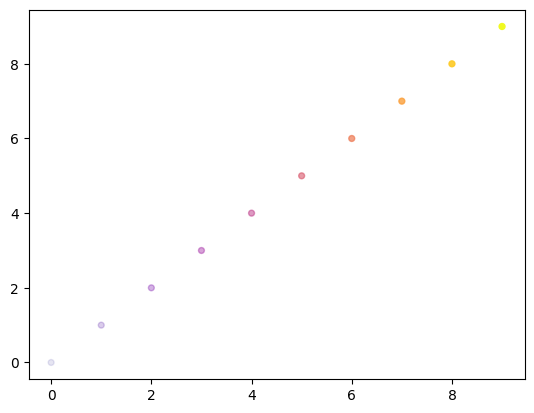

In [49]:
import numpy as np
import matplotlib.pylab as pplt

x = np.arange(10)
y = np.arange(10)

alphas = np.linspace(0.1, 1, 10)

fig, ax = pplt.subplots(1, 1)
ax.scatter(x, y, c=np.arange(10), s=18, cmap='plasma', alpha=alphas)
pplt.show()

C:\Users\Alex\AppData\Local\Temp\ipykernel_23456\1233063440.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', len(types))


<Figure size 640x480 with 0 Axes>

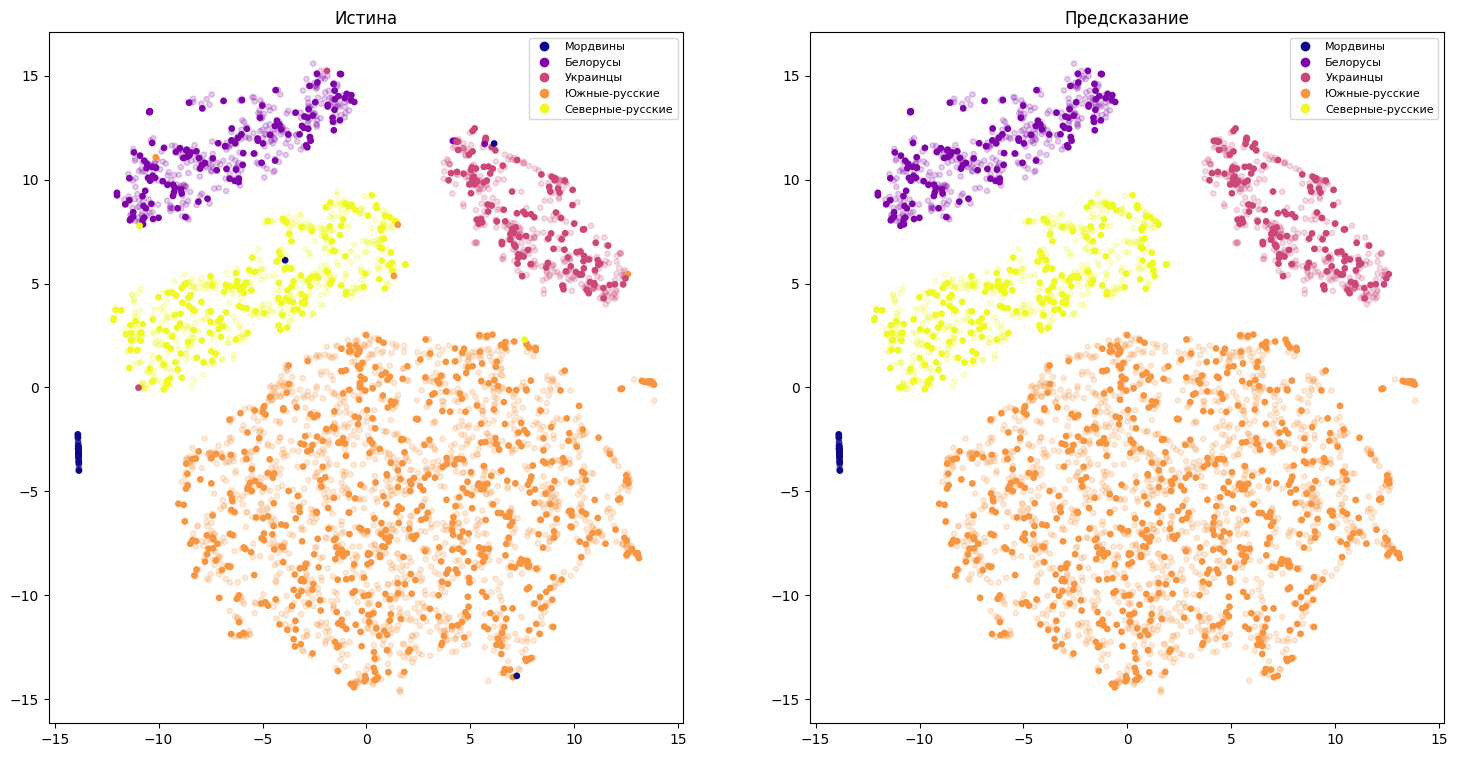

In [101]:
# check why it is clustering so good but prediction has an errors (done)

from pylab import *

types = ['Мордвины', 'Белорусы', 'Украинцы', 'Южные-русские', 'Северные-русские']

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

pplt.clf()
fig, (ax1, ax2) = pplt.subplots(1, 2, figsize=(18, 18))
# fig.suptitle('Horizontally stacked subplots')
ax1.set_title('Истина')
ax2.set_title('Предсказание')
ax1.set_aspect(1)
ax2.set_aspect(1)
a1s = ax1.scatter(*all_results_2d.T, c=all_targets, s=15, cmap='plasma', alpha=alpha_mask)
a2s = ax2.scatter(*all_results_2d.T, c=all_predicted, s=15, cmap='plasma', alpha=alpha_mask)
# ax1.legend(handles=a1s.legend_elements()[0], labels=types, fontsize=8)
# ax2.legend(handles=a2s.legend_elements()[0], labels=types, fontsize=8)

cmap = cm.get_cmap('plasma', len(types))
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
legend_pics = []
for i in range(len(color_list)):
    lp = Line2D([0], [0], label=types[i], color=color_list[i], marker='o', ls="")
    legend_pics.append(lp)
    
ax1.legend(handles=legend_pics, fontsize=8)
ax2.legend(handles=legend_pics, fontsize=8)

pplt.savefig(f"cr_clusterization_comparison_grant_ii.png", bbox_inches="tight")
pplt.show()

## Partially clusterization

In [83]:
partial_idx = 97
all_results_partial = np.concatenate([results_train, np.expand_dims(results_test[partial_idx], axis=0)], axis=0)
all_targets_partial = np.argmax(np.concatenate([target_train, np.expand_dims(target_test[partial_idx], axis=0)], axis=0), axis=1)
all_predicted_partial = np.concatenate([np.argmax(target_train, axis=1), np.expand_dims(predicted_labels[partial_idx], axis=0)], axis=0)

In [84]:
all_results_2d_partial = TSNE(n_components=2, learning_rate=1, init='random', perplexity=40).fit_transform(all_results_partial)

In [92]:
alpha_mask_partial = [0.01 if i < len(results_train) else 1 for i in range(len(all_results_partial))]

C:\Users\Alex\AppData\Local\Temp\ipykernel_23456\3454995517.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', len(types))


<Figure size 640x480 with 0 Axes>

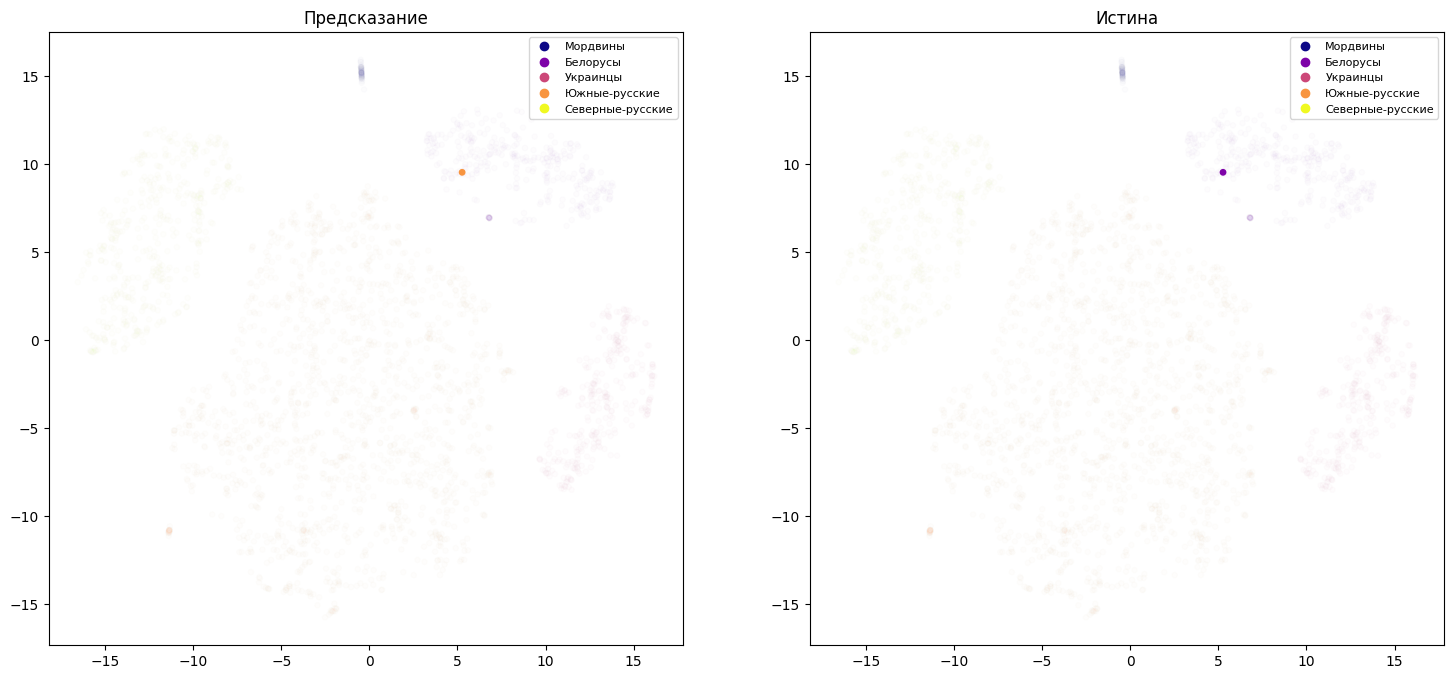

In [93]:
# check why it is clustering so good but prediction has an errors
from pylab import *

types = ['Мордвины', 'Белорусы', 'Украинцы', 'Южные-русские', 'Северные-русские']

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

pplt.clf()
fig, (ax1, ax2) = pplt.subplots(1, 2, figsize=(18, 18))
# fig.suptitle('Horizontally stacked subplots')
ax1.set_title('Предсказание')
ax2.set_title('Истина')
ax1.set_aspect(1)
ax2.set_aspect(1)
a1s = ax1.scatter(*all_results_2d_partial.T, c=all_targets_partial, s=15, cmap='plasma', alpha=alpha_mask_partial)
a2s = ax2.scatter(*all_results_2d_partial.T, c=all_predicted_partial, s=15, cmap='plasma', alpha=alpha_mask_partial)
# ax1.legend(handles=a1s.legend_elements()[0], labels=types, fontsize=8)
# ax2.legend(handles=a2s.legend_elements()[0], labels=types, fontsize=8)

cmap = cm.get_cmap('plasma', len(types))
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
legend_pics = []
for i in range(len(color_list)):
    lp = Line2D([0], [0], label=types[i], color=color_list[i], marker='o', ls="")
    legend_pics.append(lp)
    
ax1.legend(handles=legend_pics, fontsize=8)
ax2.legend(handles=legend_pics, fontsize=8)

# pplt.savefig(f"cr_clusterization_comparison_grant_ii.png", bbox_inches="tight")
pplt.show()

[<matplotlib.collections.PathCollection object at 0x00000198E042E1C0>] ['Original Data']


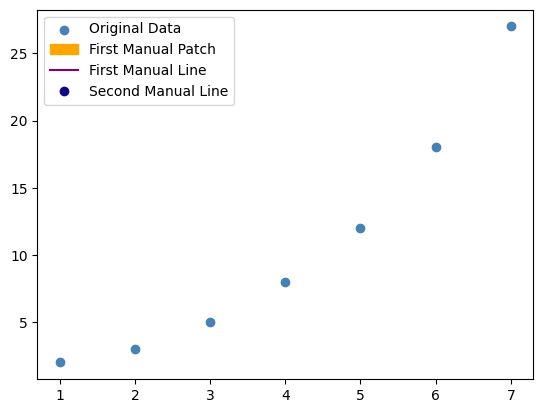

In [75]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

#define data to plot
x = [1, 2, 3, 4, 5, 6, 7]
y = [2, 3, 5, 8, 12, 18, 27]

#create scatter plot of x vs. y
plt.scatter(x, y, label='Original Data', color='steelblue')

#define handles and labels that will get added to legend
handles, labels = plt.gca().get_legend_handles_labels()

print(handles, labels)

#define patches and lines to add to legend
patch1 = mpatches.Patch(color='orange', label='First Manual Patch')
patch2 = mpatches.Patch(color='orange', label='First Manual Patch')   
line1 = Line2D([0], [0], label='First Manual Line', color='purple')
line2 = Line2D([0], [0], label='Second Manual Line', color='#0d0887', marker='o', ls="")

#add handles
handles.extend([patch1, line1, line2])

#add legend
plt.legend(handles=handles)

#display plot
plt.show()

In [74]:
from pylab import *

cmap = cm.get_cmap('seismic', 5)  # matplotlib color palette name, n colors
for i in range(cmap.N):
    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

cmap = cm.get_cmap('plasma', 4)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
print(color_list)

#00004c
#0000ff
#ffffff
#ff0000
#800000
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


C:\Users\Alex\AppData\Local\Temp\ipykernel_23456\1362246951.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('seismic', 5)  # matplotlib color palette name, n colors
C:\Users\Alex\AppData\Local\Temp\ipykernel_23456\1362246951.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', 4)


In [70]:
a = {tuple:'hello'}
a[tuple]

'hello'

# Making clusters (old)

In [472]:
from sklearn.manifold import TSNE

def evaluation(model, data, test_graphs):
    model.eval()

    embeddings_train = model(data.to(device)).cpu().detach().numpy()
    
    print(embeddings_train.shape)
    
    embeddings_test = []
    
    for k in range(len(test_graphs)):
        embeddings_test.append(model(test_graphs[k].to(device))[-1].cpu().detach().numpy())
        
    embeddings_test = np.array(embeddings_test)
    
    print(embeddings_test.shape)
    
    embeddings_total = np.concatenate([embeddings_train, embeddings_test], axis=0)
    
    tsne = TSNE(n_components=2, learning_rate=1, init='random', perplexity=40)
    
    tsne_embeddings = tsne.fit_transform(embeddings_total)
    
    axis1 = 1
    axis2 = 120
    
    plt.clf()
    plt.scatter(*tsne_embeddings[:426].T, label='train data', s=2)
    plt.scatter(*tsne_embeddings[426:].T, label='test data', s=2)
#     plt.scatter(embeddings[:, axis1], embeddings[:, axis2])
    plt.legend()
#     plt.savefig("nc_clustering_triplet.png", bbox_inches="tight")
    plt.show()

(426, 128)
(188, 128)


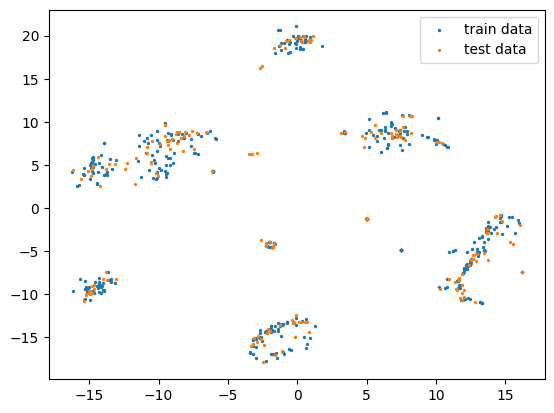

In [473]:
evaluation(model, data, test_graphs)

In [79]:
output = torch.rand(10, 128)
targets = torch.tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [80]:
tl = TripletSemiHardLoss()

In [81]:
tl(output, targets)

tensor(0.0207)

In [14]:
a = (1, 2)
b = (a, 3)
b

((1, 2), 3)

In [33]:
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
output = torch.cdist(input1, input2)

output.shape

torch.Size([100, 100])

In [61]:
x = tf.constant([[5, 4, 6], [5, 4, 6], [5, 4, 6]])
print(tf.size(x))
y = tf.reshape(tf.constant([5, 2, 5, 5, 2, 5, 5, 2, 5]), [-1, 1])
tf.math.greater(x, y)

tf.Tensor(9, shape=(), dtype=int32)


InvalidArgumentError: {{function_node __wrapped__Greater_device_/job:localhost/replica:0/task:0/device:GPU:0}} Incompatible shapes: [3,3] vs. [9,1]
	 [[{{node Greater}}]] [Op:Greater]

# Tensorflow TripletLoss vs Pytorch TripletLoss

In [12]:
import tensorflow as tf
from tensorflow_addons.losses import metric_learning
from tensorflow_addons.utils.keras_utils import LossFunctionWrapper
from tensorflow_addons.utils.types import FloatTensorLike, TensorLike
from typeguard import typechecked
from typing import Optional, Union, Callable

In [104]:
def _masked_maximum(data, mask, dim=1):
    """Computes the axis wise maximum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the maximum.

    Returns:
      masked_maximums: N-D `Tensor`.
        The maximized dimension is of size 1 after the operation.
    """
    axis_minimums = tf.math.reduce_min(data, dim, keepdims=True)
    masked_maximums = (
        tf.math.reduce_max(
            tf.math.multiply(data - axis_minimums, mask), dim, keepdims=True
        )
        + axis_minimums
    )
    return masked_maximums


def _masked_minimum(data, mask, dim=1):
    """Computes the axis wise minimum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the minimum.

    Returns:
      masked_minimums: N-D `Tensor`.
        The minimized dimension is of size 1 after the operation.
    """
    axis_maximums = tf.math.reduce_max(data, dim, keepdims=True)
    masked_minimums = (
        tf.math.reduce_min(
            tf.math.multiply(data - axis_maximums, mask), dim, keepdims=True
        )
        + axis_maximums
    )
    return masked_minimums


def triplet_semihard_loss(
    y_true: TensorLike,
    y_pred: TensorLike,
    margin: FloatTensorLike = 0.2,
    distance_metric: Union[str, Callable] = "L2",
) -> tf.Tensor:
    r"""Computes the triplet loss with semi-hard negative mining.

    Usage:

    >>> y_true = tf.convert_to_tensor([0, 0])
    >>> y_pred = tf.convert_to_tensor([[0.0, 1.0], [1.0, 0.0]])
    >>> tfa.losses.triplet_semihard_loss(y_true, y_pred, distance_metric="L2")
    <tf.Tensor: shape=(), dtype=float32, numpy=2.4142137>

    >>> # Calling with callable `distance_metric`
    >>> distance_metric = lambda x: tf.linalg.matmul(x, x, transpose_b=True)
    >>> tfa.losses.triplet_semihard_loss(y_true, y_pred, distance_metric=distance_metric)
    <tf.Tensor: shape=(), dtype=float32, numpy=1.0>

    Args:
      y_true: 1-D integer `Tensor` with shape `[batch_size]` of
        multiclass integer labels.
      y_pred: 2-D float `Tensor` of embedding vectors. Embeddings should
        be l2 normalized.
      margin: Float, margin term in the loss definition.
      distance_metric: `str` or a `Callable` that determines distance metric.
        Valid strings are "L2" for l2-norm distance,
        "squared-L2" for squared l2-norm distance,
        and "angular" for cosine similarity.

        A `Callable` should take a batch of embeddings as input and
        return the pairwise distance matrix.

    Returns:
      triplet_loss: float scalar with dtype of `y_pred`.
    """
    labels = tf.convert_to_tensor(y_true, name="labels")
    embeddings = tf.convert_to_tensor(y_pred, name="embeddings")

    convert_to_float32 = (
        embeddings.dtype == tf.dtypes.float16 or embeddings.dtype == tf.dtypes.bfloat16
    )
    precise_embeddings = (
        tf.cast(embeddings, tf.dtypes.float32) if convert_to_float32 else embeddings
    )

    # Reshape label tensor to [batch_size, 1].
    lshape = tf.shape(labels)
    labels = tf.reshape(labels, [lshape[0], 1])

    # Build pairwise squared distance matrix

    if distance_metric == "L2":
        pdist_matrix = metric_learning.pairwise_distance(
            precise_embeddings, squared=False
        )
        
#         tf.print(pdist_matrix)

    elif distance_metric == "squared-L2":
        pdist_matrix = metric_learning.pairwise_distance(
            precise_embeddings, squared=True
        )

    elif distance_metric == "angular":
        pdist_matrix = metric_learning.angular_distance(precise_embeddings)

    else:
        pdist_matrix = distance_metric(precise_embeddings)

    # Build pairwise binary adjacency matrix.
    adjacency = tf.math.equal(labels, tf.transpose(labels))
#     tf.print(adjacency)
    # Invert so we can select negatives only.
    adjacency_not = tf.math.logical_not(adjacency)
#     tf.print(adjacency_not)

    batch_size = tf.size(labels)

    # Compute the mask.
    pdist_matrix_tile = tf.tile(pdist_matrix, [batch_size, 1])
#     tf.print(pdist_matrix_tile)
    
    mask = tf.math.logical_and(
        tf.tile(adjacency_not, [batch_size, 1]),
        tf.math.greater(
            pdist_matrix_tile, tf.reshape(tf.transpose(pdist_matrix), [-1, 1])
        ),
    )
#     tf.print(mask)
    mask_final = tf.reshape(
        tf.math.greater(
            tf.math.reduce_sum(
                tf.cast(mask, dtype=tf.dtypes.float32), 1, keepdims=True
            ),
            0.0,
        ),
        [batch_size, batch_size],
    )
#     tf.print(mask_final)
    
    mask_final = tf.transpose(mask_final)

    adjacency_not = tf.cast(adjacency_not, dtype=tf.dtypes.float32)
    mask = tf.cast(mask, dtype=tf.dtypes.float32)

    # negatives_outside: smallest D_an where D_an > D_ap.
    negatives_outside = tf.reshape(
        _masked_minimum(pdist_matrix_tile, mask), [batch_size, batch_size]
    )
#     tf.print(negatives_outside)
    
    negatives_outside = tf.transpose(negatives_outside)

    # negatives_inside: largest D_an.
    negatives_inside = tf.tile(
        _masked_maximum(pdist_matrix, adjacency_not), [1, batch_size]
    )
#     tf.print(negatives_inside)
    semi_hard_negatives = tf.where(mask_final, negatives_outside, negatives_inside)
    
#     tf.print(semi_hard_negatives)

    loss_mat = tf.math.add(margin, pdist_matrix - semi_hard_negatives)
    
#     tf.print(loss_mat)

    mask_positives = tf.cast(adjacency, dtype=tf.dtypes.float32) - tf.linalg.diag(
        tf.ones([batch_size])
    )
    
#     tf.print(mask_positives)

    # In lifted-struct, the authors multiply 0.5 for upper triangular
    #   in semihard, they take all positive pairs except the diagonal.
    num_positives = tf.math.reduce_sum(mask_positives)
    
#     tf.print(num_positives)

    triplet_loss = tf.math.truediv(
        tf.math.reduce_sum(
            tf.math.maximum(tf.math.multiply(loss_mat, mask_positives), 0.0)
        ),
        num_positives,
    )
    
#     tf.print(
#             tf.math.maximum(tf.math.multiply(loss_mat, mask_positives), 0.0)
#         )
    
#     tf.print(triplet_loss)

    if convert_to_float32:
        return tf.cast(triplet_loss, embeddings.dtype)
    else:
        return triplet_loss

In [18]:
test_array_x = np.random.random_sample((100, 128)).astype(np.float64)
test_array_y = np.array([0 for i in range(25)] + [1 for i in range(25)] + [2 for i in range(25)] + [3 for i in range(25)]).astype(np.float64)

In [105]:
with tf.device('CPU'):
    tf.print(triplet_semihard_loss(tf.cast(tf.convert_to_tensor(test_array_y), tf.float32), tf.cast(tf.convert_to_tensor(test_array_x), tf.float32)))

[[0 0.198365405 0.316806972 ... 0 0 0]
 [0.196273044 0 0.170718387 ... 0 0 0]
 [0.224508 0.178384498 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0.188140586 0.184802726]
 [0 0 0 ... 0.194748595 0 0.184892371]
 [0 0 0 ... 0.197816089 0.194497779 0]]
0.187194243


In [110]:
criterion = TripletSemiHardLoss()

In [111]:
criterion(torch.tensor(test_array_x).to('cuda'), torch.tensor(test_array_y).to('cuda'))

tensor([0.0000, 0.1984, 0.3168, 0.1888, 0.1955, 0.1829, 0.1981, 0.1858, 0.1992,
        0.1648, 0.1926, 0.1838, 0.1697, 0.1981, 0.1974, 0.1988, 0.1834, 0.1898,
        0.1936, 0.1844, 0.1909, 0.1806, 0.1921, 0.1692, 0.1999, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], device='cuda:0', dtype=torch.float64)


tensor(0.1872, device='cuda:0', dtype=torch.float64)

Testing

In [62]:
model.eval()

Net(
  (conv1): GCNConv(5, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 5)
)

In [69]:
from sklearn.metrics import f1_score
y_true = []
y_pred = []

for i in range(len(test_graphs)):
    y_pred.append(np.argmax(F.softmax(model(test_graphs[i])[-1], dim=0).cpu().detach().numpy()))
    y_true.append(test_graphs[i].y[-1])
    
print(classification_report(y_true, y_pred))

print(confusion_matrix(y_true, y_pred))

print(f1_score(y_true, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.50      0.02      0.04        47
           2       0.83      0.12      0.20        43
           3       0.70      0.99      0.82       218
           4       0.89      0.78      0.83        64

    accuracy                           0.73       379
   macro avg       0.78      0.58      0.58       379
weighted avg       0.73      0.73      0.66       379

[[  7   0   0   0   0]
 [  0   1   1  43   2]
 [  0   0   5  36   2]
 [  0   1   0 215   2]
 [  0   0   0  14  50]]
0.6576256956227116


In [54]:
test_graphs[0].y

tensor([3, 3, 4,  ..., 1, 1, 3])

## Real example (old)

In [82]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
df_new = pd.concat([n, l], axis=1)
df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
df_new = df_new.sort_values(by=[0])
df_new = df_new.drop_duplicates()
df_new.iloc[:, 1].to_numpy()

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
class MyDataset(InMemoryDataset):
    def __init__(self, transform=None):
        super(MyDataset, self).__init__('.', transform, None, None)

        df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
        
        types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()

        edge_index = torch.zeros((2, df.shape[0]), dtype=torch.long)
        edge_attr = torch.zeros((df.shape[0],), dtype=torch.float)
        
        n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
        l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
        df_new = pd.concat([n, l], axis=1)
        df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
        df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
        df_new = df_new.sort_values(by=[0])
        df_new = df_new.drop_duplicates()
        y = torch.from_numpy(df_new.iloc[:, 1].to_numpy()).type(torch.long)

        for i in range(df.shape[0]):
            edge_index[:, i] = torch.tensor([int(df.iloc[i, 0].split('_')[1]), int(df.iloc[i, 1].split('_')[1])])
            edge_attr[i] = df.iloc[i, 4]

        data = Data(edge_attr=edge_attr, edge_index=edge_index, y=y)
        
        print(data)
        
        data.num_nodes = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
        
        data.num_classes = len(types)

#         # splitting the data into train, validation and test
#         X_train, X_test, y_train, y_test = train_test_split(edge_attr, 
#                                                             y,
#                                                             test_size=0.30, 
#                                                             random_state=42)
        
#         n_nodes = len(y)
        
#         # create train and test masks for data
#         train_mask = torch.zeros(n_nodes, dtype=torch.bool)
#         test_mask = torch.zeros(n_nodes, dtype=torch.bool)
#         train_mask[X_train.index] = True
#         test_mask[X_test.index] = True
#         data['train_mask'] = train_mask
#         data['test_mask'] = test_mask

#         self.data, self.slices = self.collate([data])

    def _download(self):
        return

    def _process(self):
        return

    def __repr__(self):
        return '{}()'.format(self.__class__.__name__)



dataset = MyDataset()
print(dataset)
data = dataset[0]

Data(edge_index=[2, 67503], edge_attr=[67503], y=[3767])
MyDataset()


In [34]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
        
types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()

edge_index = torch.zeros((2, df.shape[0]), dtype=torch.long)
edge_attr = torch.zeros((df.shape[0],), dtype=torch.float)

n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
df_new = pd.concat([n, l], axis=1)
df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
df_new = df_new.sort_values(by=[0])
df_new = df_new.drop_duplicates()
y = torch.from_numpy(df_new.iloc[:, 1].to_numpy()).type(torch.long)

for i in range(df.shape[0]):
    edge_index[:, i] = torch.tensor([int(df.iloc[i, 0].split('_')[1]), int(df.iloc[i, 1].split('_')[1])])
    edge_attr[i] = df.iloc[i, 4]

data = Data(x=torch.from_numpy(np.expand_dims(df_new.iloc[:, 1].to_numpy(), axis=-1)).type(torch.float), edge_attr=edge_attr, edge_index=edge_index, y=y)

data.num_nodes = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
        
data.num_classes = len(types)

In [35]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self, edge_index):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data =  data.to(device)

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out= model(data.edge_index)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

for epoch in range(401):
    loss = train(data)
    print(loss)

tensor(2.1050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9092, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6992, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5544, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3257, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2880, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2498, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2385, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2469, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2266, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2168, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2021, device='cuda:0', grad_fn=

tensor(1.0949, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0999, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0951, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0995, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0993, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0947, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0966, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0975, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1005, device='cuda:0', grad_fn=

tensor(1.0863, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0919, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0904, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0837, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0891, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0884, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0868, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0845, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0874, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0881, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0871, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0872, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0840, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0864, device='cuda:0', grad_fn=

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=2)
X, y = np.arange(18).reshape((6, 3)), [0, 0, 0, 0, 1, 1]

a, b = split.split(X, y)
X[a[0]]

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [15, 16, 17]])

In [35]:
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)

NameError: name 'StratifiedKFold' is not defined

In [18]:
edge_index.t().contiguous()

tensor([[   0,    5],
        [   0,   10],
        [   0,   11],
        ...,
        [3749, 3764],
        [3754, 3755],
        [3758, 3766]])

[How to get rbf_kernel_safe](https://stackoverflow.com/questions/52057836/labelpropagation-how-to-avoid-division-by-zero)

# NC

In [12]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


In [13]:
len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())

3767

## Get distribution

In [14]:
nodes_names = set()
all_types_dict = {}

types = df['label_id1'].unique().tolist()

for t in types:
    all_types_dict[t] = 0

for i, n in enumerate(df['node_id1']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id1'][i]] += 1
        
for i, n in enumerate(df['node_id2']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id2'][i]] += 1
        
print(all_types_dict)

{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}


## Training and results

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        74
           1       0.87      0.67      0.76       111
           2       0.98      0.75      0.85        67
           3       1.00      0.43      0.60        42
           4       0.50      0.97      0.66        80
           5       0.94      0.42      0.59        40
           6       1.00      0.27      0.43        11
           7       0.78      0.41      0.54        17

    accuracy                           0.72       442
   macro avg       0.85      0.61      0.65       442
weighted avg       0.81      0.72      0.71       442

{'0': {'precision': 0.693069306930693, 'recall': 0.9459459459459459, 'f1-score': 0.8, 'support': 74}, '1': {'precision': 0.8705882352941177, 'recall': 0.6666666666666666, 'f1-score': 0.7551020408163265, 'support': 111}, '2': {'precision': 0.9803921568627451, 'recall': 0.746268656716418, 'f1-score': 0.847457627118644, 'support': 67}, '3': {'precisi

<Figure size 432x288 with 0 Axes>

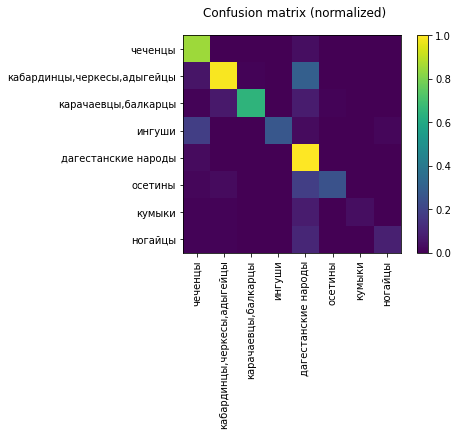

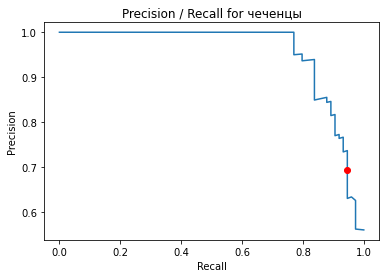

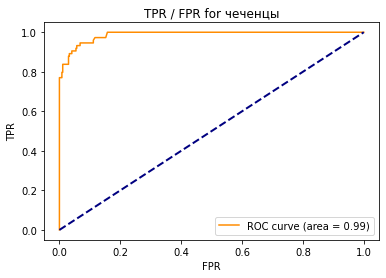

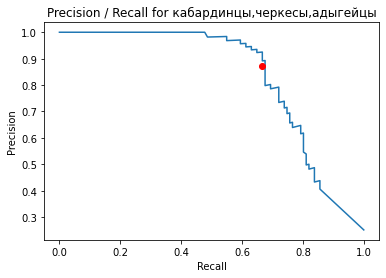

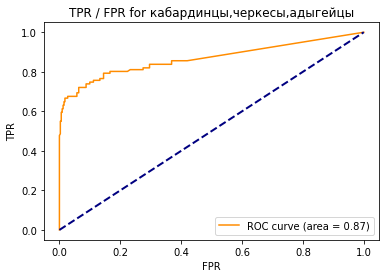

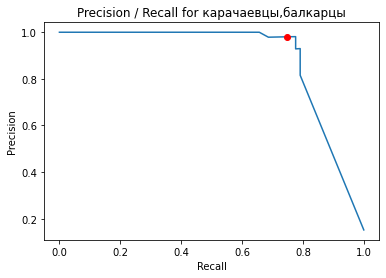

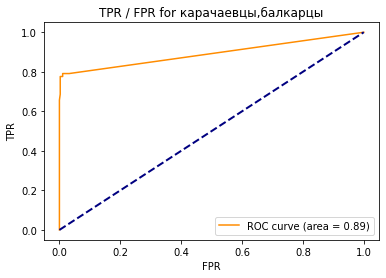

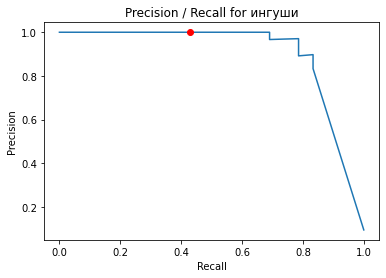

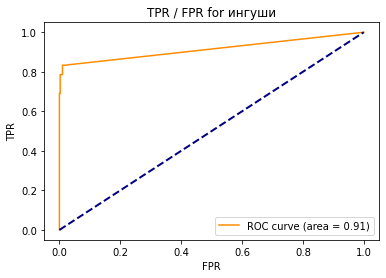

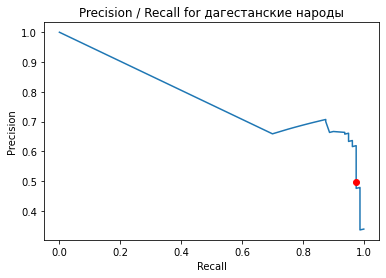

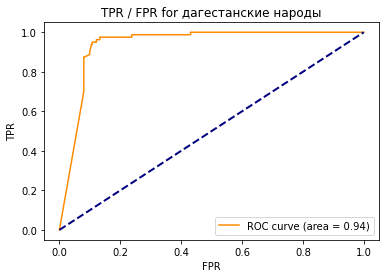

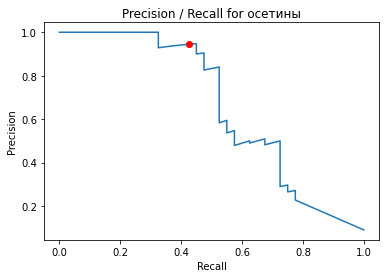

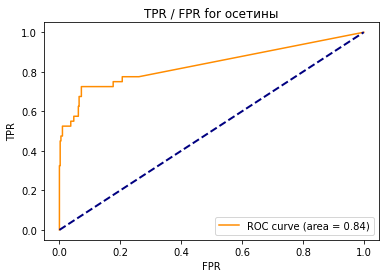

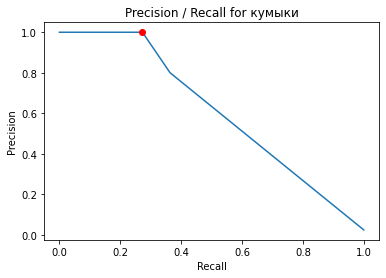

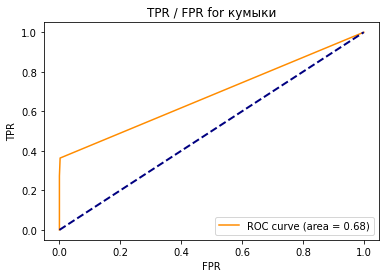

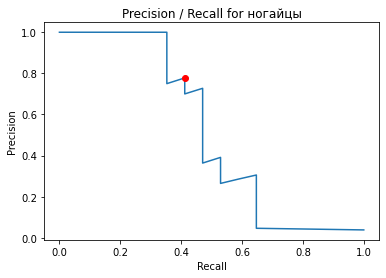

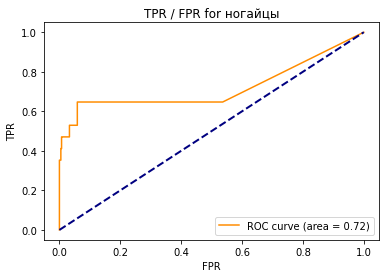

In [91]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            nodes_dict[n] = [types_dict.copy(), id_]
        
    return nodes_dict

data = get_dataset(df, 0.2) # second number - the part of training data

inputs = [list(i[0].values()) for i in list(data.values())]
targets = [i[1] for i in list(data.values())]

def rbf_kernel_safe(X, Y=None, gamma=None): 

    X, Y = sklearn.metrics.pairwise.check_pairwise_arrays(X, Y) 
    if gamma is None: 
        gamma = 1.0 / X.shape[1] 

    K = sklearn.metrics.pairwise.euclidean_distances(X, Y, squared=True) 
    K *= -gamma 
    K -= K.max()
    np.exp(K, K)    # exponentiate K in-place 
    return K 

# label_prop_model = LabelSpreading(kernel=rbf_kernel_safe, max_iter=1000, tol=1e-3, n_jobs=-1, gamma=200)
label_prop_model = LabelSpreading(kernel='knn', max_iter=1000, tol=1e-3, n_jobs=-1, n_neighbors=11, gamma=100)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

unlabeled_targets = np.array(targets) == -1

data = get_dataset(df, 2) # second number - whatever number > 1 because we need to select all data

targets = np.array([i[1] for i in list(data.values())])

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets, predicted, labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(8)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(8)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_nc.png", bbox_inches="tight")
plt.show()

for i in range(8):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()